In [18]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/syn200.vtree', '/root/PySDD/notebooks/syn200.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=200
        self.card=10
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}

def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [9]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

def inv_sherman_morrison(u, A_inv):
    """Inverse of a matrix with rank 1 update.
    """
    Au = np.dot(A_inv, u)
    A_inv -= np.outer(Au, Au)/(1+np.dot(u.T, Au))
    return A_inv

class Model(nn.Module):
    """Template for fully connected neural network for scalar approximation.
    """
    def __init__(self, 
                 input_size=1, 
                 hidden_size=2,
                 n_layers=1,
                 activation='ReLU',
                 p=0.0,
                ):
        super(Model, self).__init__()
        
        self.n_layers = n_layers
        
        if self.n_layers == 1:
            self.layers = [nn.Linear(input_size, 1)]
        else:
            size  = [input_size] + [hidden_size,] * (self.n_layers-1) + [1]
            self.layers = [nn.Linear(size[i], size[i+1]) for i in range(self.n_layers)]
        self.layers = nn.ModuleList(self.layers)
        
        # dropout layer
        self.dropout = nn.Dropout(p=p)
        
        # activation function
        if activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'ReLU':
            self.activation = nn.ReLU()
        elif activation == 'LeakyReLU':
            self.activation = nn.LeakyReLU(negative_slope=0.1)
        else:
            raise Exception('{} not an available activation'.format(activation))
            
    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.dropout(self.activation(self.layers[i](x)))
        x = self.layers[-1](x)
        return x


In [10]:
import numpy as np
import abc
from tqdm import tqdm

class UCB(abc.ABC):
    """Base class for UBC methods.
    """
    def __init__(self,
                 bandit,
                 reg_factor=1.0,
                 confidence_scaling_factor=-1.0,
                 delta=0.1,
                 train_every=1,
                 throttle=int(1e2),
                ):
        # bandit object, contains features and generated rewards
        self.bandit = bandit
        # L2 regularization strength
        self.reg_factor = reg_factor
        # Confidence bound with probability 1-delta
        self.delta = delta
        # multiplier for the confidence bound (default is bandit reward noise std dev)
        if confidence_scaling_factor == -1.0:
            confidence_scaling_factor = bandit.noise_std
        self.confidence_scaling_factor = confidence_scaling_factor
        
        # train approximator only every few rounds
        self.train_every = train_every
        self.best_recommended_reward =-200
        self.best_recommended_action =np.array([1]*args.card+[0]*(self.bandit.n_features-args.card))
        self.rewards_list=[]
        self.best_sample_rewards_list=[]
        self.feasi=[]
        # throttle tqdm updates
        self.throttle = throttle
        self.solverSol=None
        self.reset()
        
    def reset_upper_confidence_bounds(self):
        """Initialize upper confidence bounds and related quantities.
        """
        self.exploration_bonus = np.empty((self.bandit.T, self.bandit.n_arms))
        self.mu_hat = np.empty((self.bandit.T, self.bandit.n_arms)) 
        self.meta_mu_hat = np.empty(( self.bandit.n_features)) 
        self.cross_mu_hat = np.empty(( self.bandit.n_features**2)) 
        self.upper_confidence_bounds = np.ones((self.bandit.T, self.bandit.n_arms))
        self.meta_values= np.ones((self.bandit.n_features))
        self.cross_values= np.ones((self.bandit.n_features**2))
        self.knn_metabest=-100
        self.best_rewards_oracle=-100
    def reset_regrets(self):
        """Initialize regrets.
        """
        self.regrets = np.empty(self.bandit.T)

    def reset_actions(self):
        """Initialize cache of actions.
        """
        self.actions = np.empty(self.bandit.T).astype('int')
    
    def reset_A_inv(self):
        """Initialize n_arms square matrices representing the inverses
        of exploration bonus matrices.
        """
        self.A_inv = np.array(
            [
                np.eye(self.approximator_dim)/self.reg_factor for _ in self.bandit.arms
            ]
        )
    def reset_grad_approx(self):
        """Initialize the gradient of the approximator w.r.t its parameters.
        """
        self.grad_approx = np.zeros((self.bandit.n_arms, self.approximator_dim))

    def sample_action(self):
        """Return the action to play based on current estimates
        """
        if self.iteration>=max(self.bandit.n_features*4,200):
            return np.argmax(self.upper_confidence_bounds[self.iteration]).astype('int')
        else:
            return np.random.choice(self.bandit.n_arms)
    @abc.abstractmethod
    def reset(self):
        """Initialize variables of interest.
        To be defined in children classes.
        """
        pass

    @property
    @abc.abstractmethod
    def approximator_dim(self):
        """Number of parameters used in the approximator.
        """
        pass
    
    @property
    @abc.abstractmethod
    def confidence_multiplier(self):
        """Multiplier for the confidence exploration bonus.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def update_confidence_bounds(self):
        """Update the confidence bounds for all arms at time t.
        To be defined in children classes.
        """
        pass

    @abc.abstractmethod
    def update_output_gradient(self):
        """Compute output gradient of the approximator w.r.t its parameters.
        """
        pass
    
    @abc.abstractmethod
    def train(self):
        """Update approximator.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def predict(self):
        """Predict rewards based on an approximator.
        To be defined in children classes.
        """
        pass

    def update_confidence_bounds(self):
        """Update confidence bounds and related quantities for all arms.
        """
        
        if self.iteration>max(self.bandit.n_features*4,200):#self.bandit.n_features:
            self.bandit.features[self.iteration][2]=self.best_recommended_action
            self.bandit.features[self.iteration][0]=self.solverSol
            self.bandit.features[self.iteration][1]=self.solverSol_quad
            for j in range(3,self.bandit.n_arms//3):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//3,self.bandit.n_arms//2):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol_quad]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//2,2*self.bandit.n_arms//3):
                tmp=self.bandit.features[self.iteration][j]+np.random.random()*(self.best_recommended_action-self.bandit.features[self.iteration][j])
                if self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][j]).to(self.device)).detach().squeeze()<self.model.forward(torch.FloatTensor(tmp).to(self.device)).detach().squeeze():
                    tmp2=sorted(tmp)[-args.card:] 
                    self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            if np.random.random()>0.4:
                a=np.random.choice(self.bandit.n_arms)
                b=np.random.choice(self.bandit.n_arms)
                if a!=b:
                    if  self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][a]).to(self.device)).detach().squeeze()>self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][b]).to(self.device)).detach().squeeze():
                        tmp=self.bandit.features[self.iteration][b]+np.random.random()*(a-b)
                        tmp2=sorted(tmp)[-args.card:] 
                        self.bandit.features[self.iteration][b]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))

        self.update_output_gradient()
        # UCB exploration bonus
        self.exploration_bonus[self.iteration] = np.array(
            [
                500000*constraint(self.bandit.features[self.iteration][a])+self.confidence_multiplier * np.sqrt(np.dot(self.grad_approx[a], np.dot(self.A_inv[a], self.grad_approx[a].T))) for a in self.bandit.arms
            ]
        ) #500000*constraint(self.bandit.features[self.iteration][a])+
        # update reward prediction mu_hat
        self.predict()
        self.bandit.rewards[self.iteration]=np.array([self.bandit.h(self.bandit.features[self.iteration, k],self.iteration) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])
        self.bandit.rewards2[self.iteration]=np.array([self.bandit.hwithoutconstraints(self.bandit.features[self.iteration, k]) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])

        # estimated combined bound for reward
        self.meta_values=self.meta_mu_hat# + self.meta_exploration_bonus[self.iteration] 
        if self.iteration>=max(self.bandit.n_features*4,200):
            self.cross_values=self.cross_mu_hat
            for i in range(self.bandit.n_features):
                for j in range(self.bandit.n_features):
                    if i==j:
                        self.cross_values[i*self.bandit.n_features+j]=self.meta_mu_hat[i]
                    else:
                        self.cross_values[i*self.bandit.n_features+j]=(self.cross_mu_hat[i*self.bandit.n_features+j]-self.meta_mu_hat[i]-self.meta_mu_hat[j])/2
            self.cross_values=self.cross_values.reshape(self.bandit.n_features,self.bandit.n_features)
        with gurobipy.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('IterationLimit',600)
            env.start()
            with gurobipy.Model(env=env) as m:
                self.solverSol=np.divide(solver(self.meta_values,m),np.sqrt(args.card))
        if self.iteration>=max(self.bandit.n_features*4,200):
            with gurobipy.Env(empty=True) as env:
                env.setParam('OutputFlag', 0)
                env.setParam('IterationLimit',600)
                env.start()
                with gurobipy.Model(env=env) as m:
                    self.solverSol_quad=np.divide(solver_quad(self.cross_values,m),np.sqrt(args.card))
                    print('solverSol_quad',self.bandit.hwithoutconstraints(self.solverSol_quad))
        tmp=sorted(self.meta_values )[-args.card:]   #后面记得加/改一下探索项！！！
        self.meta_values = np.array([1 if self.meta_values[i] in tmp else 0 for i in range(self.bandit.n_features)])
        if len(np.argwhere(self.meta_values==1)):
            metabest=np.argwhere(self.meta_values==1)[:args.card].reshape(args.card)
        else:
            metabest=list(range(self.bandit.n_features))
            np.random.shuffle(metabest)
            metabest=np.array(metabest[:args.card])
        knn_metabest={}
        import copy
        for i in range(10):
            tmp=metabest.copy()
            tmp[np.random.choice(range(args.card))]=np.random.choice(range(self.bandit.n_features))
            tmp=np.divide(np.array([1 if i in tmp else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            tmpvalue=self.model.forward(
                    torch.FloatTensor(tmp).to(self.device)
                ).detach().squeeze()
            knn_metabest[tmpvalue]=tmp
        
        self.meta_values=np.divide(self.meta_values,np.sqrt(args.card))
        self.upper_confidence_bounds[self.iteration] = self.mu_hat[self.iteration] + self.exploration_bonus[self.iteration]
        self.knn_metabest=knn_metabest[max(knn_metabest.keys())]
        self.bandit.knn_metabestValue =self.bandit.h(self.knn_metabest,self.iteration)
        self.bandit.best_rewards_oracle =max( max(np.max(self.bandit.rewards, axis=1)),self.bandit.knn_metabestValue)
        self.best_rewards_oracle=max(max(self.best_rewards_oracle,self.bandit.best_rewards_oracle),self.bandit.hwithoutconstraints(self.knn_metabest))
        print('----------------',self.best_rewards_oracle,self.bandit.hwithoutconstraints(self.knn_metabest),checkFea(torch.from_numpy(self.knn_metabest)*np.sqrt(args.card)),self.bandit.hwithoutconstraints(self.solverSol),checkFea(np.sqrt(args.card)*torch.from_numpy(self.solverSol)))
    def update_A_inv(self):
        self.A_inv[self.action] = inv_sherman_morrison(
            self.grad_approx[self.action],
            self.A_inv[self.action]
        )
    def run(self):
        """Run an episode of bandit.
        """
        postfix = {
            'total regret': 0.0,
            '% optimal arm': 0.0,
        }
        with tqdm(total=self.bandit.T, postfix=postfix) as pbar:
            for t in range(self.bandit.T):
                # update confidence of all arms based on observed features at time t
                self.update_confidence_bounds()
                # pick action with the highest boosted estimated reward
                self.action = self.sample_action()
                self.actions[t] = self.action
                # update approximator
                if t % self.train_every == 0:
                    self.train()
                # update exploration indicator A_inv
                self.update_A_inv()
                # compute regret
                
                #print(t,self.action,self.bandit.best_rewards_oracle[t],self.bandit.rewards[t, self.action])
                print('hhhhh',self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]),np.sqrt(args.card)*sum(self.bandit.features[self.iteration][self.action]),checkFea(torch.from_numpy(self.bandit.features[self.iteration][self.action])*np.sqrt(args.card)))
                self.regrets[t] = self.best_rewards_oracle-self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                if self.best_recommended_reward<self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration):
                    self.best_recommended_reward=self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                    self.best_recommended_action=self.bandit.features[self.iteration][self.action]
                self.best_sample_rewards_list.append( self.best_rewards_oracle)
                self.rewards_list.append(self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]))
                self.feasi.append(checkFea(self.bandit.features[self.iteration][self.action]*np.sqrt(args.card)))
                # increment counter
                self.iteration += 1
                
                # log
                postfix['total regret'] += self.regrets[t]
                n_optimal_arm = np.sum(
                    self.actions[:self.iteration]==self.bandit.best_actions_oracle[:self.iteration]
                )
                postfix['% optimal arm'] = '{:.2%}'.format(n_optimal_arm / self.iteration)
                
                if t % self.throttle == 0:
                    pbar.set_postfix(postfix)
                    pbar.update(self.throttle)


In [11]:
import numpy as np
import itertools


class ContextualBandit():
    def __init__(self,
                 T,
                 n_arms,
                 n_features,
                 h,
                 hwithoutconstraints,
                 noise_std=1.0,
                ):
        # number of rounds
        self.T = T
        # number of arms
        self.n_arms = n_arms
        # number of features for each arm
        self.n_features = n_features
        # average reward function
        # h : R^d -> R
        self.h = h
        self.hwithoutconstraints=hwithoutconstraints
        self.knn_metabestValue=-100
        self.best_rewards_oracle = -100
        # standard deviation of Gaussian reward noise
        self.noise_std = noise_std
        # generate random features
        print('44-------------')
        self.reset()

    @property
    def arms(self):
        """Return [0, ...,n_arms-1]
        """
        return range(self.n_arms)
        
    def reset(self):
        """Generate new features and new rewards.
        """
        print('55-------------')
        self.reset_features()
        print('66-------------')
        self.reset_rewards()
        
    def reset_features(self):
        """Generate normalized random N(0,1) features.
        """
        x1,x2=[],[]
        for i in range(self.T):
            tmp1,tmp2=[],[]
            for j in range(self.n_arms):
                a=np.array([0]*(self.n_features-args.card)+[1]*args.card)
                np.random.shuffle(a)
                a=np.divide(a,np.sqrt(args.card))
                tmp1.append(a)
            for j in range(self.n_features):
                a=np.array([0.0]*j+[1.0]+[0.0]*(self.n_features-j-1))
                tmp2.append(a)
            x1.append(tmp1)
            x2.append(tmp2)
        x1,x2=np.array(x1),np.array(x2)
        #x /= np.repeat(np.linalg.norm(x, axis=-1, ord=2), self.n_features).reshape(self.T, self.n_arms, self.n_features)
        self.features = x1
        self.meta_features=x2
        self.cross_features=[]
        for i in range(self.n_features):
            for j in range(self.n_features):
                tmp=np.zeros(self.n_features)
                tmp[i]=1
                tmp[j]=1
                self.cross_features.append(tmp)
                
    def reset_rewards(self):
        """Generate rewards for each arm and each round,
        following the reward function h + Gaussian noise.
        """
        
        self.rewards = np.random.random([self.T, self.n_arms])
        self.rewards2 = np.random.random([self.T, self.n_arms])
        
        # to be used only to compute regret, NOT by the algorithm itself
        self.best_rewards_oracle =max( max(np.max(self.rewards, axis=1)),self.knn_metabestValue)
        self.best_actions_oracle = np.argmax(self.rewards, axis=1)


In [12]:
import numpy as np
import torch
import torch.nn as nn

class NeuralUCB(UCB):
    """Neural UCB.
    """
    def __init__(self,
                 bandit,
                 hidden_size=20,
                 n_layers=2,
                 reg_factor=1.0,
                 delta=0.01,
                 confidence_scaling_factor=-1.0,
                 training_window=100,
                 p=0.0,
                 learning_rate=0.01,
                 epochs=1,
                 train_every=1,
                 throttle=1,
                 use_cuda=False,
                ):

        # hidden size of the NN layers
        self.hidden_size = hidden_size
        # number of layers
        self.n_layers = n_layers
        
        # number of rewards in the training buffer
        self.training_window = training_window
        
        # NN parameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.use_cuda = use_cuda
        if self.use_cuda:
            raise Exception(
                'Not yet CUDA compatible : TODO for later (not necessary to obtain good results')
        self.device = torch.device('cuda' if torch.cuda.is_available() and self.use_cuda else 'cpu')
    
        # dropout rate
        self.p = p

        # neural network
        self.model = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.model2 = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.optimizer2 = torch.optim.Adam(self.model2.parameters(), lr=self.learning_rate)

        super().__init__(bandit, 
                         reg_factor=reg_factor,
                         confidence_scaling_factor=confidence_scaling_factor,
                         delta=delta,
                         throttle=throttle,
                         train_every=train_every,
                        )

    @property
    def approximator_dim(self):
        """Sum of the dimensions of all trainable layers in the network.
        """
        return sum(w.numel() for w in self.model.parameters() if w.requires_grad)
    
    @property
    def confidence_multiplier(self):
        """Constant equal to confidence_scaling_factor
        """
        return self.confidence_scaling_factor
    
    def update_output_gradient(self):
        """Get gradient of network prediction w.r.t network weights.
        """
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
            
            self.grad_approx[a] = torch.cat(
                [w.grad.detach().flatten() / np.sqrt(self.hidden_size) for w in self.model.parameters() if w.requires_grad]
            ).to(self.device)
        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()

        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()
            
    def reset(self):
        """Reset the internal estimates.
        """
        self.reset_upper_confidence_bounds()
        self.reset_regrets()
        self.reset_actions()
        self.reset_A_inv()
        self.reset_grad_approx()
        self.iteration = 0

    def train(self):
        """Train neural approximator.
        """
        iterations_so_far = range(np.max([0, self.iteration-self.training_window]), self.iteration+1)
        actions_so_far = self.actions[np.max([0, self.iteration-self.training_window]):self.iteration+1]

        x_train = torch.FloatTensor(self.bandit.features[iterations_so_far, actions_so_far]).to(self.device)
        y_train = torch.FloatTensor(self.bandit.rewards[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        y_train2 = torch.FloatTensor(self.bandit.rewards2[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        
        # train mode
        self.model.train()
        for _ in range(self.epochs):
            y_pred = self.model.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        self.model2.train()
        for _ in range(self.epochs):
            y_pred = self.model2.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer2.zero_grad()
            loss.backward()
            self.optimizer2.step()
        
        
    def predict(self):
        """Predict reward.
        """
        # eval mode
        self.model.eval()
        self.mu_hat[self.iteration] = self.model.forward(
            torch.FloatTensor(self.bandit.features[self.iteration]).to(self.device)
        ).detach().squeeze()
        self.meta_mu_hat = self.model2.forward(
            torch.FloatTensor(self.bandit.meta_features[self.iteration]).to(self.device)
        ).detach().squeeze()
        if self.iteration>=max(self.bandit.n_features*4,200):
            self.cross_mu_hat= self.model2.forward(
                torch.FloatTensor(self.bandit.cross_features).to(self.device)
            ).detach().squeeze()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
T = int(12e2)
n_arms =40
n_features = 200
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 1

p = 0.2
hidden_size = 4#16
epochs = 100#100
train_every = 10#10
confidence_scaling_factor = 1.0
use_cuda = False

In [33]:
### mean reward function

a = np.random.random(200) #  np.load('rateListUsersYahoo.npy')[0]
a /= np.linalg.norm(a, ord=2)
Q=np.random.random([200,200]) #np.load('Q.npy')#Q=np.random.random([n_features,n_features])+100*np.diag(np.ones(n_features))
#h = lambda x:   100*a.dot(Q).dot(a)   #min(100*(np.dot(a, x)**(5)),10000)
#100*a.dot(Q).dot(a)
def h(x,iteration):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*(1/(1+np.exp(-iteration))-0.5)*torch.log(torch.mean(wmc)).float()+100*x.dot(Q).dot(x)
def constraint(x):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*torch.log(torch.mean(wmc)).float()
hwithoutconstraints = lambda x:100*x.dot(Q).dot(x)   #100*(x.dot(a))**3  、100*x.dot(Q).dot(x)

In [34]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action=solver(a,m)
hwithoutconstraints(action)/(np.sqrt(args.card))**3

155.83810460963937

In [35]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action2=solver_quad(Q,m)
hwithoutconstraints(action2)/10

??
??


695.1215587709105

In [36]:
bandit = ContextualBandit(T, n_arms, n_features, h,hwithoutconstraints, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

44-------------
55-------------
66-------------


  0%|          | 0/1200 [00:00<?, ?it/s, % optimal arm=0, total regret=0]

---------------- tensor(567.3276) 567.3275536875818 tensor(0., dtype=torch.float64) 552.8249182519017 tensor(0., dtype=torch.float64)
hhhhh 463.60631729854117 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  0%|          | 1/1200 [00:15<5:19:15, 15.98s/it, total regret=104, % optimal arm=0.00%]

---------------- tensor(567.3276) 462.2108006502793 tensor(0., dtype=torch.float64) 485.4131535370256 tensor(0., dtype=torch.float64)
hhhhh 480.20199540116334 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 2/1200 [00:34<5:36:10, 16.84s/it, total regret=191, % optimal arm=0.00%]

---------------- tensor(567.3276) 529.455471934884 tensor(0.0022, dtype=torch.float64) 474.2238528668968 tensor(0., dtype=torch.float64)
hhhhh 478.6529394643937 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 3/1200 [00:49<5:25:04, 16.29s/it, total regret=280, % optimal arm=0.00%]

---------------- tensor(567.3276) 508.8647476069501 tensor(0.0022, dtype=torch.float64) 481.22908111264076 tensor(0., dtype=torch.float64)
hhhhh 486.33557164805904 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  0%|          | 4/1200 [01:05<5:21:41, 16.14s/it, total regret=2.74e+3, % optimal arm=0.00%]

---------------- tensor(567.3276) 463.21790520066577 tensor(0.0022, dtype=torch.float64) 430.34493779724903 tensor(0., dtype=torch.float64)
hhhhh 497.7291875306894 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  0%|          | 5/1200 [01:22<5:27:20, 16.44s/it, total regret=5.35e+3, % optimal arm=0.00%]

---------------- tensor(567.3276) 489.75199406276386 tensor(0.0022, dtype=torch.float64) 490.4303642070431 tensor(0., dtype=torch.float64)
hhhhh 501.6587701424066 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 6/1200 [01:39<5:26:54, 16.43s/it, total regret=5.42e+3, % optimal arm=0.00%]

---------------- tensor(567.3276) 523.2038641074344 tensor(0.0044, dtype=torch.float64) 461.19348534395937 tensor(0., dtype=torch.float64)
hhhhh 514.4156948229363 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 7/1200 [01:54<5:22:56, 16.24s/it, total regret=5.47e+3, % optimal arm=0.00%]

---------------- tensor(567.3276) 450.0621738484652 tensor(0.0022, dtype=torch.float64) 432.96392743609624 tensor(0., dtype=torch.float64)
hhhhh 437.592031416531 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 8/1200 [02:09<5:14:12, 15.82s/it, total regret=5.6e+3, % optimal arm=0.00%] 

---------------- tensor(567.3276) 481.05524525055205 tensor(0., dtype=torch.float64) 488.7971959296825 tensor(0., dtype=torch.float64)
hhhhh 509.1839772438767 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 9/1200 [02:25<5:15:59, 15.92s/it, total regret=5.66e+3, % optimal arm=0.00%]

---------------- tensor(567.3276) 490.70739934860546 tensor(0.0022, dtype=torch.float64) 512.3830730205835 tensor(0., dtype=torch.float64)
hhhhh 502.23145449429865 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|          | 10/1200 [02:41<5:13:21, 15.80s/it, total regret=8.36e+3, % optimal arm=0.00%]

---------------- tensor(567.3276) 511.81738419679624 tensor(0.0044, dtype=torch.float64) 503.6117784694195 tensor(0., dtype=torch.float64)
hhhhh 528.2665402287925 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 11/1200 [02:58<5:17:39, 16.03s/it, total regret=8.4e+3, % optimal arm=0.00%] 

---------------- tensor(567.3276) 496.12301767116753 tensor(0., dtype=torch.float64) 502.84111072280115 tensor(0., dtype=torch.float64)
hhhhh 487.43494556628787 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 12/1200 [03:13<5:12:00, 15.76s/it, total regret=8.48e+3, % optimal arm=0.00%]

---------------- 574.8850708007812 435.32622779326937 tensor(0., dtype=torch.float64) 441.91503309782104 tensor(0., dtype=torch.float64)
hhhhh 466.4531347474742 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 13/1200 [03:31<5:27:13, 16.54s/it, total regret=8.59e+3, % optimal arm=0.00%]

---------------- 574.8850708007812 471.81832537201655 tensor(0.0022, dtype=torch.float64) 468.12412681690114 tensor(0., dtype=torch.float64)
hhhhh 510.5455228557542 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|          | 14/1200 [03:47<5:24:17, 16.41s/it, total regret=1.13e+4, % optimal arm=0.00%]

---------------- 574.8850708007812 546.5694197496132 tensor(0.0022, dtype=torch.float64) 482.32266746090994 tensor(0., dtype=torch.float64)
hhhhh 488.54428959296933 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|▏         | 15/1200 [04:02<5:15:37, 15.98s/it, total regret=1.14e+4, % optimal arm=0.00%]

---------------- 574.8850708007812 502.9119857452354 tensor(0., dtype=torch.float64) 502.9119857452354 tensor(0., dtype=torch.float64)
hhhhh 563.6392850496836 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|▏         | 16/1200 [04:17<5:10:20, 15.73s/it, total regret=1.14e+4, % optimal arm=0.00%]

---------------- 574.8850708007812 491.06848482227343 tensor(0., dtype=torch.float64) 471.5664396511864 tensor(0., dtype=torch.float64)
hhhhh 513.1196026225635 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|▏         | 17/1200 [04:32<5:04:48, 15.46s/it, total regret=1.41e+4, % optimal arm=0.00%]

---------------- 574.8850708007812 447.61520213964536 tensor(0., dtype=torch.float64) 482.57888666971934 tensor(0., dtype=torch.float64)
hhhhh 477.76536491197027 10.000000000000002 tensor(0.0067, dtype=torch.float64)


  2%|▏         | 18/1200 [04:47<5:02:29, 15.35s/it, total regret=2.09e+4, % optimal arm=0.00%]

---------------- 574.8850708007812 455.3792873454501 tensor(0., dtype=torch.float64) 463.63070490328164 tensor(0., dtype=torch.float64)
hhhhh 481.63473047265046 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 19/1200 [05:02<5:01:00, 15.29s/it, total regret=2.37e+4, % optimal arm=5.26%]

---------------- 574.8850708007812 496.08415630818536 tensor(0., dtype=torch.float64) 486.14304663166 tensor(0., dtype=torch.float64)
hhhhh 475.72151737125347 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 20/1200 [05:18<5:03:19, 15.42s/it, total regret=2.38e+4, % optimal arm=5.00%]

---------------- 574.8850708007812 490.463504603059 tensor(0., dtype=torch.float64) 483.1812655767026 tensor(0., dtype=torch.float64)
hhhhh 498.4599561680393 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 21/1200 [05:35<5:10:13, 15.79s/it, total regret=2.65e+4, % optimal arm=4.76%]

---------------- 574.8850708007812 505.2999525716582 tensor(0.0022, dtype=torch.float64) 488.03531739432503 tensor(0., dtype=torch.float64)
hhhhh 520.6581011532381 10.000000000000002 tensor(0.0067, dtype=torch.float64)


  2%|▏         | 22/1200 [05:50<5:06:02, 15.59s/it, total regret=3.38e+4, % optimal arm=4.55%]

---------------- 574.8850708007812 517.8319262468493 tensor(0., dtype=torch.float64) 518.8107637839697 tensor(0., dtype=torch.float64)
hhhhh 489.3416263017375 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 23/1200 [06:08<5:18:32, 16.24s/it, total regret=3.38e+4, % optimal arm=4.35%]

---------------- 574.8850708007812 523.7547934944089 tensor(0., dtype=torch.float64) 522.6427718530449 tensor(0., dtype=torch.float64)
hhhhh 507.59250052000846 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 24/1200 [06:23<5:15:58, 16.12s/it, total regret=3.39e+4, % optimal arm=4.17%]

---------------- 574.8850708007812 464.9942427580994 tensor(0., dtype=torch.float64) 507.9476349566953 tensor(0., dtype=torch.float64)
hhhhh 508.73274286435884 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 25/1200 [06:38<5:08:26, 15.75s/it, total regret=3.66e+4, % optimal arm=4.00%]

---------------- 574.8850708007812 466.29413458497027 tensor(0., dtype=torch.float64) 484.2323820772901 tensor(0., dtype=torch.float64)
hhhhh 483.3464532106918 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 26/1200 [06:54<5:05:18, 15.60s/it, total regret=3.67e+4, % optimal arm=3.85%]

---------------- 574.8850708007812 460.9850621448312 tensor(0.0022, dtype=torch.float64) 507.86595195696106 tensor(0., dtype=torch.float64)
hhhhh 496.92767974028504 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 27/1200 [07:09<5:05:40, 15.64s/it, total regret=3.94e+4, % optimal arm=3.70%]

---------------- 574.8850708007812 501.5129929255364 tensor(0.0022, dtype=torch.float64) 497.4858467867964 tensor(0., dtype=torch.float64)
hhhhh 506.74747322972246 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 28/1200 [07:25<5:04:55, 15.61s/it, total regret=3.95e+4, % optimal arm=3.57%]

---------------- 574.8850708007812 492.6949277954192 tensor(0.0022, dtype=torch.float64) 511.86593623901587 tensor(0., dtype=torch.float64)
hhhhh 512.6873091718435 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 29/1200 [07:41<5:06:53, 15.72s/it, total regret=3.96e+4, % optimal arm=3.45%]

---------------- 574.8850708007812 517.9873495555762 tensor(0., dtype=torch.float64) 494.85959295577373 tensor(0., dtype=torch.float64)
hhhhh 524.9270763211889 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▎         | 30/1200 [07:57<5:11:35, 15.98s/it, total regret=3.96e+4, % optimal arm=3.33%]

---------------- 574.8850708007812 459.7727639748454 tensor(0., dtype=torch.float64) 475.6492576192997 tensor(0., dtype=torch.float64)
hhhhh 532.2084417780363 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 31/1200 [08:13<5:10:31, 15.94s/it, total regret=4.23e+4, % optimal arm=3.23%]

---------------- 574.8850708007812 520.1294520116354 tensor(0.0044, dtype=torch.float64) 465.39412733370426 tensor(0., dtype=torch.float64)
hhhhh 496.1070744860839 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 32/1200 [08:29<5:08:21, 15.84s/it, total regret=4.24e+4, % optimal arm=3.12%]

---------------- 574.8850708007812 481.08970847699845 tensor(0., dtype=torch.float64) 481.08970847699845 tensor(0., dtype=torch.float64)
hhhhh 476.1943119389989 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 33/1200 [08:44<5:06:35, 15.76s/it, total regret=4.25e+4, % optimal arm=3.03%]

---------------- 588.3758544921875 510.50680787106944 tensor(0.0044, dtype=torch.float64) 476.54431248697557 tensor(0., dtype=torch.float64)
hhhhh 497.3237980252904 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 34/1200 [08:59<5:00:24, 15.46s/it, total regret=4.25e+4, % optimal arm=2.94%]

---------------- 588.3758544921875 511.19902530253955 tensor(0.0022, dtype=torch.float64) 491.14967261447174 tensor(0., dtype=torch.float64)
hhhhh 518.4249657564887 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 35/1200 [09:15<5:03:56, 15.65s/it, total regret=4.26e+4, % optimal arm=2.86%]

---------------- 588.3758544921875 493.1300056321174 tensor(0.0022, dtype=torch.float64) 503.91925541643315 tensor(0., dtype=torch.float64)
hhhhh 497.52162089677955 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 36/1200 [09:31<5:03:01, 15.62s/it, total regret=4.27e+4, % optimal arm=2.78%]

---------------- 588.3758544921875 512.9164614868225 tensor(0.0067, dtype=torch.float64) 516.2619842930644 tensor(0., dtype=torch.float64)
hhhhh 454.3632256242115 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  3%|▎         | 37/1200 [09:46<5:02:54, 15.63s/it, total regret=4.81e+4, % optimal arm=2.70%]

---------------- 588.3758544921875 473.84310093128886 tensor(0.0022, dtype=torch.float64) 500.01814229877385 tensor(0., dtype=torch.float64)
hhhhh 469.96448228956194 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 38/1200 [10:03<5:06:24, 15.82s/it, total regret=4.82e+4, % optimal arm=2.63%]

---------------- 588.3758544921875 481.4567791133036 tensor(0., dtype=torch.float64) 469.7603094863073 tensor(0., dtype=torch.float64)
hhhhh 502.6665067292625 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 39/1200 [10:18<5:03:56, 15.71s/it, total regret=4.83e+4, % optimal arm=2.56%]

---------------- 588.3758544921875 490.63044471780887 tensor(0.0022, dtype=torch.float64) 493.360113148055 tensor(0., dtype=torch.float64)
hhhhh 489.0149864811244 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 40/1200 [10:34<5:03:44, 15.71s/it, total regret=4.84e+4, % optimal arm=2.50%]

---------------- 588.3758544921875 508.543595607638 tensor(0., dtype=torch.float64) 511.66856051388197 tensor(0., dtype=torch.float64)
hhhhh 495.7950093725895 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 41/1200 [10:49<5:01:44, 15.62s/it, total regret=4.85e+4, % optimal arm=2.44%]

---------------- 588.3758544921875 484.1922699707115 tensor(0.0044, dtype=torch.float64) 466.82546737701483 tensor(0., dtype=torch.float64)
hhhhh 551.9379331336643 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  4%|▎         | 42/1200 [11:05<4:59:34, 15.52s/it, total regret=5.12e+4, % optimal arm=2.38%]

---------------- 588.3758544921875 494.419200999177 tensor(0.0022, dtype=torch.float64) 504.0884331698784 tensor(0., dtype=torch.float64)
hhhhh 502.0712986657961 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▎         | 43/1200 [11:20<4:56:39, 15.38s/it, total regret=5.13e+4, % optimal arm=2.33%]

---------------- 588.3758544921875 518.7043529966732 tensor(0.0022, dtype=torch.float64) 507.66218813903856 tensor(0., dtype=torch.float64)
hhhhh 463.77867093958116 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▎         | 44/1200 [11:35<4:55:59, 15.36s/it, total regret=5.14e+4, % optimal arm=2.27%]

---------------- 588.3758544921875 491.0559309229858 tensor(0., dtype=torch.float64) 474.2503774948443 tensor(0., dtype=torch.float64)
hhhhh 516.4243021203833 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 45/1200 [11:50<4:52:28, 15.19s/it, total regret=5.15e+4, % optimal arm=2.22%]

---------------- 588.3758544921875 517.5307558247825 tensor(0.0022, dtype=torch.float64) 501.3723803218108 tensor(0., dtype=torch.float64)
hhhhh 501.3371371893926 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 46/1200 [12:06<4:56:30, 15.42s/it, total regret=5.15e+4, % optimal arm=2.17%]

---------------- 588.3758544921875 505.38734812544607 tensor(0., dtype=torch.float64) 492.40152330190085 tensor(0., dtype=torch.float64)
hhhhh 507.8896835486783 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 47/1200 [12:21<4:56:20, 15.42s/it, total regret=5.16e+4, % optimal arm=2.13%]

---------------- 588.3758544921875 503.58680691062574 tensor(0., dtype=torch.float64) 500.5085178693035 tensor(0., dtype=torch.float64)
hhhhh 512.3480059457289 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 48/1200 [12:37<4:57:05, 15.47s/it, total regret=5.17e+4, % optimal arm=2.08%]

---------------- 588.3758544921875 491.5371971177485 tensor(0., dtype=torch.float64) 450.1608879206047 tensor(0., dtype=torch.float64)
hhhhh 458.7438584176832 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 49/1200 [12:52<4:56:25, 15.45s/it, total regret=5.18e+4, % optimal arm=2.04%]

---------------- 588.3758544921875 483.60600785010587 tensor(0.0022, dtype=torch.float64) 489.0359931705813 tensor(0., dtype=torch.float64)
hhhhh 476.41018083881806 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 50/1200 [13:07<4:54:51, 15.38s/it, total regret=5.19e+4, % optimal arm=2.00%]

---------------- 588.3758544921875 503.2323389448804 tensor(0., dtype=torch.float64) 494.7612744526163 tensor(0., dtype=torch.float64)
hhhhh 467.6792300886722 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 51/1200 [13:22<4:53:01, 15.30s/it, total regret=5.21e+4, % optimal arm=1.96%]

---------------- 588.3758544921875 481.73573717873006 tensor(0.0022, dtype=torch.float64) 495.1722878988987 tensor(0., dtype=torch.float64)
hhhhh 503.7439733176503 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 52/1200 [13:38<4:52:08, 15.27s/it, total regret=5.21e+4, % optimal arm=1.92%]

---------------- 588.3758544921875 465.1589150212442 tensor(0., dtype=torch.float64) 474.87775672623684 tensor(0., dtype=torch.float64)
hhhhh 517.2311564773704 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 53/1200 [13:53<4:54:36, 15.41s/it, total regret=5.22e+4, % optimal arm=1.89%]

---------------- 588.3758544921875 438.9181550026864 tensor(0., dtype=torch.float64) 455.91829850755454 tensor(0., dtype=torch.float64)
hhhhh 533.677931868576 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  4%|▍         | 54/1200 [14:09<4:54:36, 15.42s/it, total regret=5.49e+4, % optimal arm=1.85%]

---------------- 588.3758544921875 468.3482761480013 tensor(0.0022, dtype=torch.float64) 490.16974529649747 tensor(0., dtype=torch.float64)
hhhhh 511.5003940222454 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 55/1200 [14:25<4:59:03, 15.67s/it, total regret=5.5e+4, % optimal arm=1.82%] 

---------------- 588.3758544921875 461.3628456768876 tensor(0.0022, dtype=torch.float64) 475.5395283324816 tensor(0., dtype=torch.float64)
hhhhh 497.13331105482507 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 56/1200 [14:40<4:51:21, 15.28s/it, total regret=5.51e+4, % optimal arm=1.79%]

---------------- 588.3758544921875 426.63124782414695 tensor(0., dtype=torch.float64) 451.50470872591706 tensor(0., dtype=torch.float64)
hhhhh 565.0930110250375 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 57/1200 [14:56<4:57:21, 15.61s/it, total regret=5.51e+4, % optimal arm=1.75%]

---------------- 588.3758544921875 496.43106292345027 tensor(0., dtype=torch.float64) 492.74661255423746 tensor(0., dtype=torch.float64)
hhhhh 470.6704970170927 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  5%|▍         | 58/1200 [15:12<4:59:35, 15.74s/it, total regret=5.79e+4, % optimal arm=1.72%]

---------------- 588.3758544921875 472.0133926735923 tensor(0., dtype=torch.float64) 482.7620779198072 tensor(0., dtype=torch.float64)
hhhhh 485.30162813707295 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  5%|▍         | 59/1200 [15:29<5:06:51, 16.14s/it, total regret=6.06e+4, % optimal arm=1.69%]

---------------- 588.3758544921875 463.5982868635741 tensor(0.0022, dtype=torch.float64) 480.74616337674263 tensor(0., dtype=torch.float64)
hhhhh 516.3147594096064 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 60/1200 [15:45<5:06:38, 16.14s/it, total regret=6.07e+4, % optimal arm=1.67%]

---------------- 588.3758544921875 484.42178601667507 tensor(0., dtype=torch.float64) 493.235214310897 tensor(0., dtype=torch.float64)
hhhhh 473.3471120034526 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 61/1200 [16:04<5:24:14, 17.08s/it, total regret=6.08e+4, % optimal arm=1.64%]

---------------- 588.3758544921875 511.3517206721343 tensor(0.0067, dtype=torch.float64) 475.12778553361096 tensor(0., dtype=torch.float64)
hhhhh 504.02150038385196 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  5%|▌         | 62/1200 [16:20<5:13:05, 16.51s/it, total regret=6.35e+4, % optimal arm=1.61%]

---------------- 588.3758544921875 500.0243730808219 tensor(0.0044, dtype=torch.float64) 487.4361633526443 tensor(0., dtype=torch.float64)
hhhhh 457.8522404523453 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 63/1200 [16:35<5:08:53, 16.30s/it, total regret=6.36e+4, % optimal arm=1.59%]

---------------- 588.3758544921875 481.39805128142854 tensor(0.0022, dtype=torch.float64) 479.69820605914146 tensor(0., dtype=torch.float64)
hhhhh 471.00107472611637 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 64/1200 [16:51<5:05:20, 16.13s/it, total regret=6.37e+4, % optimal arm=3.12%]

---------------- 588.3758544921875 497.5286278570545 tensor(0.0044, dtype=torch.float64) 510.50704518470565 tensor(0., dtype=torch.float64)
hhhhh 465.25168346501704 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 65/1200 [17:07<5:02:45, 16.00s/it, total regret=6.39e+4, % optimal arm=3.08%]

---------------- 588.3758544921875 485.1085558193291 tensor(0., dtype=torch.float64) 479.47953772350525 tensor(0., dtype=torch.float64)
hhhhh 456.45085600995145 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 66/1200 [17:21<4:54:04, 15.56s/it, total regret=6.4e+4, % optimal arm=3.03%] 

---------------- 588.3758544921875 455.5833163522733 tensor(0., dtype=torch.float64) 437.09502761822057 tensor(0., dtype=torch.float64)
hhhhh 492.20945019998885 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 67/1200 [17:37<4:54:53, 15.62s/it, total regret=6.41e+4, % optimal arm=2.99%]

---------------- 588.3758544921875 511.3996956618182 tensor(0.0022, dtype=torch.float64) 470.84511119074256 tensor(0., dtype=torch.float64)
hhhhh 526.8516105303232 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  6%|▌         | 68/1200 [17:53<4:55:34, 15.67s/it, total regret=6.94e+4, % optimal arm=2.94%]

---------------- 588.3758544921875 447.2704092016242 tensor(0., dtype=torch.float64) 444.9693435386668 tensor(0., dtype=torch.float64)
hhhhh 520.8211644419938 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 69/1200 [18:08<4:51:02, 15.44s/it, total regret=7.21e+4, % optimal arm=2.90%]

---------------- 588.3758544921875 480.8637484099132 tensor(0., dtype=torch.float64) 497.55584851275853 tensor(0., dtype=torch.float64)
hhhhh 550.208437683952 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 70/1200 [18:23<4:51:09, 15.46s/it, total regret=7.22e+4, % optimal arm=2.86%]

---------------- 588.3758544921875 476.9837759385832 tensor(0., dtype=torch.float64) 478.31013968058267 tensor(0., dtype=torch.float64)
hhhhh 506.25181314885424 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 71/1200 [18:39<4:51:36, 15.50s/it, total regret=7.49e+4, % optimal arm=2.82%]

---------------- 588.3758544921875 499.5884800269728 tensor(0., dtype=torch.float64) 495.7554746775762 tensor(0., dtype=torch.float64)
hhhhh 510.3502684939848 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 72/1200 [18:54<4:47:51, 15.31s/it, total regret=7.5e+4, % optimal arm=2.78%] 

---------------- 588.3758544921875 512.641933894125 tensor(0., dtype=torch.float64) 507.4546735356872 tensor(0., dtype=torch.float64)
hhhhh 497.88954290007973 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 73/1200 [19:10<4:51:46, 15.53s/it, total regret=7.5e+4, % optimal arm=2.74%]

---------------- 588.3758544921875 453.8290822283696 tensor(0., dtype=torch.float64) 469.4604426895151 tensor(0., dtype=torch.float64)
hhhhh 473.3239081188576 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 74/1200 [19:25<4:50:47, 15.50s/it, total regret=7.52e+4, % optimal arm=2.70%]

---------------- 588.3758544921875 441.63116135588564 tensor(0.0022, dtype=torch.float64) 462.5995301640722 tensor(0., dtype=torch.float64)
hhhhh 534.1285638234842 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 75/1200 [19:41<4:53:48, 15.67s/it, total regret=7.52e+4, % optimal arm=2.67%]

---------------- 588.3758544921875 490.52830877002106 tensor(0., dtype=torch.float64) 490.52830877002106 tensor(0., dtype=torch.float64)
hhhhh 489.4207413571067 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▋         | 76/1200 [19:56<4:49:19, 15.44s/it, total regret=7.79e+4, % optimal arm=2.63%]

---------------- 588.3758544921875 490.71919337904876 tensor(0.0022, dtype=torch.float64) 487.15307470523237 tensor(0., dtype=torch.float64)
hhhhh 507.8942238218282 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 77/1200 [20:12<4:53:27, 15.68s/it, total regret=7.8e+4, % optimal arm=2.60%] 

---------------- 588.3758544921875 511.6282605437595 tensor(0., dtype=torch.float64) 502.5115703675629 tensor(0., dtype=torch.float64)
hhhhh 480.5641624168228 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▋         | 78/1200 [20:28<4:53:02, 15.67s/it, total regret=8.08e+4, % optimal arm=2.56%]

---------------- 588.3758544921875 466.10554564975234 tensor(0., dtype=torch.float64) 463.21295834222536 tensor(0., dtype=torch.float64)
hhhhh 417.7086308563255 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 79/1200 [20:46<5:02:32, 16.19s/it, total regret=8.09e+4, % optimal arm=2.53%]

---------------- 588.3758544921875 487.2659025786373 tensor(0., dtype=torch.float64) 475.2318386164145 tensor(0., dtype=torch.float64)
hhhhh 492.9946174240256 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 80/1200 [21:01<4:59:31, 16.05s/it, total regret=8.1e+4, % optimal arm=2.50%] 

---------------- 588.3758544921875 481.630135279841 tensor(0., dtype=torch.float64) 490.6538944373322 tensor(0., dtype=torch.float64)
hhhhh 511.6318134871029 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 81/1200 [21:18<5:01:32, 16.17s/it, total regret=8.11e+4, % optimal arm=2.47%]

---------------- 588.3758544921875 503.36000948772835 tensor(0.0022, dtype=torch.float64) 466.80080827610385 tensor(0., dtype=torch.float64)
hhhhh 515.5213958989864 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 82/1200 [21:34<4:59:43, 16.09s/it, total regret=8.12e+4, % optimal arm=2.44%]

---------------- 588.3758544921875 502.79435487335536 tensor(0., dtype=torch.float64) 495.8658518835661 tensor(0., dtype=torch.float64)
hhhhh 527.1750205222319 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 83/1200 [21:50<4:59:35, 16.09s/it, total regret=8.12e+4, % optimal arm=2.41%]

---------------- 588.3758544921875 520.1299152159854 tensor(0., dtype=torch.float64) 529.7692215078017 tensor(0., dtype=torch.float64)
hhhhh 469.6206043397816 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 84/1200 [22:05<4:57:12, 15.98s/it, total regret=8.14e+4, % optimal arm=2.38%]

---------------- 588.3758544921875 500.9662737047249 tensor(0., dtype=torch.float64) 506.5101293478034 tensor(0., dtype=torch.float64)
hhhhh 453.3563376842715 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 85/1200 [22:23<5:04:23, 16.38s/it, total regret=8.15e+4, % optimal arm=2.35%]

---------------- 588.3758544921875 498.0043596145295 tensor(0., dtype=torch.float64) 502.5067421787668 tensor(0., dtype=torch.float64)
hhhhh 503.1546187110954 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 86/1200 [22:38<4:55:55, 15.94s/it, total regret=8.16e+4, % optimal arm=2.33%]

---------------- 588.3758544921875 500.8249327674479 tensor(0., dtype=torch.float64) 522.481919185518 tensor(0., dtype=torch.float64)
hhhhh 464.4791838735972 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 87/1200 [22:52<4:45:52, 15.41s/it, total regret=8.17e+4, % optimal arm=2.30%]

---------------- 588.3758544921875 478.582690148753 tensor(0.0022, dtype=torch.float64) 477.4928799395605 tensor(0., dtype=torch.float64)
hhhhh 500.117979554756 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  7%|▋         | 88/1200 [23:08<4:48:43, 15.58s/it, total regret=8.44e+4, % optimal arm=2.27%]

---------------- 588.3758544921875 504.5939935810445 tensor(0., dtype=torch.float64) 540.123614478315 tensor(0., dtype=torch.float64)
hhhhh 538.0547813770934 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  7%|▋         | 89/1200 [23:24<4:51:41, 15.75s/it, total regret=8.71e+4, % optimal arm=2.25%]

---------------- 588.3758544921875 539.4707340291841 tensor(0., dtype=torch.float64) 530.4471409192589 tensor(0., dtype=torch.float64)
hhhhh 458.79035610135253 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 90/1200 [23:40<4:51:00, 15.73s/it, total regret=8.72e+4, % optimal arm=2.22%]

---------------- 588.3758544921875 460.8108211722467 tensor(0., dtype=torch.float64) 496.32453564512076 tensor(0., dtype=torch.float64)
hhhhh 514.5059412648201 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 91/1200 [23:56<4:53:54, 15.90s/it, total regret=9e+4, % optimal arm=2.20%]   

---------------- 588.3758544921875 525.0493335258459 tensor(0., dtype=torch.float64) 485.4041240922814 tensor(0., dtype=torch.float64)
hhhhh 503.74070674617724 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 92/1200 [24:11<4:49:00, 15.65s/it, total regret=9e+4, % optimal arm=2.17%]

---------------- 588.3758544921875 488.02086997542824 tensor(0., dtype=torch.float64) 471.7397491410371 tensor(0., dtype=torch.float64)
hhhhh 453.7184424098694 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 93/1200 [24:26<4:45:13, 15.46s/it, total regret=9.02e+4, % optimal arm=2.15%]

---------------- 588.3758544921875 488.0418864902206 tensor(0., dtype=torch.float64) 493.57091510770516 tensor(0., dtype=torch.float64)
hhhhh 452.95869387072753 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 94/1200 [24:42<4:50:35, 15.76s/it, total regret=9.03e+4, % optimal arm=2.13%]

---------------- 588.3758544921875 495.90606478089387 tensor(0.0022, dtype=torch.float64) 471.7315679884804 tensor(0., dtype=torch.float64)
hhhhh 477.9277411535829 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 95/1200 [24:59<4:53:22, 15.93s/it, total regret=9.31e+4, % optimal arm=2.11%]

---------------- 588.3758544921875 489.1536753116517 tensor(0., dtype=torch.float64) 527.2742611857623 tensor(0., dtype=torch.float64)
hhhhh 574.9853435648336 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 96/1200 [25:14<4:47:35, 15.63s/it, total regret=9.57e+4, % optimal arm=2.08%]

---------------- 588.3758544921875 482.0449732560197 tensor(0., dtype=torch.float64) 485.8447329916204 tensor(0., dtype=torch.float64)
hhhhh 558.5638312532564 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 97/1200 [25:29<4:47:22, 15.63s/it, total regret=9.84e+4, % optimal arm=2.06%]

---------------- 588.3758544921875 491.54393314966194 tensor(0.0022, dtype=torch.float64) 482.8083425565672 tensor(0., dtype=torch.float64)
hhhhh 445.811571114457 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 98/1200 [25:44<4:40:42, 15.28s/it, total regret=9.85e+4, % optimal arm=2.04%]

---------------- 588.3758544921875 519.8173691116205 tensor(0.0022, dtype=torch.float64) 503.80311740512605 tensor(0., dtype=torch.float64)
hhhhh 459.6400029327029 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 99/1200 [26:00<4:44:28, 15.50s/it, total regret=1.01e+5, % optimal arm=2.02%]

---------------- 588.3758544921875 528.88198078659 tensor(0., dtype=torch.float64) 529.6830059522715 tensor(0., dtype=torch.float64)
hhhhh 438.52274915798324 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 100/1200 [26:15<4:41:13, 15.34s/it, total regret=1.01e+5, % optimal arm=3.00%]

---------------- 588.3758544921875 486.7352253487616 tensor(0.0022, dtype=torch.float64) 480.7396021321363 tensor(0., dtype=torch.float64)
hhhhh 486.5427705362601 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  8%|▊         | 101/1200 [26:31<4:45:26, 15.58s/it, total regret=1.07e+5, % optimal arm=2.97%]

---------------- 588.3758544921875 481.9515679163789 tensor(0., dtype=torch.float64) 472.37839912142795 tensor(0., dtype=torch.float64)
hhhhh 502.60541086206223 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 102/1200 [26:47<4:45:27, 15.60s/it, total regret=1.1e+5, % optimal arm=2.94%] 

---------------- 588.3758544921875 565.195667246842 tensor(0., dtype=torch.float64) 504.51890670557304 tensor(0., dtype=torch.float64)
hhhhh 469.9996480283618 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▊         | 103/1200 [27:02<4:42:03, 15.43s/it, total regret=1.1e+5, % optimal arm=2.91%]

---------------- 588.3758544921875 500.01104480000356 tensor(0., dtype=torch.float64) 528.2676242735777 tensor(0., dtype=torch.float64)
hhhhh 483.47638519169595 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▊         | 104/1200 [27:17<4:43:50, 15.54s/it, total regret=1.1e+5, % optimal arm=2.88%]

---------------- 588.3758544921875 458.23106511069886 tensor(0., dtype=torch.float64) 466.2244113118004 tensor(0., dtype=torch.float64)
hhhhh 500.1561348438149 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 105/1200 [27:34<4:48:17, 15.80s/it, total regret=1.12e+5, % optimal arm=2.86%]

---------------- 588.3758544921875 494.55277056628626 tensor(0.0022, dtype=torch.float64) 497.6308866177555 tensor(0., dtype=torch.float64)
hhhhh 482.2628383361724 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 106/1200 [27:49<4:43:15, 15.53s/it, total regret=1.15e+5, % optimal arm=3.77%]

---------------- 588.3758544921875 487.25217219029815 tensor(0., dtype=torch.float64) 521.9876691033824 tensor(0., dtype=torch.float64)
hhhhh 493.29924690527713 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 107/1200 [28:04<4:44:19, 15.61s/it, total regret=1.18e+5, % optimal arm=3.74%]

---------------- 588.3758544921875 502.7988760172254 tensor(0.0022, dtype=torch.float64) 496.352497852812 tensor(0., dtype=torch.float64)
hhhhh 466.0410879441056 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  9%|▉         | 108/1200 [28:20<4:45:46, 15.70s/it, total regret=1.23e+5, % optimal arm=3.70%]

---------------- 588.3758544921875 511.9435725730647 tensor(0.0022, dtype=torch.float64) 494.2633717094452 tensor(0., dtype=torch.float64)
hhhhh 532.0851683548537 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 109/1200 [28:36<4:43:57, 15.62s/it, total regret=1.23e+5, % optimal arm=3.67%]

---------------- 588.3758544921875 499.2828374099299 tensor(0., dtype=torch.float64) 500.51431978874905 tensor(0., dtype=torch.float64)
hhhhh 443.44068299234243 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 110/1200 [28:52<4:46:56, 15.80s/it, total regret=1.23e+5, % optimal arm=3.64%]

---------------- 588.3758544921875 496.4539992672131 tensor(0.0022, dtype=torch.float64) 464.4236713037827 tensor(0., dtype=torch.float64)
hhhhh 489.81430780007395 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 111/1200 [29:07<4:44:47, 15.69s/it, total regret=1.26e+5, % optimal arm=3.60%]

---------------- 588.3758544921875 529.203191259935 tensor(0.0022, dtype=torch.float64) 529.9425291390722 tensor(0., dtype=torch.float64)
hhhhh 506.67186344150446 10.000000000000002 tensor(0.0067, dtype=torch.float64)


  9%|▉         | 112/1200 [29:23<4:42:39, 15.59s/it, total regret=1.33e+5, % optimal arm=3.57%]

---------------- 588.3758544921875 512.7307502540102 tensor(0.0022, dtype=torch.float64) 512.5035179557111 tensor(0., dtype=torch.float64)
hhhhh 510.46500037720034 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 113/1200 [29:42<4:59:51, 16.55s/it, total regret=1.33e+5, % optimal arm=3.54%]

---------------- 588.3758544921875 443.3303469178172 tensor(0.0022, dtype=torch.float64) 506.0050104030141 tensor(0., dtype=torch.float64)
hhhhh 487.7955065717654 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 114/1200 [29:58<4:58:01, 16.47s/it, total regret=1.33e+5, % optimal arm=3.51%]

---------------- 588.3758544921875 457.7413940474738 tensor(0.0022, dtype=torch.float64) 534.319375866021 tensor(0., dtype=torch.float64)
hhhhh 474.7809670456386 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|▉         | 115/1200 [30:15<5:00:34, 16.62s/it, total regret=1.36e+5, % optimal arm=3.48%]

---------------- 588.3758544921875 494.14157306820306 tensor(0.0022, dtype=torch.float64) 484.4185177346356 tensor(0., dtype=torch.float64)
hhhhh 428.9177243680447 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|▉         | 116/1200 [30:30<4:54:09, 16.28s/it, total regret=1.39e+5, % optimal arm=3.45%]

---------------- 588.3758544921875 519.7267761275365 tensor(0.0022, dtype=torch.float64) 504.4373933666972 tensor(0., dtype=torch.float64)
hhhhh 513.3763843010161 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|▉         | 117/1200 [30:45<4:45:18, 15.81s/it, total regret=1.41e+5, % optimal arm=3.42%]

---------------- 588.3758544921875 534.800879165447 tensor(0.0022, dtype=torch.float64) 539.7515232948505 tensor(0., dtype=torch.float64)
hhhhh 490.38994167954365 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 10%|▉         | 118/1200 [31:01<4:47:31, 15.94s/it, total regret=1.47e+5, % optimal arm=3.39%]

---------------- 588.3758544921875 529.5399229174313 tensor(0.0044, dtype=torch.float64) 512.5035179557111 tensor(0., dtype=torch.float64)
hhhhh 502.8427444559665 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 119/1200 [31:17<4:44:20, 15.78s/it, total regret=1.47e+5, % optimal arm=3.36%]

---------------- 588.3758544921875 517.9796262246666 tensor(0.0022, dtype=torch.float64) 525.6585246896822 tensor(0., dtype=torch.float64)
hhhhh 461.4572555252527 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|█         | 120/1200 [31:32<4:39:35, 15.53s/it, total regret=1.5e+5, % optimal arm=3.33%] 

---------------- 588.3758544921875 531.5915169844363 tensor(0., dtype=torch.float64) 518.9763535938811 tensor(0., dtype=torch.float64)
hhhhh 447.83894888523434 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 121/1200 [31:48<4:42:05, 15.69s/it, total regret=1.5e+5, % optimal arm=3.31%]

---------------- 588.3758544921875 511.04372758192744 tensor(0., dtype=torch.float64) 522.4528774031298 tensor(0., dtype=torch.float64)
hhhhh 489.4059858619886 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 122/1200 [32:04<4:43:14, 15.76s/it, total regret=1.5e+5, % optimal arm=3.28%]

---------------- 588.3758544921875 497.96170347016675 tensor(0.0022, dtype=torch.float64) 526.2952953373131 tensor(0., dtype=torch.float64)
hhhhh 484.1589755511534 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 123/1200 [32:19<4:41:57, 15.71s/it, total regret=1.5e+5, % optimal arm=3.25%]

---------------- 588.3758544921875 477.69442930256946 tensor(0., dtype=torch.float64) 481.57782922379556 tensor(0., dtype=torch.float64)
hhhhh 475.80544082412626 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 124/1200 [32:34<4:38:32, 15.53s/it, total regret=1.5e+5, % optimal arm=3.23%]

---------------- 588.3758544921875 501.57562475988186 tensor(0., dtype=torch.float64) 508.383433064144 tensor(0., dtype=torch.float64)
hhhhh 453.0333143550253 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|█         | 125/1200 [32:50<4:39:26, 15.60s/it, total regret=1.53e+5, % optimal arm=3.20%]

---------------- 588.3758544921875 520.9832720785025 tensor(0.0022, dtype=torch.float64) 505.4435604661456 tensor(0., dtype=torch.float64)
hhhhh 444.91830908397594 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 126/1200 [33:10<5:00:43, 16.80s/it, total regret=1.53e+5, % optimal arm=3.17%]

---------------- 588.3758544921875 506.08388459967904 tensor(0., dtype=torch.float64) 496.1629849441127 tensor(0., dtype=torch.float64)
hhhhh 417.1072418544891 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█         | 127/1200 [33:26<4:55:48, 16.54s/it, total regret=1.56e+5, % optimal arm=3.15%]

---------------- 588.3758544921875 482.6918660842204 tensor(0., dtype=torch.float64) 531.2447656267634 tensor(0., dtype=torch.float64)
hhhhh 500.82245445046533 10.000000000000002 tensor(0.0089, dtype=torch.float64)


 11%|█         | 128/1200 [33:41<4:48:53, 16.17s/it, total regret=1.65e+5, % optimal arm=3.12%]

---------------- 588.3758544921875 520.7681905366869 tensor(0., dtype=torch.float64) 497.68139415817313 tensor(0., dtype=torch.float64)
hhhhh 490.66790432083087 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 129/1200 [33:56<4:42:27, 15.82s/it, total regret=1.65e+5, % optimal arm=3.10%]

---------------- 588.3758544921875 483.2336389754335 tensor(0., dtype=torch.float64) 509.3344464659884 tensor(0., dtype=torch.float64)
hhhhh 577.9241461856841 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 130/1200 [34:11<4:39:37, 15.68s/it, total regret=1.65e+5, % optimal arm=3.08%]

---------------- 588.3758544921875 536.8299787455788 tensor(0.0022, dtype=torch.float64) 538.9963357996392 tensor(0., dtype=torch.float64)
hhhhh 555.5225038148636 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 131/1200 [34:27<4:37:02, 15.55s/it, total regret=1.65e+5, % optimal arm=3.05%]

---------------- 588.3758544921875 472.9357700682477 tensor(0., dtype=torch.float64) 504.6267026358764 tensor(0., dtype=torch.float64)
hhhhh 517.5138650527306 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 132/1200 [34:42<4:38:17, 15.63s/it, total regret=1.65e+5, % optimal arm=3.03%]

---------------- 588.3758544921875 538.4208591046674 tensor(0., dtype=torch.float64) 551.0913035812794 tensor(0., dtype=torch.float64)
hhhhh 496.21429081191513 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 133/1200 [34:59<4:40:55, 15.80s/it, total regret=1.66e+5, % optimal arm=3.01%]

---------------- 588.3758544921875 512.596876129277 tensor(0.0044, dtype=torch.float64) 527.9095543306644 tensor(0., dtype=torch.float64)
hhhhh 514.0096455241187 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 134/1200 [35:17<4:54:17, 16.56s/it, total regret=1.66e+5, % optimal arm=2.99%]

---------------- 588.3758544921875 531.2324953029412 tensor(0., dtype=torch.float64) 521.2610298928018 tensor(0., dtype=torch.float64)
hhhhh 506.87023116622356 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█▏        | 135/1200 [35:36<5:05:44, 17.23s/it, total regret=1.66e+5, % optimal arm=2.96%]

---------------- 588.3758544921875 532.4280646625562 tensor(0.0022, dtype=torch.float64) 536.8399762895152 tensor(0., dtype=torch.float64)
hhhhh 522.7482686918521 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█▏        | 136/1200 [35:54<5:09:37, 17.46s/it, total regret=1.68e+5, % optimal arm=2.94%]

---------------- 588.3758544921875 535.048820019511 tensor(0., dtype=torch.float64) 535.9258885140481 tensor(0., dtype=torch.float64)
hhhhh 529.8471348532513 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█▏        | 137/1200 [36:09<4:59:35, 16.91s/it, total regret=1.68e+5, % optimal arm=2.92%]

---------------- 588.3758544921875 508.07307631217344 tensor(0., dtype=torch.float64) 496.6352347122973 tensor(0., dtype=torch.float64)
hhhhh 527.113284474448 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 12%|█▏        | 138/1200 [36:25<4:53:26, 16.58s/it, total regret=1.73e+5, % optimal arm=2.90%]

---------------- 588.3758544921875 545.6474654103517 tensor(0., dtype=torch.float64) 542.2626733453319 tensor(0., dtype=torch.float64)
hhhhh 507.93230329050596 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 139/1200 [36:41<4:49:20, 16.36s/it, total regret=1.73e+5, % optimal arm=2.88%]

---------------- 588.3758544921875 539.3788730719899 tensor(0.0022, dtype=torch.float64) 520.321286284026 tensor(0., dtype=torch.float64)
hhhhh 467.0343520763333 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 12%|█▏        | 140/1200 [36:56<4:42:13, 15.98s/it, total regret=1.79e+5, % optimal arm=2.86%]

---------------- 588.3758544921875 539.0680949734967 tensor(0.0022, dtype=torch.float64) 541.903778954791 tensor(0., dtype=torch.float64)
hhhhh 451.31390522081426 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 141/1200 [37:13<4:48:02, 16.32s/it, total regret=1.79e+5, % optimal arm=2.84%]

---------------- 588.3758544921875 500.59434697959205 tensor(0., dtype=torch.float64) 509.49871970224143 tensor(0., dtype=torch.float64)
hhhhh 543.9388075737384 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 142/1200 [37:29<4:43:01, 16.05s/it, total regret=1.79e+5, % optimal arm=2.82%]

---------------- 588.3758544921875 520.3814241142301 tensor(0.0022, dtype=torch.float64) 488.2039204297399 tensor(0., dtype=torch.float64)
hhhhh 501.5529808789861 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 143/1200 [37:44<4:38:44, 15.82s/it, total regret=1.81e+5, % optimal arm=2.80%]

---------------- 588.3758544921875 547.7693399768704 tensor(0.0022, dtype=torch.float64) 558.6064734958439 tensor(0., dtype=torch.float64)
hhhhh 496.3709345322415 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 144/1200 [37:59<4:33:47, 15.56s/it, total regret=1.82e+5, % optimal arm=2.78%]

---------------- 588.3758544921875 523.3565288985832 tensor(0., dtype=torch.float64) 546.4466026814054 tensor(0., dtype=torch.float64)
hhhhh 512.3433509498917 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 145/1200 [38:14<4:33:13, 15.54s/it, total regret=1.82e+5, % optimal arm=2.76%]

---------------- 588.3758544921875 481.5047560237822 tensor(0., dtype=torch.float64) 493.8637770594072 tensor(0., dtype=torch.float64)
hhhhh 497.95856794298317 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 146/1200 [38:32<4:44:06, 16.17s/it, total regret=1.84e+5, % optimal arm=2.74%]

---------------- 588.3758544921875 529.5319067830819 tensor(0.0022, dtype=torch.float64) 486.78691651916716 tensor(0., dtype=torch.float64)
hhhhh 470.28011198142946 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 147/1200 [38:49<4:50:29, 16.55s/it, total regret=1.87e+5, % optimal arm=2.72%]

---------------- 588.3758544921875 544.6279750838349 tensor(0., dtype=torch.float64) 566.5532957634674 tensor(0., dtype=torch.float64)
hhhhh 480.0337943322795 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 148/1200 [39:07<4:53:36, 16.75s/it, total regret=1.9e+5, % optimal arm=2.70%] 

---------------- 588.3758544921875 519.5727512479482 tensor(0., dtype=torch.float64) 532.7245480471818 tensor(0., dtype=torch.float64)
hhhhh 497.80177272420866 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 149/1200 [39:21<4:41:36, 16.08s/it, total regret=1.9e+5, % optimal arm=2.68%]

---------------- 588.3758544921875 522.4804846490298 tensor(0., dtype=torch.float64) 546.5572770928071 tensor(0., dtype=torch.float64)
hhhhh 520.603317080158 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▎        | 150/1200 [39:36<4:35:18, 15.73s/it, total regret=1.9e+5, % optimal arm=2.67%]

---------------- 588.3758544921875 503.20857799325626 tensor(0.0022, dtype=torch.float64) 507.391022756666 tensor(0., dtype=torch.float64)
hhhhh 512.9420745758956 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 13%|█▎        | 151/1200 [39:52<4:33:35, 15.65s/it, total regret=1.93e+5, % optimal arm=2.65%]

---------------- 588.3758544921875 522.776047979752 tensor(0., dtype=torch.float64) 537.9909646462215 tensor(0., dtype=torch.float64)
hhhhh 487.4242204135412 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 152/1200 [40:07<4:33:31, 15.66s/it, total regret=1.93e+5, % optimal arm=2.63%]

---------------- 588.3758544921875 580.2585705177538 tensor(0.0022, dtype=torch.float64) 592.7519878392562 tensor(0., dtype=torch.float64)
hhhhh 515.3098746882977 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 13%|█▎        | 153/1200 [40:23<4:31:56, 15.58s/it, total regret=1.98e+5, % optimal arm=2.61%]

---------------- 588.3758544921875 505.51630508362757 tensor(0.0022, dtype=torch.float64) 499.5225817092652 tensor(0., dtype=torch.float64)
hhhhh 492.5590809085051 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 154/1200 [40:40<4:39:19, 16.02s/it, total regret=1.98e+5, % optimal arm=2.60%]

---------------- 588.3758544921875 527.1589702379358 tensor(0., dtype=torch.float64) 526.887711447371 tensor(0., dtype=torch.float64)
hhhhh 506.2345959514232 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 155/1200 [40:55<4:37:27, 15.93s/it, total regret=1.98e+5, % optimal arm=2.58%]

---------------- 588.3758544921875 505.31787081299785 tensor(0., dtype=torch.float64) 506.6238740350594 tensor(0., dtype=torch.float64)
hhhhh 497.43547611287397 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 13%|█▎        | 156/1200 [41:13<4:43:22, 16.29s/it, total regret=2.01e+5, % optimal arm=2.56%]

---------------- 588.3758544921875 515.7762899030596 tensor(0., dtype=torch.float64) 513.1720516638159 tensor(0., dtype=torch.float64)
hhhhh 527.62170737325 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 157/1200 [41:28<4:37:16, 15.95s/it, total regret=2.01e+5, % optimal arm=2.55%]

---------------- 588.3758544921875 518.073915641908 tensor(0.0022, dtype=torch.float64) 494.285664050202 tensor(0., dtype=torch.float64)
hhhhh 511.00635434995655 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 158/1200 [41:43<4:33:21, 15.74s/it, total regret=2.01e+5, % optimal arm=3.16%]

---------------- 588.3758544921875 498.4970980620026 tensor(0., dtype=torch.float64) 500.6809187944948 tensor(0., dtype=torch.float64)
hhhhh 502.00065396476623 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 159/1200 [41:59<4:32:35, 15.71s/it, total regret=2.01e+5, % optimal arm=3.14%]

---------------- 588.3758544921875 542.0892940919063 tensor(0., dtype=torch.float64) 527.7817516382913 tensor(0., dtype=torch.float64)
hhhhh 493.2156604543903 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 160/1200 [42:14<4:30:10, 15.59s/it, total regret=2.01e+5, % optimal arm=3.12%]

---------------- 588.3758544921875 533.030932253209 tensor(0., dtype=torch.float64) 543.5288552318665 tensor(0., dtype=torch.float64)
hhhhh 511.92229276071953 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 13%|█▎        | 161/1200 [42:29<4:27:25, 15.44s/it, total regret=2.04e+5, % optimal arm=3.11%]

---------------- 588.3758544921875 556.5666911549828 tensor(0., dtype=torch.float64) 514.4848918527647 tensor(0., dtype=torch.float64)
hhhhh 476.2820327762647 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 14%|█▎        | 162/1200 [42:45<4:32:13, 15.74s/it, total regret=2.09e+5, % optimal arm=3.09%]

---------------- 588.3758544921875 502.3634374526829 tensor(0., dtype=torch.float64) 494.3300578965248 tensor(0., dtype=torch.float64)
hhhhh 500.5931301486605 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▎        | 163/1200 [43:02<4:34:09, 15.86s/it, total regret=2.12e+5, % optimal arm=3.07%]

---------------- 588.3758544921875 545.3645049731841 tensor(0.0022, dtype=torch.float64) 495.71936823071496 tensor(0., dtype=torch.float64)
hhhhh 458.8640353331409 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▎        | 164/1200 [43:17<4:30:09, 15.65s/it, total regret=2.12e+5, % optimal arm=3.05%]

---------------- 588.3758544921875 556.2576487616044 tensor(0.0022, dtype=torch.float64) 511.6861508505026 tensor(0., dtype=torch.float64)
hhhhh 467.81432716018793 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 165/1200 [43:33<4:30:57, 15.71s/it, total regret=2.12e+5, % optimal arm=3.03%]

---------------- 588.3758544921875 541.2715425822743 tensor(0., dtype=torch.float64) 523.7720587996696 tensor(0., dtype=torch.float64)
hhhhh 477.36238109614 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 166/1200 [43:48<4:30:28, 15.70s/it, total regret=2.15e+5, % optimal arm=3.01%]

---------------- 588.3758544921875 507.27975377857285 tensor(0., dtype=torch.float64) 527.1723313437574 tensor(0., dtype=torch.float64)
hhhhh 494.33354961983247 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 167/1200 [44:04<4:30:56, 15.74s/it, total regret=2.15e+5, % optimal arm=2.99%]

---------------- 588.3758544921875 522.576074103187 tensor(0., dtype=torch.float64) 525.85633868775 tensor(0., dtype=torch.float64)
hhhhh 527.4837913410947 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 168/1200 [44:19<4:28:01, 15.58s/it, total regret=2.15e+5, % optimal arm=2.98%]

---------------- 588.3758544921875 529.260696402651 tensor(0., dtype=torch.float64) 538.4581595445482 tensor(0., dtype=torch.float64)
hhhhh 514.8452877413172 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 169/1200 [44:35<4:28:15, 15.61s/it, total regret=2.17e+5, % optimal arm=2.96%]

---------------- 588.3758544921875 514.1309695709674 tensor(0., dtype=torch.float64) 497.4178260805978 tensor(0., dtype=torch.float64)
hhhhh 524.4262117070473 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 170/1200 [44:50<4:24:36, 15.41s/it, total regret=2.17e+5, % optimal arm=2.94%]

---------------- 588.3758544921875 535.1238287740111 tensor(0., dtype=torch.float64) 517.5773528197981 tensor(0., dtype=torch.float64)
hhhhh 476.2585361329194 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 171/1200 [45:06<4:28:14, 15.64s/it, total regret=2.18e+5, % optimal arm=2.92%]

---------------- 588.3758544921875 508.01457093136213 tensor(0., dtype=torch.float64) 500.1035063770582 tensor(0., dtype=torch.float64)
hhhhh 550.0990397128027 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 172/1200 [45:21<4:26:49, 15.57s/it, total regret=2.18e+5, % optimal arm=2.91%]

---------------- 588.3758544921875 488.0833033832033 tensor(0., dtype=torch.float64) 508.54536658500626 tensor(0., dtype=torch.float64)
hhhhh 426.4580304550343 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 173/1200 [45:37<4:26:32, 15.57s/it, total regret=2.18e+5, % optimal arm=2.89%]

---------------- 588.3758544921875 532.9591137487112 tensor(0., dtype=torch.float64) 532.9591137487112 tensor(0., dtype=torch.float64)
hhhhh 494.1345415558539 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 174/1200 [45:53<4:29:45, 15.78s/it, total regret=2.18e+5, % optimal arm=2.87%]

---------------- 588.3758544921875 520.866772579398 tensor(0., dtype=torch.float64) 523.990060368992 tensor(0., dtype=torch.float64)
hhhhh 483.5044390274002 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 175/1200 [46:11<4:40:01, 16.39s/it, total regret=2.18e+5, % optimal arm=2.86%]

---------------- 588.3758544921875 544.6207507842224 tensor(0., dtype=torch.float64) 533.0599144328612 tensor(0., dtype=torch.float64)
hhhhh 514.500263651599 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 176/1200 [46:27<4:34:57, 16.11s/it, total regret=2.18e+5, % optimal arm=2.84%]

---------------- 588.3758544921875 532.4691806875655 tensor(0.0022, dtype=torch.float64) 513.3726123441019 tensor(0., dtype=torch.float64)
hhhhh 526.8676064524327 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 15%|█▍        | 177/1200 [46:43<4:35:10, 16.14s/it, total regret=2.23e+5, % optimal arm=2.82%]

---------------- 588.3758544921875 528.2194869197624 tensor(0., dtype=torch.float64) 545.3160139292271 tensor(0., dtype=torch.float64)
hhhhh 515.2146130052178 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 178/1200 [46:59<4:34:15, 16.10s/it, total regret=2.23e+5, % optimal arm=2.81%]

---------------- 588.3758544921875 525.3480600944317 tensor(0., dtype=torch.float64) 540.9928051274647 tensor(0., dtype=torch.float64)
hhhhh 481.6287394139978 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 179/1200 [47:14<4:29:22, 15.83s/it, total regret=2.24e+5, % optimal arm=2.79%]

---------------- 588.3758544921875 504.4576183614172 tensor(0., dtype=torch.float64) 512.4254690489287 tensor(0., dtype=torch.float64)
hhhhh 512.5587377643589 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▌        | 180/1200 [47:32<4:39:30, 16.44s/it, total regret=2.26e+5, % optimal arm=2.78%]

---------------- 588.3758544921875 483.1827615887897 tensor(0., dtype=torch.float64) 478.15072452573713 tensor(0., dtype=torch.float64)
hhhhh 450.2033999573266 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▌        | 181/1200 [47:54<5:05:39, 18.00s/it, total regret=2.29e+5, % optimal arm=2.76%]

---------------- 588.3758544921875 496.1574784997476 tensor(0., dtype=torch.float64) 513.1258016134092 tensor(0., dtype=torch.float64)
hhhhh 554.6430431815893 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 15%|█▌        | 182/1200 [48:09<4:50:39, 17.13s/it, total regret=2.36e+5, % optimal arm=2.75%]

---------------- 588.3758544921875 539.175684828756 tensor(0., dtype=torch.float64) 554.8138285973654 tensor(0., dtype=torch.float64)
hhhhh 515.4836398839664 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 183/1200 [48:24<4:41:33, 16.61s/it, total regret=2.36e+5, % optimal arm=2.73%]

---------------- 588.3758544921875 492.5800194298854 tensor(0., dtype=torch.float64) 497.6257441876729 tensor(0., dtype=torch.float64)
hhhhh 517.6538047794515 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 184/1200 [48:40<4:37:34, 16.39s/it, total regret=2.36e+5, % optimal arm=2.72%]

---------------- 588.3758544921875 539.4422699753557 tensor(0., dtype=torch.float64) 521.3710563764782 tensor(0., dtype=torch.float64)
hhhhh 481.1372673811797 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 185/1200 [48:56<4:33:58, 16.20s/it, total regret=2.37e+5, % optimal arm=3.24%]

---------------- 588.3758544921875 529.9382388401716 tensor(0., dtype=torch.float64) 525.881328601448 tensor(0., dtype=torch.float64)
hhhhh 504.8832173817596 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 186/1200 [49:11<4:31:51, 16.09s/it, total regret=2.37e+5, % optimal arm=3.23%]

---------------- 588.3758544921875 488.285268803421 tensor(0.0022, dtype=torch.float64) 531.3687699290579 tensor(0., dtype=torch.float64)
hhhhh 481.1060837791844 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 187/1200 [49:27<4:29:13, 15.95s/it, total regret=2.39e+5, % optimal arm=3.21%]

---------------- 588.3758544921875 511.7487939874102 tensor(0., dtype=torch.float64) 501.03415774013126 tensor(0., dtype=torch.float64)
hhhhh 471.3162859585293 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 188/1200 [49:43<4:29:09, 15.96s/it, total regret=2.4e+5, % optimal arm=3.19%] 

---------------- 588.3758544921875 545.2594605664958 tensor(0., dtype=torch.float64) 529.7754428917029 tensor(0., dtype=torch.float64)
hhhhh 527.3611794328168 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 189/1200 [49:59<4:27:59, 15.90s/it, total regret=2.42e+5, % optimal arm=3.17%]

---------------- 588.3758544921875 552.7978576020804 tensor(0., dtype=torch.float64) 515.0115861825018 tensor(0., dtype=torch.float64)
hhhhh 475.7289752903431 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▌        | 190/1200 [50:15<4:27:09, 15.87s/it, total regret=2.47e+5, % optimal arm=3.68%]

---------------- 588.3758544921875 557.696018326015 tensor(0., dtype=torch.float64) 567.0059194624529 tensor(0., dtype=torch.float64)
hhhhh 500.1821560287621 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▌        | 191/1200 [50:31<4:27:39, 15.92s/it, total regret=2.52e+5, % optimal arm=3.66%]

---------------- 588.3758544921875 538.6383323485458 tensor(0., dtype=torch.float64) 549.0174376648089 tensor(0., dtype=torch.float64)
hhhhh 527.0903697512075 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 192/1200 [50:46<4:24:46, 15.76s/it, total regret=2.52e+5, % optimal arm=3.65%]

---------------- 588.3758544921875 524.4932192140434 tensor(0., dtype=torch.float64) 537.7432689821188 tensor(0., dtype=torch.float64)
hhhhh 503.1416064675632 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▌        | 193/1200 [51:01<4:21:31, 15.58s/it, total regret=2.58e+5, % optimal arm=3.63%]

---------------- 588.3758544921875 512.6311973441083 tensor(0.0022, dtype=torch.float64) 514.4137985232666 tensor(0., dtype=torch.float64)
hhhhh 470.14818385050114 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 194/1200 [51:17<4:22:44, 15.67s/it, total regret=2.6e+5, % optimal arm=3.61%] 

---------------- 588.3758544921875 543.9912347226553 tensor(0., dtype=torch.float64) 541.773639232927 tensor(0., dtype=torch.float64)
hhhhh 494.0877129175016 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 195/1200 [51:32<4:19:46, 15.51s/it, total regret=2.61e+5, % optimal arm=3.59%]

---------------- 588.3758544921875 498.60678822828766 tensor(0., dtype=torch.float64) 516.9369753391297 tensor(0., dtype=torch.float64)
hhhhh 476.6790770573926 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 196/1200 [51:48<4:22:08, 15.67s/it, total regret=2.61e+5, % optimal arm=3.57%]

---------------- 588.3758544921875 532.9834824323303 tensor(0., dtype=torch.float64) 538.6700886874397 tensor(0., dtype=torch.float64)
hhhhh 500.5632556931946 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 197/1200 [52:06<4:34:03, 16.39s/it, total regret=2.61e+5, % optimal arm=3.55%]

---------------- 588.3758544921875 525.3425023993018 tensor(0., dtype=torch.float64) 504.0684176731137 tensor(0., dtype=torch.float64)
hhhhh 462.7520373857886 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 198/1200 [52:22<4:31:39, 16.27s/it, total regret=2.61e+5, % optimal arm=3.54%]

---------------- 588.3758544921875 563.153176955576 tensor(0., dtype=torch.float64) 557.0381397924907 tensor(0., dtype=torch.float64)
hhhhh 523.5868072164349 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 17%|█▋        | 199/1200 [52:37<4:24:42, 15.87s/it, total regret=2.64e+5, % optimal arm=3.52%]

---------------- 588.3758544921875 521.4521531529758 tensor(0., dtype=torch.float64) 522.1028443051536 tensor(0., dtype=torch.float64)
hhhhh 509.92535903205624 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 200/1200 [52:53<4:24:20, 15.86s/it, total regret=2.64e+5, % optimal arm=3.50%]

---------------- 588.3758544921875 572.8229405358353 tensor(0., dtype=torch.float64) 573.0974499745977 tensor(0., dtype=torch.float64)
hhhhh 545.4876979131345 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 17%|█▋        | 201/1200 [53:09<4:22:17, 15.75s/it, total regret=2.69e+5, % optimal arm=3.48%]

---------------- 588.3758544921875 499.18797319745585 tensor(0., dtype=torch.float64) 527.4090102177964 tensor(0., dtype=torch.float64)
hhhhh 451.361163556378 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 202/1200 [53:25<4:25:27, 15.96s/it, total regret=2.69e+5, % optimal arm=3.47%]

---------------- 588.3758544921875 492.8637315956097 tensor(0.0022, dtype=torch.float64) 494.14547013326285 tensor(0., dtype=torch.float64)
hhhhh 474.9957561723389 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 203/1200 [53:43<4:34:12, 16.50s/it, total regret=2.69e+5, % optimal arm=3.45%]

---------------- 588.3758544921875 485.4072277329965 tensor(0., dtype=torch.float64) 498.0602467373899 tensor(0., dtype=torch.float64)
hhhhh 473.0610894062972 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 204/1200 [53:57<4:24:47, 15.95s/it, total regret=2.69e+5, % optimal arm=3.43%]

---------------- 588.3758544921875 511.34913406766015 tensor(0.0022, dtype=torch.float64) 496.4971491545727 tensor(0., dtype=torch.float64)
hhhhh 492.1871553505228 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 205/1200 [54:14<4:25:10, 15.99s/it, total regret=2.69e+5, % optimal arm=3.41%]

---------------- 588.3758544921875 541.1468733398323 tensor(0., dtype=torch.float64) 536.9620510388612 tensor(0., dtype=torch.float64)
hhhhh 489.4116317897163 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 17%|█▋        | 206/1200 [54:30<4:25:01, 16.00s/it, total regret=2.75e+5, % optimal arm=3.40%]

---------------- 588.3758544921875 517.6585230507792 tensor(0., dtype=torch.float64) 499.35641536666236 tensor(0., dtype=torch.float64)
hhhhh 470.0723202706565 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 207/1200 [54:45<4:21:46, 15.82s/it, total regret=2.75e+5, % optimal arm=3.38%]

---------------- 588.3758544921875 538.5213832712685 tensor(0., dtype=torch.float64) 534.9225084349605 tensor(0., dtype=torch.float64)
hhhhh 530.2390375510711 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 208/1200 [55:01<4:20:28, 15.75s/it, total regret=2.75e+5, % optimal arm=3.37%]

---------------- 588.3758544921875 515.386789018727 tensor(0.0022, dtype=torch.float64) 497.38118529919245 tensor(0., dtype=torch.float64)
hhhhh 486.15008861424496 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 209/1200 [55:16<4:19:18, 15.70s/it, total regret=2.75e+5, % optimal arm=3.35%]

---------------- 588.3758544921875 532.8685512116685 tensor(0., dtype=torch.float64) 524.0690601978793 tensor(0., dtype=torch.float64)
hhhhh 492.97136543180153 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 210/1200 [55:32<4:17:30, 15.61s/it, total regret=2.75e+5, % optimal arm=3.33%]

---------------- 588.3758544921875 515.4233095036141 tensor(0., dtype=torch.float64) 524.7589103215699 tensor(0., dtype=torch.float64)
hhhhh 511.09715017768434 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 211/1200 [55:48<4:22:09, 15.90s/it, total regret=2.75e+5, % optimal arm=3.32%]

---------------- 588.3758544921875 541.532312136456 tensor(0., dtype=torch.float64) 514.6546642612853 tensor(0., dtype=torch.float64)
hhhhh 483.1812829649337 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 212/1200 [56:03<4:16:14, 15.56s/it, total regret=2.75e+5, % optimal arm=3.30%]

---------------- 588.3758544921875 502.943618243817 tensor(0., dtype=torch.float64) 518.2580531424144 tensor(0., dtype=torch.float64)
hhhhh 543.2986877161387 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 213/1200 [56:18<4:14:46, 15.49s/it, total regret=2.78e+5, % optimal arm=3.29%]

---------------- 588.3758544921875 541.3057881674811 tensor(0., dtype=torch.float64) 546.5664839121437 tensor(0., dtype=torch.float64)
hhhhh 461.54820807557843 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 214/1200 [56:33<4:12:16, 15.35s/it, total regret=2.81e+5, % optimal arm=3.27%]

---------------- 588.3758544921875 540.6447613743875 tensor(0.0022, dtype=torch.float64) 528.5799477476145 tensor(0., dtype=torch.float64)
hhhhh 480.40641011684187 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 215/1200 [56:49<4:14:52, 15.53s/it, total regret=2.84e+5, % optimal arm=3.26%]

---------------- 588.3758544921875 537.3200043688296 tensor(0.0022, dtype=torch.float64) 515.1120087677918 tensor(0., dtype=torch.float64)
hhhhh 477.0002696058511 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 216/1200 [57:05<4:16:07, 15.62s/it, total regret=2.84e+5, % optimal arm=3.24%]

---------------- 588.3758544921875 530.1250286998604 tensor(0., dtype=torch.float64) 529.3952028845611 tensor(0., dtype=torch.float64)
hhhhh 465.1166669989279 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 217/1200 [57:20<4:14:51, 15.56s/it, total regret=2.84e+5, % optimal arm=3.23%]

---------------- 588.3758544921875 543.2111935551128 tensor(0., dtype=torch.float64) 553.6578628233699 tensor(0., dtype=torch.float64)
hhhhh 465.3396025077773 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 18%|█▊        | 218/1200 [57:35<4:11:11, 15.35s/it, total regret=2.92e+5, % optimal arm=3.21%]

---------------- 588.3758544921875 501.30875598586357 tensor(0.0022, dtype=torch.float64) 516.8943014982357 tensor(0., dtype=torch.float64)
hhhhh 490.3593548989898 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 219/1200 [57:51<4:11:56, 15.41s/it, total regret=2.92e+5, % optimal arm=3.20%]

---------------- 588.3758544921875 532.4094211318175 tensor(0., dtype=torch.float64) 539.1587310822574 tensor(0., dtype=torch.float64)
hhhhh 478.1066158583128 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 220/1200 [58:06<4:12:29, 15.46s/it, total regret=2.95e+5, % optimal arm=3.18%]

---------------- 588.3758544921875 535.1202628990778 tensor(0.0022, dtype=torch.float64) 518.8669285211784 tensor(0., dtype=torch.float64)
hhhhh 506.330994915506 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 221/1200 [58:22<4:13:56, 15.56s/it, total regret=2.97e+5, % optimal arm=3.17%]

---------------- 588.3758544921875 536.7140240766565 tensor(0., dtype=torch.float64) 536.8121483259131 tensor(0., dtype=torch.float64)
hhhhh 508.2898288203288 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 222/1200 [58:38<4:12:44, 15.51s/it, total regret=2.97e+5, % optimal arm=3.15%]

---------------- 588.3758544921875 545.6646476769105 tensor(0., dtype=torch.float64) 544.2080178020136 tensor(0., dtype=torch.float64)
hhhhh 520.0862967467881 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 19%|█▊        | 223/1200 [58:54<4:14:24, 15.62s/it, total regret=3e+5, % optimal arm=3.14%]   

---------------- 588.3758544921875 502.91696228019197 tensor(0., dtype=torch.float64) 498.5010286793743 tensor(0., dtype=torch.float64)
hhhhh 486.3775071431128 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 19%|█▊        | 224/1200 [59:09<4:13:16, 15.57s/it, total regret=3.07e+5, % optimal arm=3.12%]

---------------- 588.3758544921875 516.1216431825874 tensor(0., dtype=torch.float64) 516.1216431825874 tensor(0., dtype=torch.float64)
hhhhh 483.28917682122847 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 225/1200 [59:24<4:12:28, 15.54s/it, total regret=3.08e+5, % optimal arm=3.11%]

---------------- 588.3758544921875 564.9647532327499 tensor(0.0022, dtype=torch.float64) 536.1067326299172 tensor(0., dtype=torch.float64)
hhhhh 450.47212587316426 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 226/1200 [59:40<4:10:53, 15.46s/it, total regret=3.08e+5, % optimal arm=3.10%]

---------------- 588.3758544921875 520.4894589527463 tensor(0., dtype=torch.float64) 506.3161356667619 tensor(0., dtype=torch.float64)
hhhhh 519.7215244865229 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 227/1200 [59:58<4:22:36, 16.19s/it, total regret=3.08e+5, % optimal arm=3.08%]

---------------- 588.3758544921875 525.031803094782 tensor(0., dtype=torch.float64) 505.3371907404737 tensor(0., dtype=torch.float64)
hhhhh 475.37607970178766 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 228/1200 [1:00:13<4:18:16, 15.94s/it, total regret=3.08e+5, % optimal arm=3.07%]

---------------- 588.3758544921875 543.6485212777186 tensor(0., dtype=torch.float64) 524.4894906663922 tensor(0., dtype=torch.float64)
hhhhh 502.07640522445496 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 19%|█▉        | 229/1200 [1:00:28<4:12:41, 15.61s/it, total regret=3.11e+5, % optimal arm=3.06%]

---------------- 588.3758544921875 505.85705735065767 tensor(0., dtype=torch.float64) 500.86936395800154 tensor(0., dtype=torch.float64)
hhhhh 524.60017553164 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 19%|█▉        | 230/1200 [1:00:45<4:18:41, 16.00s/it, total regret=3.16e+5, % optimal arm=3.04%]

---------------- 588.3758544921875 469.81395907356625 tensor(0.0022, dtype=torch.float64) 505.2729806833922 tensor(0., dtype=torch.float64)
hhhhh 545.8328694468271 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 231/1200 [1:01:01<4:19:12, 16.05s/it, total regret=3.16e+5, % optimal arm=3.03%]

---------------- 588.3758544921875 534.3871745344592 tensor(0., dtype=torch.float64) 524.0589689547347 tensor(0., dtype=torch.float64)
hhhhh 571.4386737568099 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 232/1200 [1:01:16<4:16:20, 15.89s/it, total regret=3.16e+5, % optimal arm=3.02%]

---------------- 588.3758544921875 535.5766650435265 tensor(0.0022, dtype=torch.float64) 527.0392352734934 tensor(0., dtype=torch.float64)
hhhhh 472.8385764629916 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 19%|█▉        | 233/1200 [1:01:33<4:18:23, 16.03s/it, total regret=3.19e+5, % optimal arm=3.00%]

---------------- 588.3758544921875 531.1822626387006 tensor(0.0022, dtype=torch.float64) 539.0830200667514 tensor(0., dtype=torch.float64)
hhhhh 501.72050919391376 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 234/1200 [1:01:49<4:19:35, 16.12s/it, total regret=3.19e+5, % optimal arm=2.99%]

---------------- 588.3758544921875 518.1585036985632 tensor(0., dtype=torch.float64) 556.0731664020302 tensor(0., dtype=torch.float64)
hhhhh 498.56788927362794 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|█▉        | 235/1200 [1:02:04<4:15:39, 15.90s/it, total regret=3.22e+5, % optimal arm=2.98%]

---------------- 588.3758544921875 550.266817758829 tensor(0., dtype=torch.float64) 546.7524594335912 tensor(0., dtype=torch.float64)
hhhhh 502.4048013378473 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|█▉        | 236/1200 [1:02:20<4:11:40, 15.66s/it, total regret=3.24e+5, % optimal arm=2.97%]

---------------- 588.3758544921875 501.82352722564383 tensor(0., dtype=torch.float64) 503.70755289861154 tensor(0., dtype=torch.float64)
hhhhh 446.11867891662484 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 237/1200 [1:02:35<4:11:21, 15.66s/it, total regret=3.24e+5, % optimal arm=2.95%]

---------------- 588.3758544921875 484.26453703040994 tensor(0.0022, dtype=torch.float64) 480.9116756150968 tensor(0., dtype=torch.float64)
hhhhh 561.8334652174202 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 238/1200 [1:02:52<4:15:24, 15.93s/it, total regret=3.24e+5, % optimal arm=2.94%]

---------------- 588.3758544921875 521.8325887502343 tensor(0., dtype=torch.float64) 553.2910734383781 tensor(0., dtype=torch.float64)
hhhhh 475.61695440199355 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 239/1200 [1:03:07<4:09:55, 15.60s/it, total regret=3.25e+5, % optimal arm=2.93%]

---------------- 588.3758544921875 523.3288570080332 tensor(0., dtype=torch.float64) 530.9221981170649 tensor(0., dtype=torch.float64)
hhhhh 496.58537284714095 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|██        | 240/1200 [1:03:21<4:05:14, 15.33s/it, total regret=3.27e+5, % optimal arm=2.92%]

---------------- 588.3758544921875 564.4545424242775 tensor(0., dtype=torch.float64) 571.701343339585 tensor(0., dtype=torch.float64)
hhhhh 491.7478657422248 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 20%|██        | 241/1200 [1:03:37<4:07:28, 15.48s/it, total regret=3.35e+5, % optimal arm=2.90%]

---------------- 588.3758544921875 572.3887266778218 tensor(0., dtype=torch.float64) 555.5135061646179 tensor(0., dtype=torch.float64)
hhhhh 511.2983040194545 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 20%|██        | 242/1200 [1:03:53<4:09:33, 15.63s/it, total regret=3.4e+5, % optimal arm=2.89%] 

---------------- 588.3758544921875 543.2082785412673 tensor(0.0022, dtype=torch.float64) 555.6899355187038 tensor(0., dtype=torch.float64)
hhhhh 529.9141244274787 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|██        | 243/1200 [1:04:10<4:17:23, 16.14s/it, total regret=3.43e+5, % optimal arm=2.88%]

---------------- 588.3758544921875 565.5490474955722 tensor(0.0022, dtype=torch.float64) 569.2852157248851 tensor(0., dtype=torch.float64)
hhhhh 477.9223832568938 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 244/1200 [1:04:27<4:19:33, 16.29s/it, total regret=3.43e+5, % optimal arm=2.87%]

---------------- 588.3758544921875 543.9085751167005 tensor(0.0022, dtype=torch.float64) 550.1395026702154 tensor(0., dtype=torch.float64)
hhhhh 505.78294959421976 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|██        | 245/1200 [1:04:43<4:17:36, 16.18s/it, total regret=3.45e+5, % optimal arm=2.86%]

---------------- 588.3758544921875 534.7338978583464 tensor(0.0022, dtype=torch.float64) 542.0253121736241 tensor(0., dtype=torch.float64)
hhhhh 514.9432721301883 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|██        | 246/1200 [1:04:58<4:10:37, 15.76s/it, total regret=3.48e+5, % optimal arm=2.85%]

---------------- 588.3758544921875 528.2664173992845 tensor(0.0022, dtype=torch.float64) 538.11509637937 tensor(0., dtype=torch.float64)
hhhhh 477.09948952382916 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 247/1200 [1:05:13<4:07:31, 15.58s/it, total regret=3.48e+5, % optimal arm=2.83%]

---------------- 588.3758544921875 538.3206575236336 tensor(0., dtype=torch.float64) 538.604014441986 tensor(0., dtype=torch.float64)
hhhhh 525.1488272766068 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 248/1200 [1:05:29<4:08:34, 15.67s/it, total regret=3.51e+5, % optimal arm=2.82%]

---------------- 588.3758544921875 563.4221806232835 tensor(0., dtype=torch.float64) 561.5866491557737 tensor(0., dtype=torch.float64)
hhhhh 448.61243390045473 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 249/1200 [1:05:43<3:58:59, 15.08s/it, total regret=3.54e+5, % optimal arm=2.81%]

---------------- 588.3758544921875 486.2028308264804 tensor(0.0022, dtype=torch.float64) 483.239228963928 tensor(0., dtype=torch.float64)
hhhhh 524.9635633729364 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 250/1200 [1:05:57<3:57:53, 15.02s/it, total regret=3.54e+5, % optimal arm=2.80%]

---------------- 588.3758544921875 538.271882558298 tensor(0.0022, dtype=torch.float64) 529.2748530716548 tensor(0., dtype=torch.float64)
hhhhh 483.0297005615377 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 251/1200 [1:06:13<4:00:21, 15.20s/it, total regret=3.54e+5, % optimal arm=2.79%]

---------------- 588.3758544921875 518.8295157323848 tensor(0., dtype=torch.float64) 511.6187373467014 tensor(0., dtype=torch.float64)
hhhhh 499.4372591905373 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 252/1200 [1:06:29<4:03:59, 15.44s/it, total regret=3.54e+5, % optimal arm=2.78%]

---------------- 588.3758544921875 530.9706593731853 tensor(0., dtype=torch.float64) 513.4711982618031 tensor(0., dtype=torch.float64)
hhhhh 488.7697759599765 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 253/1200 [1:06:44<4:00:53, 15.26s/it, total regret=3.57e+5, % optimal arm=2.77%]

---------------- 588.3758544921875 504.3234626303022 tensor(0., dtype=torch.float64) 469.02452813146436 tensor(0., dtype=torch.float64)
hhhhh 487.014779247378 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 254/1200 [1:06:59<4:00:26, 15.25s/it, total regret=3.6e+5, % optimal arm=2.76%] 

---------------- 588.3758544921875 526.5756247909444 tensor(0.0022, dtype=torch.float64) 538.4161008012895 tensor(0., dtype=torch.float64)
hhhhh 510.8847718551822 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██▏       | 255/1200 [1:07:14<3:59:16, 15.19s/it, total regret=3.6e+5, % optimal arm=2.75%]

---------------- 588.3758544921875 526.8931232313223 tensor(0.0022, dtype=torch.float64) 524.430730608953 tensor(0., dtype=torch.float64)
hhhhh 464.4924826198762 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██▏       | 256/1200 [1:07:32<4:12:08, 16.03s/it, total regret=3.62e+5, % optimal arm=2.73%]

---------------- 588.3758544921875 564.078145000716 tensor(0., dtype=torch.float64) 579.3347994030903 tensor(0., dtype=torch.float64)
hhhhh 528.6646031376093 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██▏       | 257/1200 [1:07:48<4:10:13, 15.92s/it, total regret=3.62e+5, % optimal arm=2.72%]

---------------- 588.3758544921875 542.2127217051068 tensor(0.0022, dtype=torch.float64) 538.4813636818197 tensor(0., dtype=torch.float64)
hhhhh 490.85691359798267 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 258/1200 [1:08:03<4:07:36, 15.77s/it, total regret=3.63e+5, % optimal arm=2.71%]

---------------- 588.3758544921875 536.7301723004747 tensor(0.0022, dtype=torch.float64) 521.0656458286678 tensor(0., dtype=torch.float64)
hhhhh 543.7966755110118 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 259/1200 [1:08:19<4:07:48, 15.80s/it, total regret=3.63e+5, % optimal arm=2.70%]

---------------- 588.3758544921875 535.0668459404908 tensor(0., dtype=torch.float64) 547.7622790952073 tensor(0., dtype=torch.float64)
hhhhh 445.06481112443737 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 260/1200 [1:08:33<4:00:51, 15.37s/it, total regret=3.63e+5, % optimal arm=3.08%]

---------------- 588.3758544921875 514.929281685837 tensor(0., dtype=torch.float64) 521.3476038103103 tensor(0., dtype=torch.float64)
hhhhh 448.47136321578074 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 261/1200 [1:08:51<4:10:06, 15.98s/it, total regret=3.65e+5, % optimal arm=3.07%]

---------------- 588.3758544921875 539.3223993578465 tensor(0., dtype=torch.float64) 548.113065160049 tensor(0., dtype=torch.float64)
hhhhh 496.877090594529 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 262/1200 [1:09:06<4:05:08, 15.68s/it, total regret=3.66e+5, % optimal arm=3.05%]

---------------- 588.3758544921875 541.1890639340957 tensor(0., dtype=torch.float64) 548.4553490586668 tensor(0., dtype=torch.float64)
hhhhh 505.09101206336055 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 263/1200 [1:09:22<4:06:18, 15.77s/it, total regret=3.66e+5, % optimal arm=3.04%]

---------------- 588.3758544921875 544.5879812166213 tensor(0.0022, dtype=torch.float64) 566.0422709590274 tensor(0., dtype=torch.float64)
hhhhh 444.1333775245029 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 264/1200 [1:09:38<4:08:42, 15.94s/it, total regret=3.66e+5, % optimal arm=3.03%]

---------------- 588.3758544921875 541.9475672419085 tensor(0., dtype=torch.float64) 551.845230354025 tensor(0., dtype=torch.float64)
hhhhh 500.9515435520236 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 265/1200 [1:09:54<4:06:54, 15.84s/it, total regret=3.66e+5, % optimal arm=3.02%]

---------------- 588.3758544921875 547.6360262692344 tensor(0., dtype=torch.float64) 526.9676045826561 tensor(0., dtype=torch.float64)
hhhhh 523.6543653726544 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 22%|██▏       | 266/1200 [1:10:09<4:05:24, 15.76s/it, total regret=3.71e+5, % optimal arm=3.01%]

---------------- 588.3758544921875 522.3596806703888 tensor(0., dtype=torch.float64) 530.6517229209728 tensor(0., dtype=torch.float64)
hhhhh 490.79254525423613 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 267/1200 [1:10:24<4:01:24, 15.52s/it, total regret=3.74e+5, % optimal arm=3.00%]

---------------- 588.3758544921875 543.2349775595864 tensor(0., dtype=torch.float64) 529.4512921819713 tensor(0., dtype=torch.float64)
hhhhh 525.0587401626971 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 268/1200 [1:10:39<3:56:54, 15.25s/it, total regret=3.74e+5, % optimal arm=2.99%]

---------------- 588.3758544921875 545.9842530109034 tensor(0., dtype=torch.float64) 552.1840987070995 tensor(0., dtype=torch.float64)
hhhhh 540.8190800791308 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 269/1200 [1:10:53<3:53:08, 15.03s/it, total regret=3.74e+5, % optimal arm=2.97%]

---------------- 588.3758544921875 495.59877341873 tensor(0., dtype=torch.float64) 519.2207963868906 tensor(0., dtype=torch.float64)
hhhhh 522.1989519021685 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▎       | 270/1200 [1:11:11<4:03:01, 15.68s/it, total regret=3.74e+5, % optimal arm=2.96%]

---------------- 588.3758544921875 531.3385278741466 tensor(0., dtype=torch.float64) 515.705140516181 tensor(0., dtype=torch.float64)
hhhhh 490.01772293067313 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 23%|██▎       | 271/1200 [1:11:27<4:05:15, 15.84s/it, total regret=3.79e+5, % optimal arm=2.95%]

---------------- 588.3758544921875 527.1366246014406 tensor(0., dtype=torch.float64) 517.6446620676005 tensor(0., dtype=torch.float64)
hhhhh 484.0384353095961 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 272/1200 [1:11:43<4:07:04, 15.97s/it, total regret=3.79e+5, % optimal arm=2.94%]

---------------- 588.3758544921875 533.9756325441456 tensor(0.0022, dtype=torch.float64) 522.4415038144256 tensor(0., dtype=torch.float64)
hhhhh 509.8037801226039 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 273/1200 [1:12:00<4:11:54, 16.30s/it, total regret=3.82e+5, % optimal arm=2.93%]

---------------- 588.3758544921875 538.1176401553461 tensor(0.0022, dtype=torch.float64) 510.9419921402818 tensor(0., dtype=torch.float64)
hhhhh 502.8855055669152 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 274/1200 [1:12:16<4:07:55, 16.06s/it, total regret=3.84e+5, % optimal arm=2.92%]

---------------- 588.3758544921875 525.348606980315 tensor(0.0022, dtype=torch.float64) 497.1306688477725 tensor(0., dtype=torch.float64)
hhhhh 470.9201884563607 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 275/1200 [1:12:31<4:04:11, 15.84s/it, total regret=3.84e+5, % optimal arm=2.91%]

---------------- 588.3758544921875 523.4256086899816 tensor(0., dtype=torch.float64) 525.3243100636186 tensor(0., dtype=torch.float64)
hhhhh 503.2092953364524 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 276/1200 [1:12:47<4:02:41, 15.76s/it, total regret=3.85e+5, % optimal arm=2.90%]

---------------- 588.3758544921875 546.9733757615546 tensor(0., dtype=torch.float64) 546.9733757615546 tensor(0., dtype=torch.float64)
hhhhh 527.0706635629366 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 277/1200 [1:13:01<3:57:27, 15.44s/it, total regret=3.85e+5, % optimal arm=2.89%]

---------------- 588.3758544921875 536.4848713913561 tensor(0., dtype=torch.float64) 536.7580376688494 tensor(0., dtype=torch.float64)
hhhhh 496.24331549690777 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 278/1200 [1:13:19<4:09:17, 16.22s/it, total regret=3.87e+5, % optimal arm=2.88%]

---------------- 588.3758544921875 518.7864202268012 tensor(0., dtype=torch.float64) 541.5221496076366 tensor(0., dtype=torch.float64)
hhhhh 528.7896786167687 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 279/1200 [1:13:35<4:05:48, 16.01s/it, total regret=3.9e+5, % optimal arm=2.87%] 

---------------- 588.3758544921875 541.1505209113873 tensor(0.0022, dtype=torch.float64) 532.6779860231627 tensor(0., dtype=torch.float64)
hhhhh 415.8026705989543 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 280/1200 [1:13:49<3:58:07, 15.53s/it, total regret=3.9e+5, % optimal arm=2.86%]

---------------- 588.3758544921875 513.6974007140199 tensor(0., dtype=torch.float64) 542.8202692164207 tensor(0., dtype=torch.float64)
hhhhh 443.7430343126441 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 281/1200 [1:14:05<3:56:49, 15.46s/it, total regret=3.9e+5, % optimal arm=2.85%]

---------------- 588.3758544921875 575.3068993621373 tensor(0.0022, dtype=torch.float64) 554.662680218857 tensor(0., dtype=torch.float64)
hhhhh 490.88432219799836 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 24%|██▎       | 282/1200 [1:14:20<3:57:26, 15.52s/it, total regret=3.98e+5, % optimal arm=2.84%]

---------------- 588.3758544921875 559.6154228143271 tensor(0.0022, dtype=torch.float64) 559.3964437961173 tensor(0., dtype=torch.float64)
hhhhh 492.76734164491813 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 24%|██▎       | 283/1200 [1:14:37<4:01:55, 15.83s/it, total regret=4.03e+5, % optimal arm=2.83%]

---------------- 588.3758544921875 556.9955316750478 tensor(0., dtype=torch.float64) 560.9530028733031 tensor(0., dtype=torch.float64)
hhhhh 510.06109684408074 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 24%|██▎       | 284/1200 [1:14:51<3:54:09, 15.34s/it, total regret=4.08e+5, % optimal arm=2.82%]

---------------- 588.3758544921875 495.4118500575614 tensor(0.0022, dtype=torch.float64) 521.4058724087837 tensor(0., dtype=torch.float64)
hhhhh 516.1286094976778 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 285/1200 [1:15:06<3:54:30, 15.38s/it, total regret=4.08e+5, % optimal arm=2.81%]

---------------- 588.3758544921875 562.2570846870842 tensor(0.0022, dtype=torch.float64) 524.1533533971566 tensor(0., dtype=torch.float64)
hhhhh 521.5040067381411 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 24%|██▍       | 286/1200 [1:15:22<3:54:15, 15.38s/it, total regret=4.11e+5, % optimal arm=2.80%]

---------------- 588.3758544921875 514.1302288147027 tensor(0., dtype=torch.float64) 521.3992071513995 tensor(0., dtype=torch.float64)
hhhhh 500.95644132314766 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 24%|██▍       | 287/1200 [1:15:37<3:52:18, 15.27s/it, total regret=4.14e+5, % optimal arm=2.79%]

---------------- 588.3758544921875 525.0420259819175 tensor(0., dtype=torch.float64) 548.5077411594349 tensor(0., dtype=torch.float64)
hhhhh 519.9787763564123 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 288/1200 [1:15:52<3:50:27, 15.16s/it, total regret=4.14e+5, % optimal arm=2.78%]

---------------- 588.3758544921875 549.3163649136776 tensor(0.0022, dtype=torch.float64) 544.487505826905 tensor(0., dtype=torch.float64)
hhhhh 492.9401321709678 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 24%|██▍       | 289/1200 [1:16:07<3:49:03, 15.09s/it, total regret=4.17e+5, % optimal arm=2.77%]

---------------- 588.3758544921875 505.9790146378763 tensor(0., dtype=torch.float64) 516.4814821460874 tensor(0., dtype=torch.float64)
hhhhh 507.83368433370885 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 290/1200 [1:16:22<3:49:23, 15.12s/it, total regret=4.17e+5, % optimal arm=2.76%]

---------------- 588.3758544921875 519.6392061911695 tensor(0.0022, dtype=torch.float64) 530.8523873741324 tensor(0., dtype=torch.float64)
hhhhh 478.64558707887744 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 291/1200 [1:16:37<3:50:12, 15.20s/it, total regret=4.17e+5, % optimal arm=2.75%]

---------------- 588.3758544921875 550.0774068344233 tensor(0., dtype=torch.float64) 570.7410779469369 tensor(0., dtype=torch.float64)
hhhhh 538.7549982094131 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 292/1200 [1:16:53<3:50:53, 15.26s/it, total regret=4.17e+5, % optimal arm=2.74%]

---------------- 588.3758544921875 518.3575754165164 tensor(0., dtype=torch.float64) 528.1244250014444 tensor(0., dtype=torch.float64)
hhhhh 499.97573331464446 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 293/1200 [1:17:07<3:46:29, 14.98s/it, total regret=4.17e+5, % optimal arm=2.73%]

---------------- 588.3758544921875 556.161469576919 tensor(0., dtype=torch.float64) 531.8254578153076 tensor(0., dtype=torch.float64)
hhhhh 495.35644302926084 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 294/1200 [1:17:22<3:45:51, 14.96s/it, total regret=4.17e+5, % optimal arm=2.72%]

---------------- 588.3758544921875 543.633973297905 tensor(0.0022, dtype=torch.float64) 557.0521045345648 tensor(0., dtype=torch.float64)
hhhhh 512.9299365613338 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 295/1200 [1:17:40<3:58:08, 15.79s/it, total regret=4.17e+5, % optimal arm=2.71%]

---------------- 588.3758544921875 544.8462669675829 tensor(0., dtype=torch.float64) 541.6945795408251 tensor(0., dtype=torch.float64)
hhhhh 477.5703524524947 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 296/1200 [1:17:55<3:54:17, 15.55s/it, total regret=4.17e+5, % optimal arm=2.70%]

---------------- 588.3758544921875 499.5748383989397 tensor(0., dtype=torch.float64) 529.5914000923527 tensor(0., dtype=torch.float64)
hhhhh 536.9458826748064 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 297/1200 [1:18:10<3:55:25, 15.64s/it, total regret=4.17e+5, % optimal arm=2.69%]

---------------- 588.3758544921875 555.3900783070667 tensor(0., dtype=torch.float64) 553.7816802635418 tensor(0., dtype=torch.float64)
hhhhh 479.4902953754151 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 298/1200 [1:18:26<3:56:22, 15.72s/it, total regret=4.17e+5, % optimal arm=2.68%]

---------------- 588.3758544921875 546.0482259401225 tensor(0.0022, dtype=torch.float64) 523.4983722472934 tensor(0., dtype=torch.float64)
hhhhh 518.6924457914345 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 299/1200 [1:18:41<3:51:46, 15.43s/it, total regret=4.18e+5, % optimal arm=2.68%]

---------------- 588.3758544921875 540.8162940884237 tensor(0., dtype=torch.float64) 551.6289616249728 tensor(0., dtype=torch.float64)
hhhhh 459.34946158729304 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 300/1200 [1:18:56<3:50:50, 15.39s/it, total regret=4.18e+5, % optimal arm=2.67%]

---------------- 588.3758544921875 522.1982721736657 tensor(0.0022, dtype=torch.float64) 504.1721748750402 tensor(0., dtype=torch.float64)
hhhhh 505.4377775263581 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 301/1200 [1:19:11<3:48:44, 15.27s/it, total regret=4.18e+5, % optimal arm=2.66%]

---------------- 588.3758544921875 511.8440759435272 tensor(0.0022, dtype=torch.float64) 540.5638951402716 tensor(0., dtype=torch.float64)
hhhhh 529.9689394909996 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 302/1200 [1:19:27<3:47:58, 15.23s/it, total regret=4.18e+5, % optimal arm=2.65%]

---------------- 588.3758544921875 529.9424238230304 tensor(0.0022, dtype=torch.float64) 505.5195101903626 tensor(0., dtype=torch.float64)
hhhhh 496.8765583265549 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 303/1200 [1:19:43<3:53:33, 15.62s/it, total regret=4.18e+5, % optimal arm=2.64%]

---------------- 588.3758544921875 524.9176753777105 tensor(0.0044, dtype=torch.float64) 558.3940197963437 tensor(0., dtype=torch.float64)
hhhhh 484.3764272766487 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 304/1200 [1:19:58<3:52:02, 15.54s/it, total regret=4.18e+5, % optimal arm=2.63%]

---------------- 588.3758544921875 552.8242887890362 tensor(0., dtype=torch.float64) 543.2800545346332 tensor(0., dtype=torch.float64)
hhhhh 507.0457387886446 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 305/1200 [1:20:12<3:44:18, 15.04s/it, total regret=4.18e+5, % optimal arm=2.62%]

---------------- 588.3758544921875 546.2273128218626 tensor(0., dtype=torch.float64) 520.0520975774316 tensor(0., dtype=torch.float64)
hhhhh 479.6084467199994 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▌       | 306/1200 [1:20:28<3:47:43, 15.28s/it, total regret=4.21e+5, % optimal arm=2.61%]

---------------- 588.3758544921875 549.309864750278 tensor(0.0022, dtype=torch.float64) 550.7492847405184 tensor(0., dtype=torch.float64)
hhhhh 540.1029852192283 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 307/1200 [1:20:44<3:48:46, 15.37s/it, total regret=4.21e+5, % optimal arm=2.61%]

---------------- 588.3758544921875 533.7783700273241 tensor(0., dtype=torch.float64) 553.3684661491101 tensor(0., dtype=torch.float64)
hhhhh 468.33748121440124 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 26%|██▌       | 308/1200 [1:20:59<3:48:14, 15.35s/it, total regret=4.26e+5, % optimal arm=2.60%]

---------------- 588.3758544921875 529.9612698935117 tensor(0., dtype=torch.float64) 539.5749073333113 tensor(0., dtype=torch.float64)
hhhhh 509.7978855479542 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 309/1200 [1:21:14<3:46:58, 15.28s/it, total regret=4.26e+5, % optimal arm=2.59%]

---------------- 588.3758544921875 499.5258723722709 tensor(0., dtype=torch.float64) 527.4633551624128 tensor(0., dtype=torch.float64)
hhhhh 473.56016550762325 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▌       | 310/1200 [1:21:30<3:48:32, 15.41s/it, total regret=4.28e+5, % optimal arm=2.58%]

---------------- 588.3758544921875 548.8018358077201 tensor(0.0022, dtype=torch.float64) 544.8566131435251 tensor(0., dtype=torch.float64)
hhhhh 498.37465068768284 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 311/1200 [1:21:46<3:51:00, 15.59s/it, total regret=4.29e+5, % optimal arm=2.57%]

---------------- 588.3758544921875 520.7918941423947 tensor(0.0022, dtype=torch.float64) 483.8072261888319 tensor(0., dtype=torch.float64)
hhhhh 474.10041075245397 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 312/1200 [1:22:02<3:53:54, 15.80s/it, total regret=4.29e+5, % optimal arm=2.56%]

---------------- 588.3758544921875 510.762841855392 tensor(0.0044, dtype=torch.float64) 523.7317021447583 tensor(0., dtype=torch.float64)
hhhhh 524.7956260915813 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 313/1200 [1:22:17<3:48:40, 15.47s/it, total regret=4.29e+5, % optimal arm=2.56%]

---------------- 588.3758544921875 512.0929617397527 tensor(0.0044, dtype=torch.float64) 498.1191696267864 tensor(0., dtype=torch.float64)
hhhhh 536.7582559246005 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 314/1200 [1:22:35<3:58:25, 16.15s/it, total regret=4.29e+5, % optimal arm=2.55%]

---------------- 588.3758544921875 537.3683671833726 tensor(0.0044, dtype=torch.float64) 515.2412294479074 tensor(0., dtype=torch.float64)
hhhhh 454.99792656619917 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 315/1200 [1:22:49<3:51:11, 15.67s/it, total regret=4.29e+5, % optimal arm=2.54%]

---------------- 588.3758544921875 493.95866136821195 tensor(0.0022, dtype=torch.float64) 520.5227522381589 tensor(0., dtype=torch.float64)
hhhhh 557.7693374980397 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▋       | 316/1200 [1:23:06<3:54:25, 15.91s/it, total regret=4.32e+5, % optimal arm=2.53%]

---------------- 588.3758544921875 531.3610724607009 tensor(0., dtype=torch.float64) 533.3281203466686 tensor(0., dtype=torch.float64)
hhhhh 512.3938416233701 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 317/1200 [1:23:21<3:52:51, 15.82s/it, total regret=4.32e+5, % optimal arm=2.52%]

---------------- 588.3758544921875 516.2424556234207 tensor(0.0022, dtype=torch.float64) 535.7311924203216 tensor(0., dtype=torch.float64)
hhhhh 500.3813343576157 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 318/1200 [1:23:37<3:51:41, 15.76s/it, total regret=4.32e+5, % optimal arm=2.52%]

---------------- 588.3758544921875 510.2049949500337 tensor(0., dtype=torch.float64) 492.76903668533737 tensor(0., dtype=torch.float64)
hhhhh 530.2281816733853 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 319/1200 [1:23:52<3:49:29, 15.63s/it, total regret=4.32e+5, % optimal arm=2.51%]

---------------- 588.3758544921875 514.833092382646 tensor(0.0022, dtype=torch.float64) 521.5500834013196 tensor(0., dtype=torch.float64)
hhhhh 507.5348669108645 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 320/1200 [1:24:07<3:45:16, 15.36s/it, total regret=4.32e+5, % optimal arm=2.50%]

---------------- 588.3758544921875 537.7945536192519 tensor(0.0022, dtype=torch.float64) 551.0218666212472 tensor(0., dtype=torch.float64)
hhhhh 516.5417223860668 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 321/1200 [1:24:23<3:47:51, 15.55s/it, total regret=4.32e+5, % optimal arm=2.49%]

---------------- 588.3758544921875 558.5465106125014 tensor(0.0044, dtype=torch.float64) 511.6817121870903 tensor(0., dtype=torch.float64)
hhhhh 455.21971510511054 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 322/1200 [1:24:38<3:46:03, 15.45s/it, total regret=4.32e+5, % optimal arm=2.48%]

---------------- 588.3758544921875 494.5462901314397 tensor(0.0044, dtype=torch.float64) 524.1741878528384 tensor(0., dtype=torch.float64)
hhhhh 467.7815029777582 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 323/1200 [1:24:56<3:54:49, 16.07s/it, total regret=4.32e+5, % optimal arm=2.48%]

---------------- 588.3758544921875 536.0922721556958 tensor(0., dtype=torch.float64) 527.5203509699787 tensor(0., dtype=torch.float64)
hhhhh 529.4865054191679 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 27%|██▋       | 324/1200 [1:25:12<3:55:49, 16.15s/it, total regret=4.37e+5, % optimal arm=2.47%]

---------------- 588.3758544921875 508.57590854225856 tensor(0.0022, dtype=torch.float64) 493.75865223691034 tensor(0., dtype=torch.float64)
hhhhh 530.3674919950778 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 27%|██▋       | 325/1200 [1:25:28<3:53:48, 16.03s/it, total regret=4.44e+5, % optimal arm=2.46%]

---------------- 588.3758544921875 499.60349982136705 tensor(0., dtype=torch.float64) 500.0869645553892 tensor(0., dtype=torch.float64)
hhhhh 509.2077127615182 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 326/1200 [1:25:43<3:52:05, 15.93s/it, total regret=4.44e+5, % optimal arm=2.45%]

---------------- 588.3758544921875 515.1670895607658 tensor(0., dtype=torch.float64) 511.6817121870903 tensor(0., dtype=torch.float64)
hhhhh 522.8051751699794 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 27%|██▋       | 327/1200 [1:25:59<3:48:34, 15.71s/it, total regret=4.47e+5, % optimal arm=2.45%]

---------------- 588.3758544921875 513.8832794689962 tensor(0.0022, dtype=torch.float64) 511.29083854887904 tensor(0., dtype=torch.float64)
hhhhh 558.0697294707311 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 328/1200 [1:26:14<3:45:01, 15.48s/it, total regret=4.47e+5, % optimal arm=2.44%]

---------------- 588.3758544921875 511.5318478480477 tensor(0., dtype=torch.float64) 511.5318478480477 tensor(0., dtype=torch.float64)
hhhhh 489.25360662891774 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 27%|██▋       | 329/1200 [1:26:29<3:44:25, 15.46s/it, total regret=4.54e+5, % optimal arm=2.43%]

---------------- 588.3758544921875 496.1853515079085 tensor(0., dtype=torch.float64) 505.50254160409327 tensor(0., dtype=torch.float64)
hhhhh 492.9881727971878 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 330/1200 [1:26:44<3:42:39, 15.36s/it, total regret=4.54e+5, % optimal arm=2.42%]

---------------- 588.3758544921875 510.7666213742713 tensor(0.0022, dtype=torch.float64) 534.2281674398482 tensor(0., dtype=torch.float64)
hhhhh 500.373575900689 10.000000000000002 tensor(0.0089, dtype=torch.float64)


 28%|██▊       | 331/1200 [1:26:59<3:39:27, 15.15s/it, total regret=4.63e+5, % optimal arm=2.42%]

---------------- 588.3758544921875 527.6075817417933 tensor(0.0022, dtype=torch.float64) 509.95093648403696 tensor(0., dtype=torch.float64)
hhhhh 494.76614568592476 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 332/1200 [1:27:18<3:55:57, 16.31s/it, total regret=4.66e+5, % optimal arm=2.41%]

---------------- 588.3758544921875 497.57889112804 tensor(0., dtype=torch.float64) 527.3288677773968 tensor(0., dtype=torch.float64)
hhhhh 501.5271485435379 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 28%|██▊       | 333/1200 [1:27:33<3:51:06, 15.99s/it, total regret=4.71e+5, % optimal arm=2.40%]

---------------- 588.3758544921875 486.78148968708666 tensor(0., dtype=torch.float64) 504.220106359443 tensor(0., dtype=torch.float64)
hhhhh 489.76278452042396 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 334/1200 [1:27:49<3:49:08, 15.88s/it, total regret=4.71e+5, % optimal arm=2.40%]

---------------- 588.3758544921875 525.3092785183225 tensor(0.0022, dtype=torch.float64) 517.2861585658745 tensor(0., dtype=torch.float64)
hhhhh 453.78084959619525 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 335/1200 [1:28:05<3:49:30, 15.92s/it, total regret=4.71e+5, % optimal arm=2.39%]

---------------- 588.3758544921875 485.8079034811235 tensor(0., dtype=torch.float64) 488.55925091471875 tensor(0., dtype=torch.float64)
hhhhh 485.9247163178002 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 336/1200 [1:28:20<3:46:29, 15.73s/it, total regret=4.71e+5, % optimal arm=2.38%]

---------------- 588.3758544921875 508.41891354667155 tensor(0., dtype=torch.float64) 516.4580797375686 tensor(0., dtype=torch.float64)
hhhhh 490.12737178106806 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 337/1200 [1:28:35<3:44:48, 15.63s/it, total regret=4.71e+5, % optimal arm=2.37%]

---------------- 588.3758544921875 554.3225109706464 tensor(0., dtype=torch.float64) 526.6974316933632 tensor(0., dtype=torch.float64)
hhhhh 482.21539834739184 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 28%|██▊       | 338/1200 [1:28:51<3:44:02, 15.60s/it, total regret=4.76e+5, % optimal arm=2.37%]

---------------- 588.3758544921875 529.8078210901691 tensor(0., dtype=torch.float64) 527.6288298504655 tensor(0., dtype=torch.float64)
hhhhh 493.2892894389686 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 339/1200 [1:29:05<3:37:04, 15.13s/it, total regret=4.76e+5, % optimal arm=2.36%]

---------------- 588.3758544921875 520.7303815972322 tensor(0., dtype=torch.float64) 531.9412667883489 tensor(0., dtype=torch.float64)
hhhhh 516.382164299106 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 340/1200 [1:29:20<3:38:34, 15.25s/it, total regret=4.76e+5, % optimal arm=2.35%]

---------------- 588.3758544921875 510.94995425182236 tensor(0., dtype=torch.float64) 490.59008594280107 tensor(0., dtype=torch.float64)
hhhhh 496.2479056794387 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 341/1200 [1:29:36<3:39:13, 15.31s/it, total regret=4.76e+5, % optimal arm=2.35%]

---------------- 588.3758544921875 519.5658016933287 tensor(0.0022, dtype=torch.float64) 538.2288843817676 tensor(0., dtype=torch.float64)
hhhhh 559.9160869803741 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 342/1200 [1:29:52<3:40:09, 15.40s/it, total regret=4.76e+5, % optimal arm=2.34%]

---------------- 588.3758544921875 547.0487383700538 tensor(0., dtype=torch.float64) 513.1489364531858 tensor(0., dtype=torch.float64)
hhhhh 462.91964276866605 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 29%|██▊       | 343/1200 [1:30:07<3:39:06, 15.34s/it, total regret=4.79e+5, % optimal arm=2.33%]

---------------- 588.3758544921875 526.5818965555945 tensor(0.0022, dtype=torch.float64) 517.2682624981426 tensor(0., dtype=torch.float64)
hhhhh 469.2530791472789 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▊       | 344/1200 [1:30:22<3:38:47, 15.34s/it, total regret=4.79e+5, % optimal arm=2.33%]

---------------- 588.3758544921875 516.763506043974 tensor(0.0022, dtype=torch.float64) 523.7003226410183 tensor(0., dtype=torch.float64)
hhhhh 509.8277605832433 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 345/1200 [1:30:39<3:46:19, 15.88s/it, total regret=4.79e+5, % optimal arm=2.32%]

---------------- 588.3758544921875 519.8501530880293 tensor(0., dtype=torch.float64) 513.6046835126563 tensor(0., dtype=torch.float64)
hhhhh 502.3830734611096 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 346/1200 [1:30:54<3:40:33, 15.50s/it, total regret=4.79e+5, % optimal arm=2.31%]

---------------- 588.3758544921875 503.6394044398575 tensor(0., dtype=torch.float64) 507.8714986123419 tensor(0., dtype=torch.float64)
hhhhh 488.23607283906654 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 347/1200 [1:31:10<3:42:13, 15.63s/it, total regret=4.79e+5, % optimal arm=2.31%]

---------------- 588.3758544921875 560.1911947488712 tensor(0., dtype=torch.float64) 572.984874218138 tensor(0., dtype=torch.float64)
hhhhh 497.11842991246016 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 348/1200 [1:31:25<3:41:21, 15.59s/it, total regret=4.79e+5, % optimal arm=2.30%]

---------------- 588.3758544921875 471.5452968919724 tensor(0., dtype=torch.float64) 470.38261523447346 tensor(0., dtype=torch.float64)
hhhhh 507.83535407193614 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 349/1200 [1:31:43<3:50:53, 16.28s/it, total regret=4.79e+5, % optimal arm=2.29%]

---------------- 588.3758544921875 479.35659603810234 tensor(0., dtype=torch.float64) 504.5747078628633 tensor(0., dtype=torch.float64)
hhhhh 512.541440589292 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 350/1200 [1:31:58<3:46:05, 15.96s/it, total regret=4.79e+5, % optimal arm=2.29%]

---------------- 588.3758544921875 572.9837376667922 tensor(0., dtype=torch.float64) 572.6739106710179 tensor(0., dtype=torch.float64)
hhhhh 485.81031318019967 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 351/1200 [1:32:15<3:47:35, 16.08s/it, total regret=4.8e+5, % optimal arm=2.28%] 

---------------- 588.3758544921875 506.24639907773815 tensor(0., dtype=torch.float64) 506.24639907773815 tensor(0., dtype=torch.float64)
hhhhh 503.8032483733897 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 352/1200 [1:32:32<3:51:18, 16.37s/it, total regret=4.8e+5, % optimal arm=2.27%]

---------------- 588.3758544921875 495.0333698937952 tensor(0.0022, dtype=torch.float64) 541.6503908651263 tensor(0., dtype=torch.float64)
hhhhh 523.2929048567812 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 29%|██▉       | 353/1200 [1:32:47<3:45:56, 16.01s/it, total regret=4.82e+5, % optimal arm=2.27%]

---------------- 588.3758544921875 552.854572966206 tensor(0., dtype=torch.float64) 553.8082318544687 tensor(0., dtype=torch.float64)
hhhhh 457.80104534156686 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 30%|██▉       | 354/1200 [1:33:02<3:42:29, 15.78s/it, total regret=4.85e+5, % optimal arm=2.26%]

---------------- 588.3758544921875 524.0924756884265 tensor(0.0022, dtype=torch.float64) 480.93937303142883 tensor(0., dtype=torch.float64)
hhhhh 506.37058522817597 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 355/1200 [1:33:17<3:40:19, 15.64s/it, total regret=4.85e+5, % optimal arm=2.25%]

---------------- 588.3758544921875 522.6881628700496 tensor(0., dtype=torch.float64) 537.3893825242636 tensor(0., dtype=torch.float64)
hhhhh 497.67542212721725 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 356/1200 [1:33:32<3:36:58, 15.42s/it, total regret=4.85e+5, % optimal arm=2.25%]

---------------- 588.3758544921875 529.1603707972022 tensor(0.0022, dtype=torch.float64) 518.751473489372 tensor(0., dtype=torch.float64)
hhhhh 471.56500705852727 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 357/1200 [1:33:47<3:33:54, 15.22s/it, total regret=4.85e+5, % optimal arm=2.24%]

---------------- 588.3758544921875 526.5192991057004 tensor(0., dtype=torch.float64) 504.8082284665103 tensor(0., dtype=torch.float64)
hhhhh 542.1029364313388 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 358/1200 [1:34:03<3:35:15, 15.34s/it, total regret=4.85e+5, % optimal arm=2.51%]

---------------- 588.3758544921875 514.378992917946 tensor(0., dtype=torch.float64) 526.1240773088704 tensor(0., dtype=torch.float64)
hhhhh 463.8010077860022 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 359/1200 [1:34:17<3:32:20, 15.15s/it, total regret=4.86e+5, % optimal arm=2.51%]

---------------- 588.3758544921875 521.1746388206923 tensor(0.0022, dtype=torch.float64) 514.3183748910217 tensor(0., dtype=torch.float64)
hhhhh 497.2088979687456 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 360/1200 [1:34:33<3:31:56, 15.14s/it, total regret=4.86e+5, % optimal arm=2.50%]

---------------- 588.3758544921875 513.6393167928125 tensor(0., dtype=torch.float64) 517.6337559655839 tensor(0., dtype=torch.float64)
hhhhh 477.3246747357945 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 361/1200 [1:34:48<3:32:30, 15.20s/it, total regret=4.86e+5, % optimal arm=2.49%]

---------------- 588.3758544921875 528.553968112176 tensor(0., dtype=torch.float64) 524.3846560591944 tensor(0., dtype=torch.float64)
hhhhh 562.3691062222427 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 362/1200 [1:35:03<3:30:23, 15.06s/it, total regret=4.86e+5, % optimal arm=2.49%]

---------------- 588.3758544921875 505.7439743559497 tensor(0., dtype=torch.float64) 530.5242375783529 tensor(0., dtype=torch.float64)
hhhhh 463.975695412651 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 363/1200 [1:35:19<3:33:25, 15.30s/it, total regret=4.86e+5, % optimal arm=2.48%]

---------------- 588.3758544921875 521.4003677494052 tensor(0.0022, dtype=torch.float64) 540.0148501991798 tensor(0., dtype=torch.float64)
hhhhh 484.48479415970434 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 364/1200 [1:35:35<3:36:49, 15.56s/it, total regret=4.86e+5, % optimal arm=2.75%]

---------------- 588.3758544921875 525.382687903849 tensor(0.0022, dtype=torch.float64) 542.0315982925063 tensor(0., dtype=torch.float64)
hhhhh 458.5047525620327 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 30%|███       | 365/1200 [1:35:50<3:37:06, 15.60s/it, total regret=4.89e+5, % optimal arm=2.74%]

---------------- 588.3758544921875 534.4307003793001 tensor(0., dtype=torch.float64) 552.4490155572272 tensor(0., dtype=torch.float64)
hhhhh 504.56494085333674 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 366/1200 [1:36:06<3:38:56, 15.75s/it, total regret=4.89e+5, % optimal arm=2.73%]

---------------- 588.3758544921875 559.9382443319199 tensor(0., dtype=torch.float64) 549.6564670350334 tensor(0., dtype=torch.float64)
hhhhh 501.46867487314285 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 367/1200 [1:36:22<3:38:54, 15.77s/it, total regret=4.89e+5, % optimal arm=2.72%]

---------------- 588.3758544921875 506.5565454049279 tensor(0., dtype=torch.float64) 520.6120442784659 tensor(0., dtype=torch.float64)
hhhhh 508.2187353725261 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 368/1200 [1:36:38<3:38:10, 15.73s/it, total regret=4.89e+5, % optimal arm=2.72%]

---------------- 588.3758544921875 585.3025400633416 tensor(0., dtype=torch.float64) 566.3942359251075 tensor(0., dtype=torch.float64)
hhhhh 526.7886116044258 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 369/1200 [1:36:54<3:39:22, 15.84s/it, total regret=4.89e+5, % optimal arm=2.71%]

---------------- 588.3758544921875 498.47783529126025 tensor(0.0022, dtype=torch.float64) 520.7164577520933 tensor(0., dtype=torch.float64)
hhhhh 485.0192376653052 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 31%|███       | 370/1200 [1:37:10<3:38:09, 15.77s/it, total regret=4.94e+5, % optimal arm=2.70%]

---------------- 588.3758544921875 542.7066633364474 tensor(0., dtype=torch.float64) 554.3696852049336 tensor(0., dtype=torch.float64)
hhhhh 529.1366889935388 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 371/1200 [1:37:25<3:34:32, 15.53s/it, total regret=4.94e+5, % optimal arm=2.70%]

---------------- 588.3758544921875 526.6640567425626 tensor(0., dtype=torch.float64) 532.2632965455017 tensor(0., dtype=torch.float64)
hhhhh 502.7452233735529 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 372/1200 [1:37:40<3:31:45, 15.34s/it, total regret=4.94e+5, % optimal arm=2.69%]

---------------- 588.3758544921875 535.3583064984164 tensor(0.0022, dtype=torch.float64) 504.80236379517385 tensor(0., dtype=torch.float64)
hhhhh 514.7768690877367 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███       | 373/1200 [1:37:56<3:34:15, 15.55s/it, total regret=4.97e+5, % optimal arm=2.68%]

---------------- 588.3758544921875 563.7592674786035 tensor(0.0022, dtype=torch.float64) 546.3664554229125 tensor(0., dtype=torch.float64)
hhhhh 460.721277396122 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 31%|███       | 374/1200 [1:38:13<3:39:54, 15.97s/it, total regret=5.02e+5, % optimal arm=2.67%]

---------------- 588.3758544921875 521.3964673315681 tensor(0.0022, dtype=torch.float64) 526.5613608115643 tensor(0., dtype=torch.float64)
hhhhh 512.5862111275484 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███▏      | 375/1200 [1:38:28<3:36:51, 15.77s/it, total regret=5.05e+5, % optimal arm=2.67%]

---------------- 588.3758544921875 549.3289909601294 tensor(0., dtype=torch.float64) 550.0720161544895 tensor(0., dtype=torch.float64)
hhhhh 556.2727986392646 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███▏      | 376/1200 [1:38:43<3:32:15, 15.46s/it, total regret=5.07e+5, % optimal arm=2.66%]

---------------- 588.3758544921875 546.8938623647691 tensor(0.0022, dtype=torch.float64) 539.4699161676194 tensor(0., dtype=torch.float64)
hhhhh 444.81056888616524 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███▏      | 377/1200 [1:38:57<3:27:35, 15.13s/it, total regret=5.1e+5, % optimal arm=2.65%] 

---------------- 588.3758544921875 529.2744551274392 tensor(0., dtype=torch.float64) 516.0393034959586 tensor(0., dtype=torch.float64)
hhhhh 540.7231430191663 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 378/1200 [1:39:12<3:26:38, 15.08s/it, total regret=5.1e+5, % optimal arm=2.65%]

---------------- 588.3758544921875 529.8258431737462 tensor(0., dtype=torch.float64) 511.96822932193334 tensor(0., dtype=torch.float64)
hhhhh 497.56417325319956 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 379/1200 [1:39:26<3:23:27, 14.87s/it, total regret=5.1e+5, % optimal arm=2.64%]

---------------- 588.3758544921875 524.7005854629498 tensor(0.0022, dtype=torch.float64) 509.66682142260646 tensor(0., dtype=torch.float64)
hhhhh 467.3835974337461 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 380/1200 [1:39:42<3:27:01, 15.15s/it, total regret=5.13e+5, % optimal arm=2.63%]

---------------- 588.3758544921875 547.9747577035857 tensor(0., dtype=torch.float64) 546.0054461364432 tensor(0., dtype=torch.float64)
hhhhh 439.17640815937364 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 381/1200 [1:40:00<3:37:02, 15.90s/it, total regret=5.16e+5, % optimal arm=2.62%]

---------------- 591.95654296875 546.9705596947017 tensor(0., dtype=torch.float64) 544.4412471090591 tensor(0., dtype=torch.float64)
hhhhh 509.8282189215048 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 382/1200 [1:40:15<3:32:48, 15.61s/it, total regret=5.16e+5, % optimal arm=2.62%]

---------------- 591.95654296875 541.0153760892551 tensor(0.0022, dtype=torch.float64) 534.292648017992 tensor(0., dtype=torch.float64)
hhhhh 466.821930051956 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 383/1200 [1:40:30<3:33:12, 15.66s/it, total regret=5.16e+5, % optimal arm=2.61%]

---------------- 591.95654296875 522.2856648147409 tensor(0., dtype=torch.float64) 520.4560955030424 tensor(0., dtype=torch.float64)
hhhhh 439.3038534407098 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 384/1200 [1:40:47<3:35:46, 15.87s/it, total regret=5.16e+5, % optimal arm=2.60%]

---------------- 591.95654296875 520.6356220566275 tensor(0.0044, dtype=torch.float64) 527.7865071075297 tensor(0., dtype=torch.float64)
hhhhh 454.05648202260267 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 385/1200 [1:41:03<3:37:34, 16.02s/it, total regret=5.19e+5, % optimal arm=2.60%]

---------------- 591.95654296875 531.4360649250499 tensor(0., dtype=torch.float64) 558.7439044121552 tensor(0., dtype=torch.float64)
hhhhh 503.748093754653 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 386/1200 [1:41:18<3:33:17, 15.72s/it, total regret=5.22e+5, % optimal arm=2.59%]

---------------- 591.95654296875 544.5261362621242 tensor(0., dtype=torch.float64) 557.8697465333261 tensor(0., dtype=torch.float64)
hhhhh 494.40838183243596 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 387/1200 [1:41:34<3:33:25, 15.75s/it, total regret=5.22e+5, % optimal arm=2.58%]

---------------- 591.95654296875 519.8163492683307 tensor(0.0044, dtype=torch.float64) 520.0178244570767 tensor(0., dtype=torch.float64)
hhhhh 471.0151630375328 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 388/1200 [1:41:49<3:31:04, 15.60s/it, total regret=5.25e+5, % optimal arm=2.58%]

---------------- 591.95654296875 532.9441541435596 tensor(0., dtype=torch.float64) 511.79315239861404 tensor(0., dtype=torch.float64)
hhhhh 451.6014886459536 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 389/1200 [1:42:04<3:28:31, 15.43s/it, total regret=5.25e+5, % optimal arm=2.57%]

---------------- 591.95654296875 551.9613142579035 tensor(0., dtype=torch.float64) 548.3635876560757 tensor(0., dtype=torch.float64)
hhhhh 521.4332229445847 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▎      | 390/1200 [1:42:22<3:38:16, 16.17s/it, total regret=5.27e+5, % optimal arm=2.56%]

---------------- 591.95654296875 557.1352136023776 tensor(0.0022, dtype=torch.float64) 586.6723919015234 tensor(0., dtype=torch.float64)
hhhhh 531.3964880442727 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 391/1200 [1:42:38<3:36:16, 16.04s/it, total regret=5.3e+5, % optimal arm=2.56%] 

---------------- 591.95654296875 525.7694731788047 tensor(0., dtype=torch.float64) 509.5699981570327 tensor(0., dtype=torch.float64)
hhhhh 527.5319078367033 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 392/1200 [1:42:54<3:36:54, 16.11s/it, total regret=5.3e+5, % optimal arm=2.55%]

---------------- 591.95654296875 507.61905662083 tensor(0.0022, dtype=torch.float64) 515.3064177801436 tensor(0., dtype=torch.float64)
hhhhh 470.04786769162206 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 393/1200 [1:43:09<3:32:56, 15.83s/it, total regret=5.33e+5, % optimal arm=2.54%]

---------------- 591.95654296875 551.2687627425385 tensor(0.0022, dtype=torch.float64) 556.4164772189852 tensor(0., dtype=torch.float64)
hhhhh 526.5282046665488 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 394/1200 [1:43:25<3:31:52, 15.77s/it, total regret=5.33e+5, % optimal arm=2.54%]

---------------- 591.95654296875 524.6290356598681 tensor(0.0022, dtype=torch.float64) 510.0137611829249 tensor(0., dtype=torch.float64)
hhhhh 455.8250435428933 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 395/1200 [1:43:41<3:30:52, 15.72s/it, total regret=5.33e+5, % optimal arm=2.53%]

---------------- 591.95654296875 542.1548199810368 tensor(0.0022, dtype=torch.float64) 537.9461471172928 tensor(0., dtype=torch.float64)
hhhhh 464.1121925384499 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 396/1200 [1:43:56<3:28:37, 15.57s/it, total regret=5.36e+5, % optimal arm=2.53%]

---------------- 591.95654296875 541.6027538319964 tensor(0., dtype=torch.float64) 511.4033728389153 tensor(0., dtype=torch.float64)
hhhhh 487.55290911525293 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 397/1200 [1:44:11<3:27:23, 15.50s/it, total regret=5.36e+5, % optimal arm=2.52%]

---------------- 591.95654296875 512.4011593526014 tensor(0., dtype=torch.float64) 525.5189174243134 tensor(0., dtype=torch.float64)
hhhhh 542.1363921581444 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 398/1200 [1:44:27<3:27:07, 15.50s/it, total regret=5.36e+5, % optimal arm=2.51%]

---------------- 595.2714233398438 569.410990096477 tensor(0., dtype=torch.float64) 559.2294380965056 tensor(0., dtype=torch.float64)
hhhhh 492.1685887685862 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 399/1200 [1:44:42<3:26:53, 15.50s/it, total regret=5.36e+5, % optimal arm=2.51%]

---------------- 595.2714233398438 548.3020429098405 tensor(0.0022, dtype=torch.float64) 520.9656180842377 tensor(0., dtype=torch.float64)
hhhhh 478.10726548430324 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 400/1200 [1:44:57<3:26:11, 15.46s/it, total regret=5.39e+5, % optimal arm=2.50%]

---------------- 595.2714233398438 504.37983608411497 tensor(0.0022, dtype=torch.float64) 513.3070071226381 tensor(0., dtype=torch.float64)
hhhhh 531.7300424876654 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 401/1200 [1:45:13<3:26:47, 15.53s/it, total regret=5.39e+5, % optimal arm=2.49%]

---------------- 595.2714233398438 537.7831557307165 tensor(0.0022, dtype=torch.float64) 493.3658875449507 tensor(0., dtype=torch.float64)
hhhhh 490.90165023897765 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▎      | 402/1200 [1:45:29<3:29:28, 15.75s/it, total regret=5.42e+5, % optimal arm=2.49%]

---------------- 595.2714233398438 531.1235038859644 tensor(0., dtype=torch.float64) 514.8055338706515 tensor(0., dtype=torch.float64)
hhhhh 501.12401590382365 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 403/1200 [1:45:45<3:28:37, 15.71s/it, total regret=5.42e+5, % optimal arm=2.48%]

---------------- 595.2714233398438 551.127363028392 tensor(0., dtype=torch.float64) 518.9369650958026 tensor(0., dtype=torch.float64)
hhhhh 463.0890633425752 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 404/1200 [1:46:00<3:26:26, 15.56s/it, total regret=5.42e+5, % optimal arm=2.48%]

---------------- 595.2714233398438 523.7437126093017 tensor(0., dtype=torch.float64) 543.115530077236 tensor(0., dtype=torch.float64)
hhhhh 505.18380258752876 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 34%|███▍      | 405/1200 [1:46:15<3:23:32, 15.36s/it, total regret=5.47e+5, % optimal arm=2.47%]

---------------- 595.2714233398438 527.8338116452713 tensor(0., dtype=torch.float64) 522.9039530120905 tensor(0., dtype=torch.float64)
hhhhh 538.2481786898506 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 34%|███▍      | 406/1200 [1:46:31<3:24:03, 15.42s/it, total regret=5.51e+5, % optimal arm=2.46%]

---------------- 595.2714233398438 521.5495396036664 tensor(0.0022, dtype=torch.float64) 523.5723020682865 tensor(0., dtype=torch.float64)
hhhhh 459.63167326424906 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 407/1200 [1:46:48<3:30:17, 15.91s/it, total regret=5.54e+5, % optimal arm=2.46%]

---------------- 595.2714233398438 522.9865363232634 tensor(0.0022, dtype=torch.float64) 516.2048117472505 tensor(0., dtype=torch.float64)
hhhhh 493.85600974087447 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 408/1200 [1:47:04<3:30:31, 15.95s/it, total regret=5.57e+5, % optimal arm=2.45%]

---------------- 595.2714233398438 513.8679375608266 tensor(0., dtype=torch.float64) 535.7592843792393 tensor(0., dtype=torch.float64)
hhhhh 525.2578256669972 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 409/1200 [1:47:21<3:35:57, 16.38s/it, total regret=5.57e+5, % optimal arm=2.44%]

---------------- 595.2714233398438 500.0868205055773 tensor(0.0022, dtype=torch.float64) 521.983471024809 tensor(0., dtype=torch.float64)
hhhhh 474.74158212266707 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 410/1200 [1:47:38<3:37:27, 16.52s/it, total regret=5.6e+5, % optimal arm=2.44%] 

---------------- 595.2714233398438 511.7508744139923 tensor(0., dtype=torch.float64) 534.0327216021661 tensor(0., dtype=torch.float64)
hhhhh 526.8274443738411 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 411/1200 [1:47:54<3:33:32, 16.24s/it, total regret=5.6e+5, % optimal arm=2.43%]

---------------- 595.2714233398438 514.959466583035 tensor(0., dtype=torch.float64) 529.5001541111229 tensor(0., dtype=torch.float64)
hhhhh 511.7481501625644 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 412/1200 [1:48:11<3:36:22, 16.47s/it, total regret=5.6e+5, % optimal arm=2.43%]

---------------- 595.2714233398438 518.3887384485589 tensor(0., dtype=torch.float64) 531.3269354904347 tensor(0., dtype=torch.float64)
hhhhh 444.35966720998596 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 34%|███▍      | 413/1200 [1:48:26<3:31:56, 16.16s/it, total regret=5.65e+5, % optimal arm=2.42%]

---------------- 595.2714233398438 524.988673130308 tensor(0.0022, dtype=torch.float64) 527.9467268692129 tensor(0., dtype=torch.float64)
hhhhh 502.2414918581813 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 414/1200 [1:48:42<3:29:41, 16.01s/it, total regret=5.68e+5, % optimal arm=2.42%]

---------------- 612.2344360351562 560.538560549381 tensor(0.0022, dtype=torch.float64) 559.8254254196218 tensor(0., dtype=torch.float64)
hhhhh 494.8279089337289 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 415/1200 [1:48:57<3:26:35, 15.79s/it, total regret=5.68e+5, % optimal arm=2.41%]

---------------- 612.2344360351562 531.5919714642487 tensor(0., dtype=torch.float64) 550.2618346729075 tensor(0., dtype=torch.float64)
hhhhh 492.51754853649334 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 416/1200 [1:49:13<3:25:23, 15.72s/it, total regret=5.68e+5, % optimal arm=2.40%]

---------------- 612.2344360351562 522.0814964582903 tensor(0.0044, dtype=torch.float64) 525.4792037777589 tensor(0., dtype=torch.float64)
hhhhh 523.2970336162832 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 417/1200 [1:49:27<3:20:38, 15.37s/it, total regret=5.68e+5, % optimal arm=2.40%]

---------------- 612.2344360351562 506.55680021370983 tensor(0.0022, dtype=torch.float64) 534.0331926834481 tensor(0., dtype=torch.float64)
hhhhh 505.14997804227215 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 418/1200 [1:49:43<3:20:34, 15.39s/it, total regret=5.68e+5, % optimal arm=2.39%]

---------------- 612.2344360351562 501.8208264639174 tensor(0., dtype=torch.float64) 500.2828023960654 tensor(0., dtype=torch.float64)
hhhhh 518.658119410741 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 419/1200 [1:49:58<3:19:30, 15.33s/it, total regret=5.68e+5, % optimal arm=2.39%]

---------------- 612.2344360351562 527.8853122050572 tensor(0., dtype=torch.float64) 532.5756529811015 tensor(0., dtype=torch.float64)
hhhhh 478.2317702498986 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 420/1200 [1:50:14<3:22:15, 15.56s/it, total regret=5.69e+5, % optimal arm=2.38%]

---------------- 612.2344360351562 478.3869801943986 tensor(0., dtype=torch.float64) 510.7742097556206 tensor(0., dtype=torch.float64)
hhhhh 542.385388716671 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▌      | 421/1200 [1:50:28<3:17:50, 15.24s/it, total regret=5.71e+5, % optimal arm=2.38%]

---------------- 612.2344360351562 538.6862493427083 tensor(0., dtype=torch.float64) 513.3408422586263 tensor(0., dtype=torch.float64)
hhhhh 549.3950798052028 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▌      | 422/1200 [1:50:44<3:19:38, 15.40s/it, total regret=5.74e+5, % optimal arm=2.37%]

---------------- 612.2344360351562 568.8393544932861 tensor(0.0022, dtype=torch.float64) 539.2178781332019 tensor(0., dtype=torch.float64)
hhhhh 498.9615597695005 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 423/1200 [1:51:00<3:19:36, 15.41s/it, total regret=5.74e+5, % optimal arm=2.36%]

---------------- 612.2344360351562 549.4885211444508 tensor(0.0022, dtype=torch.float64) 488.0972714110658 tensor(0., dtype=torch.float64)
hhhhh 446.7721749719236 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 35%|███▌      | 424/1200 [1:51:14<3:16:29, 15.19s/it, total regret=5.8e+5, % optimal arm=2.36%] 

---------------- 612.2344360351562 537.0820399020567 tensor(0.0022, dtype=torch.float64) 528.8926564002085 tensor(0., dtype=torch.float64)
hhhhh 496.4281685357964 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▌      | 425/1200 [1:51:30<3:16:48, 15.24s/it, total regret=5.82e+5, % optimal arm=2.35%]

---------------- 612.2344360351562 548.2984130649834 tensor(0., dtype=torch.float64) 567.634021699483 tensor(0., dtype=torch.float64)
hhhhh 478.5888063223467 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 426/1200 [1:51:46<3:20:05, 15.51s/it, total regret=5.85e+5, % optimal arm=2.35%]

---------------- 612.2344360351562 537.9826657261286 tensor(0., dtype=torch.float64) 545.701446897624 tensor(0., dtype=torch.float64)
hhhhh 426.4201983513127 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 427/1200 [1:52:00<3:13:20, 15.01s/it, total regret=5.88e+5, % optimal arm=2.34%]

---------------- 612.2344360351562 534.152966067484 tensor(0.0022, dtype=torch.float64) 531.4948540583858 tensor(0., dtype=torch.float64)
hhhhh 485.72299613024745 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 428/1200 [1:52:16<3:17:47, 15.37s/it, total regret=5.91e+5, % optimal arm=2.34%]

---------------- 612.2344360351562 498.917642140738 tensor(0.0022, dtype=torch.float64) 520.5028089148443 tensor(0., dtype=torch.float64)
hhhhh 446.8760056944273 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 429/1200 [1:52:31<3:16:42, 15.31s/it, total regret=5.91e+5, % optimal arm=2.33%]

---------------- 612.2344360351562 527.3051133488563 tensor(0.0022, dtype=torch.float64) 541.3360149371205 tensor(0., dtype=torch.float64)
hhhhh 484.20806851731555 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 430/1200 [1:52:46<3:16:45, 15.33s/it, total regret=5.94e+5, % optimal arm=2.33%]

---------------- 612.2344360351562 554.8677365266731 tensor(0., dtype=torch.float64) 549.7288743185019 tensor(0., dtype=torch.float64)
hhhhh 470.0762135807657 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 431/1200 [1:53:03<3:20:33, 15.65s/it, total regret=5.94e+5, % optimal arm=2.32%]

---------------- 612.2344360351562 551.4947448264356 tensor(0.0022, dtype=torch.float64) 539.3959735277449 tensor(0., dtype=torch.float64)
hhhhh 526.7543420927835 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 432/1200 [1:53:21<3:31:44, 16.54s/it, total regret=5.96e+5, % optimal arm=2.31%]

---------------- 612.2344360351562 535.8176084876811 tensor(0., dtype=torch.float64) 557.7275343255246 tensor(0., dtype=torch.float64)
hhhhh 462.75250334080056 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 433/1200 [1:53:37<3:29:57, 16.42s/it, total regret=5.97e+5, % optimal arm=2.31%]

---------------- 612.2344360351562 521.5629219237735 tensor(0.0022, dtype=torch.float64) 521.3604629020411 tensor(0., dtype=torch.float64)
hhhhh 512.4682313072262 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 434/1200 [1:53:53<3:24:37, 16.03s/it, total regret=5.97e+5, % optimal arm=2.30%]

---------------- 612.2344360351562 516.4016308754245 tensor(0.0022, dtype=torch.float64) 537.6026903771242 tensor(0., dtype=torch.float64)
hhhhh 499.90945046603736 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 36%|███▋      | 435/1200 [1:54:08<3:20:43, 15.74s/it, total regret=6.04e+5, % optimal arm=2.30%]

---------------- 612.2344360351562 528.6273185873758 tensor(0., dtype=torch.float64) 546.171605038897 tensor(0., dtype=torch.float64)
hhhhh 481.9581826952692 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▋      | 436/1200 [1:54:23<3:19:39, 15.68s/it, total regret=6.07e+5, % optimal arm=2.29%]

---------------- 612.2344360351562 552.7598756362888 tensor(0.0022, dtype=torch.float64) 535.9402306604018 tensor(0., dtype=torch.float64)
hhhhh 495.1813361770806 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▋      | 437/1200 [1:54:39<3:21:21, 15.83s/it, total regret=6.1e+5, % optimal arm=2.29%] 

---------------- 612.2344360351562 544.4782294030637 tensor(0., dtype=torch.float64) 536.259561873532 tensor(0., dtype=torch.float64)
hhhhh 521.5106704220233 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 438/1200 [1:54:55<3:18:43, 15.65s/it, total regret=6.1e+5, % optimal arm=2.28%]

---------------- 612.2344360351562 550.2010664494944 tensor(0., dtype=torch.float64) 547.8984398619654 tensor(0., dtype=torch.float64)
hhhhh 497.3869048825165 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 439/1200 [1:55:10<3:17:02, 15.54s/it, total regret=6.1e+5, % optimal arm=2.28%]

---------------- 612.2344360351562 549.7043268364166 tensor(0., dtype=torch.float64) 538.1369028781188 tensor(0., dtype=torch.float64)
hhhhh 504.1990059071973 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 440/1200 [1:55:25<3:16:16, 15.50s/it, total regret=6.13e+5, % optimal arm=2.27%]

---------------- 612.2344360351562 552.2434681763405 tensor(0.0022, dtype=torch.float64) 536.0080349853025 tensor(0., dtype=torch.float64)
hhhhh 458.8512769706332 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 441/1200 [1:55:40<3:14:35, 15.38s/it, total regret=6.13e+5, % optimal arm=2.27%]

---------------- 612.2344360351562 532.104588404224 tensor(0.0022, dtype=torch.float64) 534.9246291322019 tensor(0., dtype=torch.float64)
hhhhh 490.46877751443543 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 442/1200 [1:55:55<3:12:49, 15.26s/it, total regret=6.13e+5, % optimal arm=2.26%]

---------------- 612.2344360351562 563.8781984679705 tensor(0.0022, dtype=torch.float64) 552.0586237128181 tensor(0., dtype=torch.float64)
hhhhh 483.0709572761501 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 37%|███▋      | 443/1200 [1:56:11<3:12:57, 15.29s/it, total regret=6.18e+5, % optimal arm=2.26%]

---------------- 612.2344360351562 523.1369338436401 tensor(0., dtype=torch.float64) 550.0990805280949 tensor(0., dtype=torch.float64)
hhhhh 534.6662641379398 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 37%|███▋      | 444/1200 [1:56:25<3:10:38, 15.13s/it, total regret=6.24e+5, % optimal arm=2.25%]

---------------- 612.2344360351562 572.0604727783174 tensor(0.0044, dtype=torch.float64) 549.8179781338554 tensor(0., dtype=torch.float64)
hhhhh 484.9019611917891 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 445/1200 [1:56:42<3:17:09, 15.67s/it, total regret=6.24e+5, % optimal arm=2.25%]

---------------- 612.2344360351562 537.6100776554148 tensor(0.0022, dtype=torch.float64) 537.4683965734108 tensor(0., dtype=torch.float64)
hhhhh 500.3234858633407 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 37%|███▋      | 446/1200 [1:56:59<3:18:49, 15.82s/it, total regret=6.29e+5, % optimal arm=2.24%]

---------------- 612.2344360351562 547.1371836011605 tensor(0.0022, dtype=torch.float64) 528.491550776039 tensor(0., dtype=torch.float64)
hhhhh 520.0802812972471 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 447/1200 [1:57:14<3:17:37, 15.75s/it, total regret=6.29e+5, % optimal arm=2.24%]

---------------- 612.2344360351562 537.5783043511003 tensor(0.0022, dtype=torch.float64) 540.0719898567796 tensor(0., dtype=torch.float64)
hhhhh 491.1105044941708 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 448/1200 [1:57:30<3:17:31, 15.76s/it, total regret=6.32e+5, % optimal arm=2.23%]

---------------- 612.2344360351562 530.2169419669508 tensor(0., dtype=torch.float64) 535.8264995111234 tensor(0., dtype=torch.float64)
hhhhh 464.0260789821413 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 449/1200 [1:57:45<3:15:40, 15.63s/it, total regret=6.32e+5, % optimal arm=2.23%]

---------------- 612.2344360351562 583.803093300354 tensor(0., dtype=torch.float64) 570.139543807211 tensor(0., dtype=torch.float64)
hhhhh 491.02470357772825 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 450/1200 [1:58:00<3:12:08, 15.37s/it, total regret=6.32e+5, % optimal arm=2.22%]

---------------- 612.2344360351562 552.6057354933891 tensor(0.0022, dtype=torch.float64) 572.1065891853174 tensor(0., dtype=torch.float64)
hhhhh 536.9841527673377 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 451/1200 [1:58:17<3:17:45, 15.84s/it, total regret=6.32e+5, % optimal arm=2.22%]

---------------- 612.2344360351562 561.7649953809639 tensor(0., dtype=torch.float64) 550.2657643790574 tensor(0., dtype=torch.float64)
hhhhh 483.31257445550574 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 452/1200 [1:58:32<3:14:03, 15.57s/it, total regret=6.32e+5, % optimal arm=2.21%]

---------------- 612.2344360351562 532.9749428870412 tensor(0., dtype=torch.float64) 549.6020980790934 tensor(0., dtype=torch.float64)
hhhhh 514.8234005861939 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 453/1200 [1:58:47<3:11:11, 15.36s/it, total regret=6.32e+5, % optimal arm=2.21%]

---------------- 612.2344360351562 548.7548844885739 tensor(0., dtype=torch.float64) 547.503200347311 tensor(0., dtype=torch.float64)
hhhhh 458.8861686205714 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 454/1200 [1:59:03<3:13:46, 15.59s/it, total regret=6.35e+5, % optimal arm=2.20%]

---------------- 612.2344360351562 550.384598825468 tensor(0.0044, dtype=torch.float64) 541.6166012094856 tensor(0., dtype=torch.float64)
hhhhh 520.6241210237317 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 455/1200 [1:59:17<3:09:05, 15.23s/it, total regret=6.35e+5, % optimal arm=2.20%]

---------------- 612.2344360351562 534.8116633349132 tensor(0., dtype=torch.float64) 546.4952538672613 tensor(0., dtype=torch.float64)
hhhhh 448.55914554840365 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 456/1200 [1:59:34<3:16:05, 15.81s/it, total regret=6.38e+5, % optimal arm=2.19%]

---------------- 612.2344360351562 570.8042578465373 tensor(0., dtype=torch.float64) 561.4144109619023 tensor(0., dtype=torch.float64)
hhhhh 505.4283951267997 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 457/1200 [1:59:51<3:19:43, 16.13s/it, total regret=6.38e+5, % optimal arm=2.19%]

---------------- 612.2344360351562 551.9522705135689 tensor(0.0022, dtype=torch.float64) 546.9434033746784 tensor(0., dtype=torch.float64)
hhhhh 466.23383545973496 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 458/1200 [2:00:06<3:14:41, 15.74s/it, total regret=6.38e+5, % optimal arm=2.18%]

---------------- 612.2344360351562 570.2719761107487 tensor(0.0022, dtype=torch.float64) 533.9464351892052 tensor(0., dtype=torch.float64)
hhhhh 485.11612892761195 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 459/1200 [2:00:22<3:14:37, 15.76s/it, total regret=6.41e+5, % optimal arm=2.18%]

---------------- 612.2344360351562 574.6729245933781 tensor(0., dtype=torch.float64) 572.4477832354476 tensor(0., dtype=torch.float64)
hhhhh 510.2310194709833 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 460/1200 [2:00:38<3:14:18, 15.76s/it, total regret=6.41e+5, % optimal arm=2.17%]

---------------- 612.2344360351562 526.0105388759193 tensor(0., dtype=torch.float64) 520.0751848465917 tensor(0., dtype=torch.float64)
hhhhh 494.28048389422355 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 461/1200 [2:00:53<3:13:18, 15.70s/it, total regret=6.41e+5, % optimal arm=2.17%]

---------------- 612.2344360351562 559.2295650047893 tensor(0.0022, dtype=torch.float64) 550.0224730612051 tensor(0., dtype=torch.float64)
hhhhh 492.8723903283908 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 462/1200 [2:01:09<3:11:37, 15.58s/it, total regret=6.42e+5, % optimal arm=2.16%]

---------------- 612.2344360351562 561.20874903481 tensor(0., dtype=torch.float64) 542.887376323751 tensor(0., dtype=torch.float64)
hhhhh 479.28729097548074 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 463/1200 [2:01:24<3:09:41, 15.44s/it, total regret=6.42e+5, % optimal arm=2.16%]

---------------- 612.2344360351562 521.1425444294556 tensor(0.0022, dtype=torch.float64) 558.6206303632398 tensor(0., dtype=torch.float64)
hhhhh 484.9394936151314 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▊      | 464/1200 [2:01:39<3:07:44, 15.31s/it, total regret=6.44e+5, % optimal arm=2.16%]

---------------- 612.2344360351562 529.5307545788379 tensor(0., dtype=torch.float64) 536.9682651824041 tensor(0., dtype=torch.float64)
hhhhh 513.3801798277295 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 465/1200 [2:01:53<3:04:48, 15.09s/it, total regret=6.47e+5, % optimal arm=2.15%]

---------------- 612.2344360351562 573.4603670381821 tensor(0.0022, dtype=torch.float64) 615.6429046541655 tensor(0., dtype=torch.float64)
hhhhh 479.7426478173504 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 466/1200 [2:02:08<3:03:05, 14.97s/it, total regret=6.47e+5, % optimal arm=2.15%]

---------------- 612.2344360351562 535.4157846999037 tensor(0., dtype=torch.float64) 555.9690589875903 tensor(0., dtype=torch.float64)
hhhhh 530.1701934647434 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 467/1200 [2:02:23<3:02:34, 14.94s/it, total regret=6.47e+5, % optimal arm=2.14%]

---------------- 612.2344360351562 569.2103692977444 tensor(0.0022, dtype=torch.float64) 558.0513310578459 tensor(0., dtype=torch.float64)
hhhhh 546.2300542761099 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 468/1200 [2:02:38<3:03:14, 15.02s/it, total regret=6.47e+5, % optimal arm=2.14%]

---------------- 612.2344360351562 569.8921631405905 tensor(0., dtype=torch.float64) 556.5021145835783 tensor(0., dtype=torch.float64)
hhhhh 513.8572004626236 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 469/1200 [2:02:53<3:02:22, 14.97s/it, total regret=6.5e+5, % optimal arm=2.13%] 

---------------- 612.2344360351562 522.1690860129639 tensor(0., dtype=torch.float64) 548.497620319386 tensor(0., dtype=torch.float64)
hhhhh 472.7780752886079 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 470/1200 [2:03:08<3:03:44, 15.10s/it, total regret=6.53e+5, % optimal arm=2.13%]

---------------- 612.2344360351562 549.1151371320393 tensor(0.0022, dtype=torch.float64) 537.6487470701943 tensor(0., dtype=torch.float64)
hhhhh 436.33199852894313 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 471/1200 [2:03:24<3:06:21, 15.34s/it, total regret=6.53e+5, % optimal arm=2.12%]

---------------- 612.2344360351562 570.9028340646364 tensor(0.0022, dtype=torch.float64) 551.6584735910603 tensor(0., dtype=torch.float64)
hhhhh 467.51320698163977 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 472/1200 [2:03:40<3:08:31, 15.54s/it, total regret=6.56e+5, % optimal arm=2.12%]

---------------- 612.2344360351562 570.0799915636852 tensor(0.0067, dtype=torch.float64) 560.2888281068546 tensor(0., dtype=torch.float64)
hhhhh 483.49831777526776 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 39%|███▉      | 473/1200 [2:03:56<3:08:26, 15.55s/it, total regret=6.63e+5, % optimal arm=2.11%]

---------------- 612.2344360351562 518.5675680566595 tensor(0.0044, dtype=torch.float64) 530.2691549312796 tensor(0., dtype=torch.float64)
hhhhh 466.91108805484856 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 474/1200 [2:04:11<3:08:37, 15.59s/it, total regret=6.63e+5, % optimal arm=2.11%]

---------------- 612.2344360351562 543.8789011473895 tensor(0.0022, dtype=torch.float64) 558.887867234067 tensor(0., dtype=torch.float64)
hhhhh 522.3676692344252 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 475/1200 [2:04:26<3:06:00, 15.39s/it, total regret=6.63e+5, % optimal arm=2.11%]

---------------- 612.2344360351562 524.3998592465902 tensor(0.0022, dtype=torch.float64) 545.4461023069272 tensor(0., dtype=torch.float64)
hhhhh 493.3748204669275 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 40%|███▉      | 476/1200 [2:04:42<3:06:21, 15.44s/it, total regret=6.68e+5, % optimal arm=2.10%]

---------------- 612.2344360351562 508.3588021386019 tensor(0., dtype=torch.float64) 536.2877541048836 tensor(0., dtype=torch.float64)
hhhhh 491.57858628884884 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 477/1200 [2:04:57<3:06:10, 15.45s/it, total regret=6.68e+5, % optimal arm=2.10%]

---------------- 612.2344360351562 560.6639552086084 tensor(0.0022, dtype=torch.float64) 576.2224717484177 tensor(0., dtype=torch.float64)
hhhhh 507.6321821819656 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|███▉      | 478/1200 [2:05:12<3:02:58, 15.21s/it, total regret=6.71e+5, % optimal arm=2.09%]

---------------- 612.2344360351562 542.8926277828624 tensor(0.0044, dtype=torch.float64) 542.3080747917536 tensor(0., dtype=torch.float64)
hhhhh 542.7653933718332 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|███▉      | 479/1200 [2:05:27<3:01:19, 15.09s/it, total regret=6.74e+5, % optimal arm=2.09%]

---------------- 612.2344360351562 523.113999330379 tensor(0., dtype=torch.float64) 537.2257420755312 tensor(0., dtype=torch.float64)
hhhhh 510.7768627346826 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 40%|████      | 480/1200 [2:05:42<3:01:02, 15.09s/it, total regret=6.79e+5, % optimal arm=2.08%]

---------------- 612.2344360351562 564.6640367275486 tensor(0., dtype=torch.float64) 566.0013283264072 tensor(0., dtype=torch.float64)
hhhhh 447.6774809398749 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 481/1200 [2:05:58<3:03:52, 15.34s/it, total regret=6.79e+5, % optimal arm=2.08%]

---------------- 612.2344360351562 516.4753114436774 tensor(0.0022, dtype=torch.float64) 549.4957880201033 tensor(0., dtype=torch.float64)
hhhhh 526.3842613498381 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|████      | 482/1200 [2:06:13<3:03:09, 15.31s/it, total regret=6.82e+5, % optimal arm=2.07%]

---------------- 612.2344360351562 563.5789918699639 tensor(0.0022, dtype=torch.float64) 568.3247821081005 tensor(0., dtype=torch.float64)
hhhhh 474.1811574949228 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 483/1200 [2:06:29<3:03:44, 15.38s/it, total regret=6.82e+5, % optimal arm=2.07%]

---------------- 612.2344360351562 538.5629860500666 tensor(0.0022, dtype=torch.float64) 565.9749272921675 tensor(0., dtype=torch.float64)
hhhhh 526.0618948383808 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 484/1200 [2:06:45<3:05:45, 15.57s/it, total regret=6.82e+5, % optimal arm=2.07%]

---------------- 612.2344360351562 546.3672999217431 tensor(0., dtype=torch.float64) 546.3672999217431 tensor(0., dtype=torch.float64)
hhhhh 491.5239844504967 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 485/1200 [2:07:00<3:03:38, 15.41s/it, total regret=6.83e+5, % optimal arm=2.06%]

---------------- 612.2344360351562 494.94474001443757 tensor(0.0022, dtype=torch.float64) 529.760774470644 tensor(0., dtype=torch.float64)
hhhhh 483.399565628613 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 486/1200 [2:07:15<3:03:49, 15.45s/it, total regret=6.83e+5, % optimal arm=2.06%]

---------------- 612.2344360351562 531.1836102692291 tensor(0., dtype=torch.float64) 533.2881480211095 tensor(0., dtype=torch.float64)
hhhhh 561.0675242624783 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 41%|████      | 487/1200 [2:07:32<3:07:30, 15.78s/it, total regret=6.85e+5, % optimal arm=2.05%]

---------------- 612.2344360351562 557.9674912868282 tensor(0.0044, dtype=torch.float64) 547.122968499624 tensor(0., dtype=torch.float64)
hhhhh 528.9500303258083 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 488/1200 [2:07:47<3:05:47, 15.66s/it, total regret=6.85e+5, % optimal arm=2.05%]

---------------- 612.2344360351562 558.0628061479034 tensor(0.0022, dtype=torch.float64) 563.6657467300947 tensor(0., dtype=torch.float64)
hhhhh 445.6346694345453 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 489/1200 [2:08:04<3:10:22, 16.07s/it, total regret=6.86e+5, % optimal arm=2.04%]

---------------- 612.2344360351562 519.3202986792004 tensor(0., dtype=torch.float64) 519.795655873815 tensor(0., dtype=torch.float64)
hhhhh 496.6234420250395 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 490/1200 [2:08:19<3:04:19, 15.58s/it, total regret=6.86e+5, % optimal arm=2.04%]

---------------- 612.2344360351562 520.7472231327207 tensor(0.0022, dtype=torch.float64) 535.2973704788218 tensor(0., dtype=torch.float64)
hhhhh 459.5604879527272 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 491/1200 [2:08:35<3:08:29, 15.95s/it, total regret=6.86e+5, % optimal arm=2.04%]

---------------- 612.2344360351562 532.4340372111072 tensor(0., dtype=torch.float64) 522.5529014208847 tensor(0., dtype=torch.float64)
hhhhh 455.0026222914946 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 41%|████      | 492/1200 [2:08:51<3:06:39, 15.82s/it, total regret=6.89e+5, % optimal arm=2.03%]

---------------- 612.2344360351562 562.7348575445619 tensor(0.0022, dtype=torch.float64) 554.0560625884801 tensor(0., dtype=torch.float64)
hhhhh 485.68391384700806 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 493/1200 [2:09:06<3:02:24, 15.48s/it, total regret=6.89e+5, % optimal arm=2.03%]

---------------- 612.2344360351562 514.9767819348389 tensor(0., dtype=torch.float64) 520.0480952454614 tensor(0., dtype=torch.float64)
hhhhh 484.74331223721896 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 494/1200 [2:09:21<3:00:49, 15.37s/it, total regret=6.89e+5, % optimal arm=2.02%]

---------------- 612.2344360351562 531.9825030187458 tensor(0.0022, dtype=torch.float64) 550.7423186357298 tensor(0., dtype=torch.float64)
hhhhh 490.4410091897265 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 495/1200 [2:09:37<3:02:22, 15.52s/it, total regret=6.89e+5, % optimal arm=2.02%]

---------------- 612.2344360351562 552.3313090926599 tensor(0.0022, dtype=torch.float64) 532.9668351811755 tensor(0., dtype=torch.float64)
hhhhh 502.94465306069725 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 496/1200 [2:09:54<3:07:32, 15.98s/it, total regret=6.89e+5, % optimal arm=2.02%]

---------------- 612.2344360351562 539.7403986207574 tensor(0.0022, dtype=torch.float64) 575.4328863783193 tensor(0., dtype=torch.float64)
hhhhh 501.1649324860274 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 41%|████▏     | 497/1200 [2:10:10<3:06:43, 15.94s/it, total regret=6.95e+5, % optimal arm=2.01%]

---------------- 612.2344360351562 539.1475109365223 tensor(0.0022, dtype=torch.float64) 563.3893645105405 tensor(0., dtype=torch.float64)
hhhhh 488.4999464138053 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 498/1200 [2:10:26<3:08:32, 16.11s/it, total regret=6.95e+5, % optimal arm=2.01%]

---------------- 612.2344360351562 542.6547373828002 tensor(0.0022, dtype=torch.float64) 569.7612758628055 tensor(0., dtype=torch.float64)
hhhhh 490.7883935161575 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 499/1200 [2:10:42<3:08:17, 16.12s/it, total regret=6.95e+5, % optimal arm=2.00%]

---------------- 612.2344360351562 540.3428963519453 tensor(0.0022, dtype=torch.float64) 536.4530016980584 tensor(0., dtype=torch.float64)
hhhhh 458.1256777632641 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 500/1200 [2:10:57<3:03:16, 15.71s/it, total regret=6.98e+5, % optimal arm=2.00%]

---------------- 612.2344360351562 539.0848772740563 tensor(0.0022, dtype=torch.float64) 543.0330132453388 tensor(0., dtype=torch.float64)
hhhhh 505.69428767854146 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 501/1200 [2:11:16<3:14:07, 16.66s/it, total regret=6.98e+5, % optimal arm=2.00%]

---------------- 612.2344360351562 494.215782124465 tensor(0., dtype=torch.float64) 524.7875191844265 tensor(0., dtype=torch.float64)
hhhhh 493.82148336449507 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 42%|████▏     | 502/1200 [2:11:33<3:15:09, 16.78s/it, total regret=7.03e+5, % optimal arm=1.99%]

---------------- 612.2344360351562 554.5898908004958 tensor(0.0022, dtype=torch.float64) 550.1540083666158 tensor(0., dtype=torch.float64)
hhhhh 450.8160111623084 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 503/1200 [2:11:49<3:12:58, 16.61s/it, total regret=7.06e+5, % optimal arm=1.99%]

---------------- 612.2344360351562 576.8813515348596 tensor(0.0067, dtype=torch.float64) 535.5761702208918 tensor(0., dtype=torch.float64)
hhhhh 505.1697615945841 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 504/1200 [2:12:04<3:06:43, 16.10s/it, total regret=7.09e+5, % optimal arm=1.98%]

---------------- 612.2344360351562 549.4255239353872 tensor(0., dtype=torch.float64) 577.3510571730626 tensor(0., dtype=torch.float64)
hhhhh 489.7246094933951 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 42%|████▏     | 505/1200 [2:12:19<3:02:15, 15.74s/it, total regret=7.15e+5, % optimal arm=1.98%]

---------------- 612.2344360351562 589.6267563794324 tensor(0., dtype=torch.float64) 558.8547765858041 tensor(0., dtype=torch.float64)
hhhhh 463.36177504689067 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 506/1200 [2:12:34<2:59:50, 15.55s/it, total regret=7.16e+5, % optimal arm=1.98%]

---------------- 612.2344360351562 573.3390266522526 tensor(0.0044, dtype=torch.float64) 553.4661160261038 tensor(0., dtype=torch.float64)
hhhhh 505.96777953372447 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 42%|████▏     | 507/1200 [2:12:50<2:59:29, 15.54s/it, total regret=7.23e+5, % optimal arm=1.97%]

---------------- 612.2344360351562 524.2229522511145 tensor(0.0044, dtype=torch.float64) 534.8804595228296 tensor(0., dtype=torch.float64)
hhhhh 493.28791652255387 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 508/1200 [2:13:06<3:00:50, 15.68s/it, total regret=7.23e+5, % optimal arm=1.97%]

---------------- 612.2344360351562 574.5361988451845 tensor(0.0022, dtype=torch.float64) 572.2127582132833 tensor(0., dtype=torch.float64)
hhhhh 506.78479865152156 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 509/1200 [2:13:20<2:57:25, 15.41s/it, total regret=7.26e+5, % optimal arm=1.96%]

---------------- 612.2344360351562 545.1273771193632 tensor(0.0022, dtype=torch.float64) 574.9136113379567 tensor(0., dtype=torch.float64)
hhhhh 507.5496972781702 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▎     | 510/1200 [2:13:36<2:57:51, 15.47s/it, total regret=7.26e+5, % optimal arm=1.96%]

---------------- 612.2344360351562 561.235959506084 tensor(0.0022, dtype=torch.float64) 548.8152801841063 tensor(0., dtype=torch.float64)
hhhhh 555.553264264549 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 43%|████▎     | 511/1200 [2:13:53<3:03:41, 16.00s/it, total regret=7.29e+5, % optimal arm=1.96%]

---------------- 612.2344360351562 536.5723995757844 tensor(0.0067, dtype=torch.float64) 550.5330012698959 tensor(0., dtype=torch.float64)
hhhhh 508.1339906441709 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 512/1200 [2:14:09<3:02:52, 15.95s/it, total regret=7.29e+5, % optimal arm=1.95%]

---------------- 612.2344360351562 534.3825561775584 tensor(0.0022, dtype=torch.float64) 542.8743003133237 tensor(0., dtype=torch.float64)
hhhhh 555.7378255492112 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 513/1200 [2:14:25<3:03:12, 16.00s/it, total regret=7.29e+5, % optimal arm=2.14%]

---------------- 612.2344360351562 531.3291881652927 tensor(0.0022, dtype=torch.float64) 544.1081482226446 tensor(0., dtype=torch.float64)
hhhhh 514.2296078703031 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 514/1200 [2:14:39<2:56:26, 15.43s/it, total regret=7.29e+5, % optimal arm=2.14%]

---------------- 612.2344360351562 527.9500748064095 tensor(0., dtype=torch.float64) 543.0232462810947 tensor(0., dtype=torch.float64)
hhhhh 527.1256160674441 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 515/1200 [2:14:54<2:54:03, 15.25s/it, total regret=7.29e+5, % optimal arm=2.14%]

---------------- 612.2344360351562 561.4045815253968 tensor(0., dtype=torch.float64) 559.9047369111947 tensor(0., dtype=torch.float64)
hhhhh 476.39429010842315 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 516/1200 [2:15:09<2:54:07, 15.27s/it, total regret=7.29e+5, % optimal arm=2.13%]

---------------- 612.2344360351562 534.3184491390693 tensor(0., dtype=torch.float64) 527.3032679509807 tensor(0., dtype=torch.float64)
hhhhh 495.30738400979527 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 517/1200 [2:15:25<2:54:53, 15.36s/it, total regret=7.29e+5, % optimal arm=2.13%]

---------------- 612.2344360351562 518.6463092958464 tensor(0.0022, dtype=torch.float64) 558.1649909873369 tensor(0., dtype=torch.float64)
hhhhh 525.6668468532515 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 518/1200 [2:15:40<2:54:24, 15.34s/it, total regret=7.29e+5, % optimal arm=2.12%]

---------------- 612.2344360351562 543.4506166280645 tensor(0.0022, dtype=torch.float64) 557.5613296789845 tensor(0., dtype=torch.float64)
hhhhh 453.8263231989105 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 519/1200 [2:15:56<2:55:20, 15.45s/it, total regret=7.29e+5, % optimal arm=2.12%]

---------------- 612.2344360351562 539.2659390036364 tensor(0.0044, dtype=torch.float64) 518.4963701097159 tensor(0., dtype=torch.float64)
hhhhh 510.64369929476203 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 520/1200 [2:16:12<2:55:38, 15.50s/it, total regret=7.3e+5, % optimal arm=2.12%] 

---------------- 612.2344360351562 548.1330646145665 tensor(0.0022, dtype=torch.float64) 516.9065290106587 tensor(0., dtype=torch.float64)
hhhhh 484.89816651775186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 521/1200 [2:16:28<2:57:37, 15.70s/it, total regret=7.3e+5, % optimal arm=2.11%]

---------------- 612.2344360351562 523.0412114451445 tensor(0.0022, dtype=torch.float64) 509.1656019691 tensor(0., dtype=torch.float64)
hhhhh 495.5654459515308 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▎     | 522/1200 [2:16:44<2:57:53, 15.74s/it, total regret=7.32e+5, % optimal arm=2.11%]

---------------- 612.2344360351562 537.35776535361 tensor(0., dtype=torch.float64) 548.00994698646 tensor(0., dtype=torch.float64)
hhhhh 462.040259446234 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▎     | 523/1200 [2:17:01<3:02:29, 16.17s/it, total regret=7.35e+5, % optimal arm=2.10%]

---------------- 612.2344360351562 554.674582712319 tensor(0., dtype=torch.float64) 556.5416134550143 tensor(0., dtype=torch.float64)
hhhhh 485.12062524375847 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▎     | 524/1200 [2:17:16<3:00:21, 16.01s/it, total regret=7.38e+5, % optimal arm=2.10%]

---------------- 612.2344360351562 530.0203541997545 tensor(0.0022, dtype=torch.float64) 541.0583827168456 tensor(0., dtype=torch.float64)
hhhhh 529.0712607058186 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 525/1200 [2:17:32<2:59:09, 15.93s/it, total regret=7.41e+5, % optimal arm=2.10%]

---------------- 612.2344360351562 528.9198631876422 tensor(0.0044, dtype=torch.float64) 547.2644222297808 tensor(0., dtype=torch.float64)
hhhhh 484.87396524139797 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 526/1200 [2:17:48<2:57:52, 15.83s/it, total regret=7.41e+5, % optimal arm=2.09%]

---------------- 612.2344360351562 554.5516777411498 tensor(0., dtype=torch.float64) 554.8001531162189 tensor(0., dtype=torch.float64)
hhhhh 488.3987262500908 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 527/1200 [2:18:03<2:57:12, 15.80s/it, total regret=7.44e+5, % optimal arm=2.09%]

---------------- 612.2344360351562 535.9675631827176 tensor(0., dtype=torch.float64) 560.162568937236 tensor(0., dtype=torch.float64)
hhhhh 454.02910080615425 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 528/1200 [2:18:19<2:57:36, 15.86s/it, total regret=7.44e+5, % optimal arm=2.08%]

---------------- 612.2344360351562 571.6550741992827 tensor(0., dtype=torch.float64) 553.4261453644868 tensor(0., dtype=torch.float64)
hhhhh 496.2207194053535 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 529/1200 [2:18:35<2:56:00, 15.74s/it, total regret=7.44e+5, % optimal arm=2.08%]

---------------- 612.2344360351562 564.0121864462943 tensor(0., dtype=torch.float64) 567.0437474400192 tensor(0., dtype=torch.float64)
hhhhh 537.4495114651087 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 530/1200 [2:18:50<2:52:37, 15.46s/it, total regret=7.44e+5, % optimal arm=2.08%]

---------------- 612.2344360351562 516.0939466436229 tensor(0.0022, dtype=torch.float64) 582.329344910807 tensor(0., dtype=torch.float64)
hhhhh 492.4123251366524 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 531/1200 [2:19:05<2:52:52, 15.50s/it, total regret=7.44e+5, % optimal arm=2.07%]

---------------- 612.2344360351562 553.2556744110159 tensor(0.0044, dtype=torch.float64) 574.842475655047 tensor(0., dtype=torch.float64)
hhhhh 530.966175629118 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 532/1200 [2:19:22<2:55:40, 15.78s/it, total regret=7.44e+5, % optimal arm=2.07%]

---------------- 612.2344360351562 552.9218876585757 tensor(0., dtype=torch.float64) 559.3595784344033 tensor(0., dtype=torch.float64)
hhhhh 492.47262623913366 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 44%|████▍     | 533/1200 [2:19:37<2:52:19, 15.50s/it, total regret=7.51e+5, % optimal arm=2.06%]

---------------- 612.2344360351562 541.5110420521953 tensor(0., dtype=torch.float64) 572.9339301533398 tensor(0., dtype=torch.float64)
hhhhh 481.6169684000533 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 44%|████▍     | 534/1200 [2:19:52<2:53:02, 15.59s/it, total regret=7.57e+5, % optimal arm=2.06%]

---------------- 612.2344360351562 548.7969207098777 tensor(0.0044, dtype=torch.float64) 536.5452447986456 tensor(0., dtype=torch.float64)
hhhhh 511.4363695848157 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 535/1200 [2:20:10<3:00:54, 16.32s/it, total regret=7.57e+5, % optimal arm=2.06%]

---------------- 612.2344360351562 548.3407924906915 tensor(0.0022, dtype=torch.float64) 578.8659823558254 tensor(0., dtype=torch.float64)
hhhhh 459.37424333421274 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 536/1200 [2:20:27<3:00:36, 16.32s/it, total regret=7.57e+5, % optimal arm=2.05%]

---------------- 612.2344360351562 580.4808627785563 tensor(0., dtype=torch.float64) 588.2004468317267 tensor(0., dtype=torch.float64)
hhhhh 523.0538645544972 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▍     | 537/1200 [2:20:42<2:56:42, 15.99s/it, total regret=7.6e+5, % optimal arm=2.05%] 

---------------- 612.2344360351562 552.2196841738456 tensor(0., dtype=torch.float64) 558.4216732250992 tensor(0., dtype=torch.float64)
hhhhh 504.4952490149901 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 538/1200 [2:20:57<2:53:25, 15.72s/it, total regret=7.6e+5, % optimal arm=2.04%]

---------------- 612.2344360351562 576.956983650088 tensor(0.0022, dtype=torch.float64) 570.8879502993726 tensor(0., dtype=torch.float64)
hhhhh 489.262970514361 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▍     | 539/1200 [2:21:12<2:51:07, 15.53s/it, total regret=7.63e+5, % optimal arm=2.04%]

---------------- 612.2344360351562 524.6132767958749 tensor(0.0044, dtype=torch.float64) 528.2562575089235 tensor(0., dtype=torch.float64)
hhhhh 554.9678953068823 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▌     | 540/1200 [2:21:28<2:51:49, 15.62s/it, total regret=7.65e+5, % optimal arm=2.04%]

---------------- 612.2344360351562 514.7697945631512 tensor(0., dtype=torch.float64) 561.076083428819 tensor(0., dtype=torch.float64)
hhhhh 458.02486521152827 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 541/1200 [2:21:44<2:53:05, 15.76s/it, total regret=7.66e+5, % optimal arm=2.03%]

---------------- 612.2344360351562 571.3657229625891 tensor(0., dtype=torch.float64) 559.6441794872524 tensor(0., dtype=torch.float64)
hhhhh 464.6300325309781 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 542/1200 [2:21:59<2:49:35, 15.46s/it, total regret=7.66e+5, % optimal arm=2.03%]

---------------- 618.4383268197712 618.4383268197712 tensor(0.0022, dtype=torch.float64) 607.2110230059864 tensor(0., dtype=torch.float64)
hhhhh 496.9293946158473 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 543/1200 [2:22:15<2:52:47, 15.78s/it, total regret=7.66e+5, % optimal arm=2.03%]

---------------- 618.4383268197712 523.2422392582097 tensor(0.0022, dtype=torch.float64) 507.8510340365748 tensor(0., dtype=torch.float64)
hhhhh 494.2609547464855 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 45%|████▌     | 544/1200 [2:22:31<2:53:26, 15.86s/it, total regret=7.71e+5, % optimal arm=2.02%]

---------------- 618.4383268197712 571.8457862260277 tensor(0.0044, dtype=torch.float64) 574.1627286613 tensor(0., dtype=torch.float64)
hhhhh 501.6621758248565 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▌     | 545/1200 [2:22:47<2:53:28, 15.89s/it, total regret=7.73e+5, % optimal arm=2.02%]

---------------- 618.4383268197712 525.6289314187161 tensor(0.0022, dtype=torch.float64) 555.294817303927 tensor(0., dtype=torch.float64)
hhhhh 453.65156274260966 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 546/1200 [2:23:03<2:53:19, 15.90s/it, total regret=7.74e+5, % optimal arm=2.01%]

---------------- 618.4383268197712 591.0915880188356 tensor(0.0022, dtype=torch.float64) 595.8225618271507 tensor(0., dtype=torch.float64)
hhhhh 476.74805923852676 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 46%|████▌     | 547/1200 [2:23:19<2:52:42, 15.87s/it, total regret=7.78e+5, % optimal arm=2.01%]

---------------- 618.4383268197712 531.6991573077592 tensor(0., dtype=torch.float64) 532.6846286320615 tensor(0., dtype=torch.float64)
hhhhh 549.5328872061061 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 548/1200 [2:23:35<2:52:08, 15.84s/it, total regret=7.78e+5, % optimal arm=2.01%]

---------------- 618.4383268197712 566.9803554534632 tensor(0.0022, dtype=torch.float64) 564.2064279484799 tensor(0., dtype=torch.float64)
hhhhh 489.1906135394871 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 46%|████▌     | 549/1200 [2:23:50<2:50:27, 15.71s/it, total regret=7.85e+5, % optimal arm=2.00%]

---------------- 618.4383268197712 555.5933981320952 tensor(0.0022, dtype=torch.float64) 569.4703626398992 tensor(0., dtype=torch.float64)
hhhhh 506.4487840957827 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 46%|████▌     | 550/1200 [2:24:06<2:49:25, 15.64s/it, total regret=7.9e+5, % optimal arm=2.00%] 

---------------- 618.4383268197712 566.7786427954585 tensor(0.0044, dtype=torch.float64) 587.9741187339823 tensor(0., dtype=torch.float64)
hhhhh 476.61869417379563 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 46%|████▌     | 551/1200 [2:24:22<2:49:54, 15.71s/it, total regret=7.95e+5, % optimal arm=2.00%]

---------------- 618.4383268197712 588.2115875339817 tensor(0., dtype=torch.float64) 579.3224831438412 tensor(0., dtype=torch.float64)
hhhhh 492.1920278216243 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 552/1200 [2:24:36<2:46:15, 15.39s/it, total regret=7.98e+5, % optimal arm=1.99%]

---------------- 618.4383268197712 549.3193251443543 tensor(0.0044, dtype=torch.float64) 597.564000021871 tensor(0., dtype=torch.float64)
hhhhh 531.9290858824577 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 553/1200 [2:24:52<2:47:21, 15.52s/it, total regret=7.98e+5, % optimal arm=1.99%]

---------------- 618.4383268197712 539.1258826891948 tensor(0.0022, dtype=torch.float64) 569.6264060811811 tensor(0., dtype=torch.float64)
hhhhh 510.8135336114202 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 554/1200 [2:25:08<2:49:52, 15.78s/it, total regret=7.98e+5, % optimal arm=1.99%]

---------------- 618.4383268197712 583.1643406875271 tensor(0.0022, dtype=torch.float64) 545.4034532224168 tensor(0., dtype=torch.float64)
hhhhh 520.2782725501118 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▋     | 555/1200 [2:25:24<2:47:52, 15.62s/it, total regret=8.01e+5, % optimal arm=1.98%]

---------------- 618.4383268197712 549.7907751441674 tensor(0.0022, dtype=torch.float64) 534.9579441231573 tensor(0., dtype=torch.float64)
hhhhh 522.5236559641496 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 556/1200 [2:25:39<2:47:51, 15.64s/it, total regret=8.01e+5, % optimal arm=1.98%]

---------------- 618.4383268197712 540.4449942969455 tensor(0.0044, dtype=torch.float64) 556.6064036676668 tensor(0., dtype=torch.float64)
hhhhh 540.1120769892477 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▋     | 557/1200 [2:25:54<2:44:30, 15.35s/it, total regret=8.04e+5, % optimal arm=1.97%]

---------------- 618.4383268197712 574.2496800065545 tensor(0., dtype=torch.float64) 567.8558454739082 tensor(0., dtype=torch.float64)
hhhhh 531.4438712141801 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 558/1200 [2:26:10<2:46:22, 15.55s/it, total regret=8.04e+5, % optimal arm=1.97%]

---------------- 618.4383268197712 580.7627540298573 tensor(0., dtype=torch.float64) 585.1955468126681 tensor(0., dtype=torch.float64)
hhhhh 484.9615367801329 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 559/1200 [2:26:26<2:47:15, 15.66s/it, total regret=8.04e+5, % optimal arm=1.97%]

---------------- 618.4383268197712 529.3579869262218 tensor(0., dtype=torch.float64) 553.9748426831143 tensor(0., dtype=torch.float64)
hhhhh 512.5963736083548 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 560/1200 [2:26:40<2:42:40, 15.25s/it, total regret=8.04e+5, % optimal arm=1.96%]

---------------- 618.4383268197712 568.6710280792437 tensor(0.0067, dtype=torch.float64) 556.7391149107779 tensor(0., dtype=torch.float64)
hhhhh 459.68450017794237 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 561/1200 [2:26:56<2:42:56, 15.30s/it, total regret=8.04e+5, % optimal arm=1.96%]

---------------- 618.4383268197712 566.3745532826398 tensor(0.0044, dtype=torch.float64) 579.0381826402041 tensor(0., dtype=torch.float64)
hhhhh 495.42020056571 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 47%|████▋     | 562/1200 [2:27:11<2:41:47, 15.22s/it, total regret=8.09e+5, % optimal arm=1.96%]

---------------- 618.4383268197712 531.4886724545586 tensor(0.0044, dtype=torch.float64) 537.2649990866586 tensor(0., dtype=torch.float64)
hhhhh 514.0122739866304 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 47%|████▋     | 563/1200 [2:27:26<2:40:33, 15.12s/it, total regret=8.14e+5, % optimal arm=1.95%]

---------------- 618.4383268197712 561.7676130840357 tensor(0.0067, dtype=torch.float64) 591.1489320376493 tensor(0., dtype=torch.float64)
hhhhh 473.239226977644 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 47%|████▋     | 564/1200 [2:27:41<2:39:40, 15.06s/it, total regret=8.17e+5, % optimal arm=1.95%]

---------------- 618.4383268197712 584.5365474336702 tensor(0.0044, dtype=torch.float64) 563.7761751726589 tensor(0., dtype=torch.float64)
hhhhh 523.9581542211529 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 565/1200 [2:27:56<2:41:21, 15.25s/it, total regret=8.17e+5, % optimal arm=1.95%]

---------------- 618.4383268197712 539.8449818778655 tensor(0.0044, dtype=torch.float64) 561.6773457250026 tensor(0., dtype=torch.float64)
hhhhh 505.19078977565107 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 566/1200 [2:28:11<2:39:16, 15.07s/it, total regret=8.17e+5, % optimal arm=1.94%]

---------------- 618.4383268197712 535.4056587272333 tensor(0.0067, dtype=torch.float64) 547.3596017458026 tensor(0., dtype=torch.float64)
hhhhh 472.36811736210205 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 567/1200 [2:28:27<2:42:14, 15.38s/it, total regret=8.18e+5, % optimal arm=1.94%]

---------------- 618.4383268197712 551.4187951574596 tensor(0.0044, dtype=torch.float64) 547.2922719905835 tensor(0., dtype=torch.float64)
hhhhh 523.3985491320337 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 568/1200 [2:28:43<2:44:06, 15.58s/it, total regret=8.18e+5, % optimal arm=1.94%]

---------------- 618.4383268197712 560.998983791668 tensor(0., dtype=torch.float64) 545.1887228271122 tensor(0., dtype=torch.float64)
hhhhh 503.34973893939025 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 47%|████▋     | 569/1200 [2:28:59<2:43:54, 15.59s/it, total regret=8.2e+5, % optimal arm=1.93%] 

---------------- 618.4383268197712 554.5957986523208 tensor(0.0067, dtype=torch.float64) 563.3812008222466 tensor(0., dtype=torch.float64)
hhhhh 544.7829786238462 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 570/1200 [2:29:13<2:41:07, 15.35s/it, total regret=8.2e+5, % optimal arm=1.93%]

---------------- 618.4383268197712 589.4601077964021 tensor(0.0067, dtype=torch.float64) 544.5594336278491 tensor(0., dtype=torch.float64)
hhhhh 454.50820305895456 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 571/1200 [2:29:30<2:43:25, 15.59s/it, total regret=8.21e+5, % optimal arm=1.93%]

---------------- 618.4383268197712 534.5441411668578 tensor(0.0022, dtype=torch.float64) 532.0938002530477 tensor(0., dtype=torch.float64)
hhhhh 505.9479440490036 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 572/1200 [2:29:46<2:45:14, 15.79s/it, total regret=8.21e+5, % optimal arm=1.92%]

---------------- 618.4383268197712 544.047205169415 tensor(0.0044, dtype=torch.float64) 557.345216928287 tensor(0., dtype=torch.float64)
hhhhh 533.0126292650496 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 573/1200 [2:30:01<2:42:56, 15.59s/it, total regret=8.21e+5, % optimal arm=1.92%]

---------------- 618.4383268197712 544.6534612768413 tensor(0.0022, dtype=torch.float64) 536.5844664712002 tensor(0., dtype=torch.float64)
hhhhh 448.39782361502785 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 574/1200 [2:30:16<2:41:35, 15.49s/it, total regret=8.21e+5, % optimal arm=1.92%]

---------------- 618.4383268197712 554.8427303144854 tensor(0.0044, dtype=torch.float64) 572.1363070309714 tensor(0., dtype=torch.float64)
hhhhh 476.79836320977273 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 575/1200 [2:30:31<2:40:21, 15.39s/it, total regret=8.21e+5, % optimal arm=1.91%]

---------------- 618.4383268197712 581.6430865097738 tensor(0.0044, dtype=torch.float64) 589.2079492924985 tensor(0., dtype=torch.float64)
hhhhh 511.89781748905585 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 576/1200 [2:30:47<2:40:09, 15.40s/it, total regret=8.21e+5, % optimal arm=1.91%]

---------------- 618.4383268197712 565.1689193105954 tensor(0., dtype=torch.float64) 582.4081181177803 tensor(0., dtype=torch.float64)
hhhhh 460.2797900998507 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 577/1200 [2:31:03<2:42:35, 15.66s/it, total regret=8.24e+5, % optimal arm=1.91%]

---------------- 618.4383268197712 489.35953926555663 tensor(0., dtype=torch.float64) 503.9126603165867 tensor(0., dtype=torch.float64)
hhhhh 433.8793544201302 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 578/1200 [2:31:19<2:42:21, 15.66s/it, total regret=8.24e+5, % optimal arm=1.90%]

---------------- 618.4383268197712 580.8173443383215 tensor(0.0022, dtype=torch.float64) 568.7527007532611 tensor(0., dtype=torch.float64)
hhhhh 500.8676456296551 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 579/1200 [2:31:34<2:41:47, 15.63s/it, total regret=8.24e+5, % optimal arm=1.90%]

---------------- 618.4383268197712 545.0002897945589 tensor(0.0044, dtype=torch.float64) 555.0885320073129 tensor(0., dtype=torch.float64)
hhhhh 552.5214942506773 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 580/1200 [2:31:50<2:42:39, 15.74s/it, total regret=8.27e+5, % optimal arm=1.90%]

---------------- 618.4383268197712 543.2094662097672 tensor(0.0022, dtype=torch.float64) 541.5317384730574 tensor(0., dtype=torch.float64)
hhhhh 532.8469075929512 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 581/1200 [2:32:05<2:40:19, 15.54s/it, total regret=8.27e+5, % optimal arm=1.89%]

---------------- 618.4383268197712 542.4828503897684 tensor(0.0044, dtype=torch.float64) 583.2970525989082 tensor(0., dtype=torch.float64)
hhhhh 510.246267458135 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 582/1200 [2:32:20<2:37:48, 15.32s/it, total regret=8.27e+5, % optimal arm=1.89%]

---------------- 618.4383268197712 524.0084385302465 tensor(0.0022, dtype=torch.float64) 554.1213654229468 tensor(0., dtype=torch.float64)
hhhhh 500.2286902593511 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▊     | 583/1200 [2:32:36<2:37:43, 15.34s/it, total regret=8.3e+5, % optimal arm=1.89%] 

---------------- 618.4383268197712 557.8107306370204 tensor(0.0022, dtype=torch.float64) 547.2150031964168 tensor(0., dtype=torch.float64)
hhhhh 506.2658010740468 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 584/1200 [2:32:51<2:36:52, 15.28s/it, total regret=8.3e+5, % optimal arm=1.88%]

---------------- 618.4383268197712 527.4878150537354 tensor(0.0022, dtype=torch.float64) 545.4052763834769 tensor(0., dtype=torch.float64)
hhhhh 524.3366066825641 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 585/1200 [2:33:06<2:36:09, 15.23s/it, total regret=8.3e+5, % optimal arm=1.88%]

---------------- 618.4383268197712 574.7202296335735 tensor(0., dtype=torch.float64) 562.5300797258317 tensor(0., dtype=torch.float64)
hhhhh 511.5636077015801 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 49%|████▉     | 586/1200 [2:33:22<2:38:13, 15.46s/it, total regret=8.36e+5, % optimal arm=1.88%]

---------------- 618.4383268197712 550.8233464116639 tensor(0.0067, dtype=torch.float64) 575.5664812836363 tensor(0., dtype=torch.float64)
hhhhh 511.3592786170151 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▉     | 587/1200 [2:33:37<2:38:40, 15.53s/it, total regret=8.38e+5, % optimal arm=1.87%]

---------------- 618.4383268197712 577.7156552024002 tensor(0.0044, dtype=torch.float64) 588.5081808088643 tensor(0., dtype=torch.float64)
hhhhh 454.421829939227 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▉     | 588/1200 [2:33:55<2:45:18, 16.21s/it, total regret=8.41e+5, % optimal arm=1.87%]

---------------- 618.4383268197712 561.8564860788887 tensor(0.0022, dtype=torch.float64) 578.7150314684133 tensor(0., dtype=torch.float64)
hhhhh 531.9042377329382 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 589/1200 [2:34:12<2:45:19, 16.23s/it, total regret=8.41e+5, % optimal arm=1.87%]

---------------- 618.4383268197712 564.2544715598654 tensor(0., dtype=torch.float64) 570.2546991501704 tensor(0., dtype=torch.float64)
hhhhh 458.83786560389194 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 590/1200 [2:34:27<2:41:26, 15.88s/it, total regret=8.41e+5, % optimal arm=1.86%]

---------------- 618.4383268197712 519.9482995958815 tensor(0., dtype=torch.float64) 538.2191210950901 tensor(0., dtype=torch.float64)
hhhhh 482.5366637894034 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 591/1200 [2:34:42<2:41:08, 15.88s/it, total regret=8.41e+5, % optimal arm=1.86%]

---------------- 618.4383268197712 537.2743470296967 tensor(0.0022, dtype=torch.float64) 505.12229814917526 tensor(0., dtype=torch.float64)
hhhhh 530.2113718984303 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 592/1200 [2:34:58<2:39:02, 15.69s/it, total regret=8.42e+5, % optimal arm=1.86%]

---------------- 618.4383268197712 554.9666880066425 tensor(0.0022, dtype=torch.float64) 572.6189610477226 tensor(0., dtype=torch.float64)
hhhhh 514.531979979119 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 593/1200 [2:35:13<2:37:57, 15.61s/it, total regret=8.42e+5, % optimal arm=1.85%]

---------------- 618.4383268197712 509.3465033427301 tensor(0.0022, dtype=torch.float64) 550.6707971101252 tensor(0., dtype=torch.float64)
hhhhh 471.8519091294814 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 50%|████▉     | 594/1200 [2:35:27<2:31:04, 14.96s/it, total regret=8.44e+5, % optimal arm=2.02%]

---------------- 618.4383268197712 561.0947451891042 tensor(0.0022, dtype=torch.float64) 581.2350406415675 tensor(0., dtype=torch.float64)
hhhhh 508.84939596949624 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 595/1200 [2:35:42<2:31:45, 15.05s/it, total regret=8.45e+5, % optimal arm=2.02%]

---------------- 618.4383268197712 527.4175105952847 tensor(0.0044, dtype=torch.float64) 533.629519293933 tensor(0., dtype=torch.float64)
hhhhh 472.20038253248066 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 50%|████▉     | 596/1200 [2:35:58<2:33:29, 15.25s/it, total regret=8.47e+5, % optimal arm=2.01%]

---------------- 618.4383268197712 560.0597257708597 tensor(0.0044, dtype=torch.float64) 567.0956768390665 tensor(0., dtype=torch.float64)
hhhhh 483.09249984830205 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 597/1200 [2:36:14<2:36:58, 15.62s/it, total regret=8.47e+5, % optimal arm=2.01%]

---------------- 618.4383268197712 558.0822790856943 tensor(0.0044, dtype=torch.float64) 545.6631450106532 tensor(0., dtype=torch.float64)
hhhhh 457.3367429138907 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 598/1200 [2:36:29<2:34:38, 15.41s/it, total regret=8.48e+5, % optimal arm=2.01%]

---------------- 618.4383268197712 534.872988221431 tensor(0.0044, dtype=torch.float64) 511.14802283267153 tensor(0., dtype=torch.float64)
hhhhh 478.55535660248194 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 599/1200 [2:36:44<2:33:46, 15.35s/it, total regret=8.48e+5, % optimal arm=2.00%]

---------------- 618.4383268197712 526.3241321016598 tensor(0., dtype=torch.float64) 530.9701493164898 tensor(0., dtype=torch.float64)
hhhhh 487.1868459742613 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 600/1200 [2:37:00<2:34:50, 15.48s/it, total regret=8.48e+5, % optimal arm=2.00%]

---------------- 618.4383268197712 518.1370167284011 tensor(0.0044, dtype=torch.float64) 548.2907037908809 tensor(0., dtype=torch.float64)
hhhhh 499.7941660991597 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 601/1200 [2:37:16<2:35:13, 15.55s/it, total regret=8.48e+5, % optimal arm=2.00%]

---------------- 618.4383268197712 535.6171077557019 tensor(0., dtype=torch.float64) 522.8356368418799 tensor(0., dtype=torch.float64)
hhhhh 467.0531350769696 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 602/1200 [2:37:30<2:31:56, 15.24s/it, total regret=8.48e+5, % optimal arm=1.99%]

---------------- 618.4383268197712 547.0333771454524 tensor(0.0022, dtype=torch.float64) 534.0916153645626 tensor(0., dtype=torch.float64)
hhhhh 467.1029714339908 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 603/1200 [2:37:46<2:33:53, 15.47s/it, total regret=8.48e+5, % optimal arm=1.99%]

---------------- 618.4383268197712 547.4817507354494 tensor(0.0044, dtype=torch.float64) 568.943854514968 tensor(0., dtype=torch.float64)
hhhhh 506.7003597877102 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 604/1200 [2:38:02<2:34:39, 15.57s/it, total regret=8.48e+5, % optimal arm=1.99%]

---------------- 618.4383268197712 574.2086954595139 tensor(0., dtype=torch.float64) 554.3579879692371 tensor(0., dtype=torch.float64)
hhhhh 500.28870105435664 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 605/1200 [2:38:17<2:33:16, 15.46s/it, total regret=8.49e+5, % optimal arm=1.98%]

---------------- 618.4383268197712 546.5274864431883 tensor(0., dtype=torch.float64) 546.7743259340207 tensor(0., dtype=torch.float64)
hhhhh 472.6237985152192 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 606/1200 [2:38:34<2:35:37, 15.72s/it, total regret=8.49e+5, % optimal arm=1.98%]

---------------- 618.4383268197712 567.6633585214058 tensor(0.0022, dtype=torch.float64) 584.6530673020021 tensor(0., dtype=torch.float64)
hhhhh 510.3377152937875 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 607/1200 [2:38:49<2:34:23, 15.62s/it, total regret=8.49e+5, % optimal arm=1.98%]

---------------- 618.4383268197712 548.1445269431399 tensor(0., dtype=torch.float64) 541.2514198829145 tensor(0., dtype=torch.float64)
hhhhh 469.1970504144049 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 608/1200 [2:39:03<2:29:36, 15.16s/it, total regret=8.52e+5, % optimal arm=1.97%]

---------------- 618.4383268197712 508.5542938292262 tensor(0.0022, dtype=torch.float64) 525.9922498787224 tensor(0., dtype=torch.float64)
hhhhh 514.7341897966726 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 609/1200 [2:39:18<2:30:11, 15.25s/it, total regret=8.52e+5, % optimal arm=1.97%]

---------------- 618.4383268197712 528.3099309519445 tensor(0., dtype=torch.float64) 536.4228633151743 tensor(0., dtype=torch.float64)
hhhhh 525.2704966061133 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 610/1200 [2:39:34<2:29:55, 15.25s/it, total regret=8.54e+5, % optimal arm=1.97%]

---------------- 618.4383268197712 527.2147446592428 tensor(0.0022, dtype=torch.float64) 531.3102924079794 tensor(0., dtype=torch.float64)
hhhhh 468.0181290612782 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 611/1200 [2:39:49<2:29:24, 15.22s/it, total regret=8.57e+5, % optimal arm=1.96%]

---------------- 618.4383268197712 498.54808647958464 tensor(0.0044, dtype=torch.float64) 551.3257851511411 tensor(0., dtype=torch.float64)
hhhhh 496.484136220543 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 612/1200 [2:40:05<2:31:58, 15.51s/it, total regret=8.57e+5, % optimal arm=1.96%]

---------------- 618.4383268197712 537.6771045773315 tensor(0.0044, dtype=torch.float64) 539.734481552272 tensor(0., dtype=torch.float64)
hhhhh 535.9320747638569 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 613/1200 [2:40:21<2:31:39, 15.50s/it, total regret=8.6e+5, % optimal arm=1.96%] 

---------------- 618.4383268197712 544.070563751757 tensor(0.0022, dtype=torch.float64) 551.2161390003463 tensor(0., dtype=torch.float64)
hhhhh 479.98157963149896 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 614/1200 [2:40:36<2:30:08, 15.37s/it, total regret=8.63e+5, % optimal arm=1.95%]

---------------- 618.4383268197712 551.5478600129701 tensor(0., dtype=torch.float64) 521.5495959802091 tensor(0., dtype=torch.float64)
hhhhh 456.2294992550695 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 615/1200 [2:40:50<2:27:01, 15.08s/it, total regret=8.63e+5, % optimal arm=2.11%]

---------------- 618.4383268197712 533.0192405429765 tensor(0.0022, dtype=torch.float64) 528.1755521159981 tensor(0., dtype=torch.float64)
hhhhh 427.8400645995239 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████▏    | 616/1200 [2:41:05<2:27:21, 15.14s/it, total regret=8.66e+5, % optimal arm=2.11%]

---------------- 618.4383268197712 569.9326977658643 tensor(0.0022, dtype=torch.float64) 512.9648178221814 tensor(0., dtype=torch.float64)
hhhhh 442.28806743295746 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████▏    | 617/1200 [2:41:21<2:27:18, 15.16s/it, total regret=8.69e+5, % optimal arm=2.11%]

---------------- 618.4383268197712 556.0681515196991 tensor(0., dtype=torch.float64) 547.7624091761053 tensor(0., dtype=torch.float64)
hhhhh 467.5355399915853 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 618/1200 [2:41:37<2:30:35, 15.53s/it, total regret=8.69e+5, % optimal arm=2.27%]

---------------- 618.4383268197712 556.9418433907892 tensor(0.0044, dtype=torch.float64) 531.3190666093701 tensor(0., dtype=torch.float64)
hhhhh 507.3443085818358 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 619/1200 [2:41:53<2:31:20, 15.63s/it, total regret=8.69e+5, % optimal arm=2.26%]

---------------- 618.4383268197712 546.8912689988748 tensor(0., dtype=torch.float64) 565.0328592633609 tensor(0., dtype=torch.float64)
hhhhh 550.5938192822427 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 620/1200 [2:42:08<2:29:48, 15.50s/it, total regret=8.72e+5, % optimal arm=2.26%]

---------------- 618.4383268197712 518.367766225714 tensor(0., dtype=torch.float64) 522.6667951817774 tensor(0., dtype=torch.float64)
hhhhh 485.08313158128044 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 621/1200 [2:42:24<2:31:46, 15.73s/it, total regret=8.72e+5, % optimal arm=2.25%]

---------------- 618.4383268197712 529.4134041382537 tensor(0.0022, dtype=torch.float64) 558.9704515041983 tensor(0., dtype=torch.float64)
hhhhh 432.7432994563603 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 52%|█████▏    | 622/1200 [2:42:39<2:29:39, 15.54s/it, total regret=8.77e+5, % optimal arm=2.25%]

---------------- 618.4383268197712 540.8428150934543 tensor(0.0044, dtype=torch.float64) 581.5565187750863 tensor(0., dtype=torch.float64)
hhhhh 527.0353370072203 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 623/1200 [2:42:55<2:29:15, 15.52s/it, total regret=8.8e+5, % optimal arm=2.25%] 

---------------- 618.4383268197712 581.3178116098894 tensor(0., dtype=torch.float64) 594.7473080774763 tensor(0., dtype=torch.float64)
hhhhh 480.8551205025027 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 52%|█████▏    | 624/1200 [2:43:10<2:26:53, 15.30s/it, total regret=8.85e+5, % optimal arm=2.24%]

---------------- 618.4383268197712 534.679503682716 tensor(0.0022, dtype=torch.float64) 576.1903744556977 tensor(0., dtype=torch.float64)
hhhhh 474.2180549870172 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 625/1200 [2:43:25<2:28:07, 15.46s/it, total regret=8.85e+5, % optimal arm=2.24%]

---------------- 618.4383268197712 544.2302413765508 tensor(0., dtype=torch.float64) 565.667282130628 tensor(0., dtype=torch.float64)
hhhhh 457.77866507470276 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 626/1200 [2:43:44<2:37:58, 16.51s/it, total regret=8.85e+5, % optimal arm=2.24%]

---------------- 618.4383268197712 565.0328592633609 tensor(0., dtype=torch.float64) 538.538251013968 tensor(0., dtype=torch.float64)
hhhhh 479.3630445879792 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 627/1200 [2:44:01<2:36:52, 16.43s/it, total regret=8.85e+5, % optimal arm=2.23%]

---------------- 618.4383268197712 526.8283830378006 tensor(0., dtype=torch.float64) 541.9316315659601 tensor(0., dtype=torch.float64)
hhhhh 497.67322131819094 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 628/1200 [2:44:18<2:39:53, 16.77s/it, total regret=8.88e+5, % optimal arm=2.23%]

---------------- 618.4383268197712 568.3597267773337 tensor(0., dtype=torch.float64) 575.8799153505206 tensor(0., dtype=torch.float64)
hhhhh 468.6508900978784 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 629/1200 [2:44:36<2:43:00, 17.13s/it, total regret=8.88e+5, % optimal arm=2.23%]

---------------- 618.4383268197712 523.4226272474135 tensor(0.0022, dtype=torch.float64) 548.2363801878581 tensor(0., dtype=torch.float64)
hhhhh 517.2290646924282 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▎    | 630/1200 [2:44:52<2:38:47, 16.72s/it, total regret=8.88e+5, % optimal arm=2.22%]

---------------- 618.4383268197712 562.6708783599961 tensor(0., dtype=torch.float64) 549.3710569138343 tensor(0., dtype=torch.float64)
hhhhh 491.845369576915 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 631/1200 [2:45:08<2:35:26, 16.39s/it, total regret=8.88e+5, % optimal arm=2.22%]

---------------- 618.4383268197712 547.8511396929513 tensor(0., dtype=torch.float64) 543.0530089276125 tensor(0., dtype=torch.float64)
hhhhh 469.9897335807783 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 632/1200 [2:45:23<2:32:18, 16.09s/it, total regret=8.88e+5, % optimal arm=2.22%]

---------------- 618.4383268197712 538.4111314938559 tensor(0.0022, dtype=torch.float64) 527.0412474188932 tensor(0., dtype=torch.float64)
hhhhh 490.07885177909935 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 633/1200 [2:45:38<2:28:46, 15.74s/it, total regret=8.88e+5, % optimal arm=2.37%]

---------------- 618.4383268197712 485.9064299495395 tensor(0.0044, dtype=torch.float64) 497.98011011604444 tensor(0., dtype=torch.float64)
hhhhh 476.996979966988 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 634/1200 [2:45:55<2:31:28, 16.06s/it, total regret=8.89e+5, % optimal arm=2.37%]

---------------- 618.4383268197712 506.23892510145356 tensor(0., dtype=torch.float64) 508.66592583573043 tensor(0., dtype=torch.float64)
hhhhh 511.31664547447554 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 635/1200 [2:46:12<2:34:45, 16.43s/it, total regret=8.91e+5, % optimal arm=2.36%]

---------------- 618.4383268197712 488.88712418053535 tensor(0.0022, dtype=torch.float64) 504.1242664514445 tensor(0., dtype=torch.float64)
hhhhh 508.3264011247168 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 636/1200 [2:46:27<2:31:47, 16.15s/it, total regret=8.91e+5, % optimal arm=2.36%]

---------------- 618.4383268197712 496.619700046171 tensor(0.0022, dtype=torch.float64) 518.1107181626297 tensor(0., dtype=torch.float64)
hhhhh 486.16132939079665 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 637/1200 [2:46:43<2:30:00, 15.99s/it, total regret=8.94e+5, % optimal arm=2.35%]

---------------- 618.4383268197712 505.67754595716383 tensor(0.0022, dtype=torch.float64) 509.62799044943046 tensor(0., dtype=torch.float64)
hhhhh 481.63029968893164 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 638/1200 [2:47:00<2:31:17, 16.15s/it, total regret=8.94e+5, % optimal arm=2.35%]

---------------- 618.4383268197712 503.3444737784189 tensor(0., dtype=torch.float64) 504.0134511899545 tensor(0., dtype=torch.float64)
hhhhh 489.9490281945999 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 639/1200 [2:47:16<2:30:30, 16.10s/it, total regret=8.94e+5, % optimal arm=2.35%]

---------------- 618.4383268197712 523.6224257099149 tensor(0.0022, dtype=torch.float64) 560.6282042039053 tensor(0., dtype=torch.float64)
hhhhh 470.85292149028356 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 53%|█████▎    | 640/1200 [2:47:31<2:29:13, 15.99s/it, total regret=9.01e+5, % optimal arm=2.34%]

---------------- 618.4383268197712 501.38179559609455 tensor(0.0044, dtype=torch.float64) 524.8977550246341 tensor(0., dtype=torch.float64)
hhhhh 542.7090505487994 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 641/1200 [2:47:48<2:31:31, 16.26s/it, total regret=9.04e+5, % optimal arm=2.34%]

---------------- 618.4383268197712 520.9653498138013 tensor(0.0022, dtype=torch.float64) 543.3705233245448 tensor(0., dtype=torch.float64)
hhhhh 472.5188548737698 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▎    | 642/1200 [2:48:07<2:39:36, 17.16s/it, total regret=9.07e+5, % optimal arm=2.34%]

---------------- 618.4383268197712 501.13605464328276 tensor(0., dtype=torch.float64) 513.0917540497866 tensor(0., dtype=torch.float64)
hhhhh 498.9894289418638 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 643/1200 [2:48:25<2:40:32, 17.29s/it, total regret=9.07e+5, % optimal arm=2.33%]

---------------- 618.4383268197712 525.3834854901914 tensor(0.0022, dtype=torch.float64) 541.0378345347116 tensor(0., dtype=torch.float64)
hhhhh 523.8466837366107 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▎    | 644/1200 [2:48:41<2:35:30, 16.78s/it, total regret=9.1e+5, % optimal arm=2.33%] 

---------------- 618.4383268197712 502.82520246969506 tensor(0.0022, dtype=torch.float64) 528.4188907703835 tensor(0., dtype=torch.float64)
hhhhh 487.02450839601215 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 645/1200 [2:48:57<2:34:32, 16.71s/it, total regret=9.1e+5, % optimal arm=2.33%]

---------------- 618.4383268197712 568.5065369561119 tensor(0.0022, dtype=torch.float64) 560.9416759116132 tensor(0., dtype=torch.float64)
hhhhh 516.6250471421437 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 646/1200 [2:49:13<2:31:55, 16.45s/it, total regret=9.1e+5, % optimal arm=2.32%]

---------------- 618.4383268197712 549.8352271355874 tensor(0.0022, dtype=torch.float64) 513.8559846213237 tensor(0., dtype=torch.float64)
hhhhh 445.13428346877754 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 647/1200 [2:49:28<2:26:50, 15.93s/it, total regret=9.1e+5, % optimal arm=2.32%]

---------------- 618.4383268197712 579.533106960906 tensor(0., dtype=torch.float64) 557.5404709838481 tensor(0., dtype=torch.float64)
hhhhh 457.92229338553955 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 648/1200 [2:49:44<2:27:04, 15.99s/it, total regret=9.1e+5, % optimal arm=2.31%]

---------------- 618.4383268197712 475.5347046550721 tensor(0.0022, dtype=torch.float64) 514.4658750011455 tensor(0., dtype=torch.float64)
hhhhh 554.1926150652071 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 649/1200 [2:50:00<2:26:15, 15.93s/it, total regret=9.13e+5, % optimal arm=2.31%]

---------------- 618.4383268197712 576.4367841179396 tensor(0.0022, dtype=torch.float64) 576.7253195278176 tensor(0., dtype=torch.float64)
hhhhh 519.1618850782619 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 650/1200 [2:50:15<2:24:10, 15.73s/it, total regret=9.16e+5, % optimal arm=2.31%]

---------------- 618.4383268197712 501.3889092549656 tensor(0.0022, dtype=torch.float64) 542.9555689763835 tensor(0., dtype=torch.float64)
hhhhh 535.0194438520891 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 651/1200 [2:50:30<2:22:46, 15.60s/it, total regret=9.16e+5, % optimal arm=2.30%]

---------------- 618.4383268197712 560.7582339151585 tensor(0., dtype=torch.float64) 537.4765306471625 tensor(0., dtype=torch.float64)
hhhhh 500.58069502253136 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 652/1200 [2:50:46<2:22:50, 15.64s/it, total regret=9.19e+5, % optimal arm=2.30%]

---------------- 618.4383268197712 530.7393789204596 tensor(0.0022, dtype=torch.float64) 511.87796644265455 tensor(0., dtype=torch.float64)
hhhhh 484.68811534979574 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 653/1200 [2:51:01<2:21:20, 15.50s/it, total regret=9.19e+5, % optimal arm=2.30%]

---------------- 618.4383268197712 531.2091504262917 tensor(0., dtype=torch.float64) 563.0985334934037 tensor(0., dtype=torch.float64)
hhhhh 517.4820764304261 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 654/1200 [2:51:17<2:20:48, 15.47s/it, total regret=9.19e+5, % optimal arm=2.29%]

---------------- 618.4383268197712 542.750219931636 tensor(0., dtype=torch.float64) 529.8801245215884 tensor(0., dtype=torch.float64)
hhhhh 496.3572290904656 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 655/1200 [2:51:32<2:20:19, 15.45s/it, total regret=9.19e+5, % optimal arm=2.29%]

---------------- 618.4383268197712 521.9933269225581 tensor(0.0022, dtype=torch.float64) 486.35752857614057 tensor(0., dtype=torch.float64)
hhhhh 510.69174314166713 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 656/1200 [2:51:47<2:18:43, 15.30s/it, total regret=9.19e+5, % optimal arm=2.29%]

---------------- 618.4383268197712 550.782892508262 tensor(0., dtype=torch.float64) 559.2772655383615 tensor(0., dtype=torch.float64)
hhhhh 535.0327647480505 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 657/1200 [2:52:02<2:18:20, 15.29s/it, total regret=9.19e+5, % optimal arm=2.28%]

---------------- 618.4383268197712 471.88188627347563 tensor(0., dtype=torch.float64) 476.5616468862517 tensor(0., dtype=torch.float64)
hhhhh 465.1518330000032 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 658/1200 [2:52:22<2:29:28, 16.55s/it, total regret=9.19e+5, % optimal arm=2.28%]

---------------- 618.4383268197712 473.6021098350454 tensor(0.0044, dtype=torch.float64) 513.1212147323446 tensor(0., dtype=torch.float64)
hhhhh 499.23769731429877 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 55%|█████▍    | 659/1200 [2:52:37<2:25:57, 16.19s/it, total regret=9.25e+5, % optimal arm=2.28%]

---------------- 618.4383268197712 567.0956768390665 tensor(0., dtype=torch.float64) 577.107226616994 tensor(0., dtype=torch.float64)
hhhhh 512.2288013799704 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 660/1200 [2:52:52<2:22:06, 15.79s/it, total regret=9.25e+5, % optimal arm=2.27%]

---------------- 618.4383268197712 529.4193894988273 tensor(0., dtype=torch.float64) 516.742290862262 tensor(0., dtype=torch.float64)
hhhhh 537.897496565815 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▌    | 661/1200 [2:53:07<2:20:52, 15.68s/it, total regret=9.27e+5, % optimal arm=2.27%]

---------------- 618.4383268197712 539.2788687456232 tensor(0., dtype=torch.float64) 545.1326215824336 tensor(0., dtype=torch.float64)
hhhhh 462.6095353314117 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 662/1200 [2:53:23<2:20:30, 15.67s/it, total regret=9.28e+5, % optimal arm=2.27%]

---------------- 618.4383268197712 568.4912286613903 tensor(0., dtype=torch.float64) 546.7525060060449 tensor(0., dtype=torch.float64)
hhhhh 500.7582097253989 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 663/1200 [2:53:37<2:16:43, 15.28s/it, total regret=9.28e+5, % optimal arm=2.26%]

---------------- 618.4383268197712 565.2659073988714 tensor(0.0044, dtype=torch.float64) 538.3237310895778 tensor(0., dtype=torch.float64)
hhhhh 509.2834657726841 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▌    | 664/1200 [2:53:53<2:17:37, 15.41s/it, total regret=9.3e+5, % optimal arm=2.41%] 

---------------- 618.4383268197712 492.090656076876 tensor(0.0022, dtype=torch.float64) 533.1247984054212 tensor(0., dtype=torch.float64)
hhhhh 501.36525073017174 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▌    | 665/1200 [2:54:08<2:16:42, 15.33s/it, total regret=9.33e+5, % optimal arm=2.41%]

---------------- 618.4383268197712 599.2635699837984 tensor(0.0044, dtype=torch.float64) 564.5240229919168 tensor(0., dtype=torch.float64)
hhhhh 485.20809981858673 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 666/1200 [2:54:24<2:17:28, 15.45s/it, total regret=9.36e+5, % optimal arm=2.40%]

---------------- 618.4383268197712 514.5622044151354 tensor(0.0022, dtype=torch.float64) 545.9253353918917 tensor(0., dtype=torch.float64)
hhhhh 526.5785233016867 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 56%|█████▌    | 667/1200 [2:54:40<2:17:58, 15.53s/it, total regret=9.41e+5, % optimal arm=2.40%]

---------------- 618.4383268197712 568.3631844949301 tensor(0., dtype=torch.float64) 553.9304217080991 tensor(0., dtype=torch.float64)
hhhhh 538.3357158419619 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 668/1200 [2:54:55<2:16:16, 15.37s/it, total regret=9.44e+5, % optimal arm=2.40%]

---------------- 618.4383268197712 511.5759802895061 tensor(0., dtype=torch.float64) 498.4490805101533 tensor(0., dtype=torch.float64)
hhhhh 449.83865535111426 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 669/1200 [2:55:09<2:12:47, 15.01s/it, total regret=9.47e+5, % optimal arm=2.39%]

---------------- 618.4383268197712 568.1070424697275 tensor(0., dtype=torch.float64) 563.0307841846061 tensor(0., dtype=torch.float64)
hhhhh 539.3068111332406 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 670/1200 [2:55:25<2:14:42, 15.25s/it, total regret=9.47e+5, % optimal arm=2.39%]

---------------- 618.4383268197712 575.8807466502668 tensor(0.0044, dtype=torch.float64) 548.8067647062751 tensor(0., dtype=torch.float64)
hhhhh 460.8114359228029 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 671/1200 [2:55:41<2:18:19, 15.69s/it, total regret=9.47e+5, % optimal arm=2.38%]

---------------- 618.4383268197712 562.4560011623477 tensor(0.0022, dtype=torch.float64) 572.3520186559332 tensor(0., dtype=torch.float64)
hhhhh 467.8101791239094 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 672/1200 [2:55:57<2:18:34, 15.75s/it, total regret=9.5e+5, % optimal arm=2.38%] 

---------------- 618.4383268197712 534.189996390148 tensor(0.0022, dtype=torch.float64) 506.65645940367233 tensor(0., dtype=torch.float64)
hhhhh 486.0232175017163 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 673/1200 [2:56:13<2:18:41, 15.79s/it, total regret=9.5e+5, % optimal arm=2.38%]

---------------- 618.4383268197712 512.6897173790336 tensor(0.0022, dtype=torch.float64) 500.6132358167157 tensor(0., dtype=torch.float64)
hhhhh 434.5274660036354 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 674/1200 [2:56:29<2:19:11, 15.88s/it, total regret=9.53e+5, % optimal arm=2.37%]

---------------- 618.4383268197712 492.38527874755175 tensor(0.0044, dtype=torch.float64) 516.1407260463261 tensor(0., dtype=torch.float64)
hhhhh 554.0203940260174 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▋    | 675/1200 [2:56:45<2:19:11, 15.91s/it, total regret=9.56e+5, % optimal arm=2.37%]

---------------- 618.4383268197712 580.5085723067585 tensor(0.0022, dtype=torch.float64) 562.5512939574314 tensor(0., dtype=torch.float64)
hhhhh 496.7021710535171 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 56%|█████▋    | 676/1200 [2:57:00<2:16:07, 15.59s/it, total regret=9.6e+5, % optimal arm=2.37%] 

---------------- 618.4383268197712 496.62281493499484 tensor(0., dtype=torch.float64) 502.23406373081565 tensor(0., dtype=torch.float64)
hhhhh 471.1729952998154 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▋    | 677/1200 [2:57:15<2:15:40, 15.56s/it, total regret=9.63e+5, % optimal arm=2.36%]

---------------- 618.4383268197712 537.365693658915 tensor(0., dtype=torch.float64) 580.1309777185496 tensor(0., dtype=torch.float64)
hhhhh 499.6620985050373 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 678/1200 [2:57:31<2:15:04, 15.52s/it, total regret=9.63e+5, % optimal arm=2.36%]

---------------- 618.4383268197712 463.5084042480936 tensor(0., dtype=torch.float64) 488.2579676687699 tensor(0., dtype=torch.float64)
hhhhh 506.97066542339417 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▋    | 679/1200 [2:57:47<2:15:58, 15.66s/it, total regret=9.66e+5, % optimal arm=2.36%]

---------------- 618.4383268197712 537.6940219304553 tensor(0., dtype=torch.float64) 535.1642685200495 tensor(0., dtype=torch.float64)
hhhhh 491.923896326545 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 680/1200 [2:58:03<2:16:33, 15.76s/it, total regret=9.66e+5, % optimal arm=2.35%]

---------------- 618.4383268197712 555.26091287376 tensor(0., dtype=torch.float64) 548.4103561978537 tensor(0., dtype=torch.float64)
hhhhh 484.56317765244813 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 681/1200 [2:58:18<2:13:58, 15.49s/it, total regret=9.66e+5, % optimal arm=2.35%]

---------------- 618.4383268197712 491.7024593169774 tensor(0.0022, dtype=torch.float64) 512.088757788717 tensor(0., dtype=torch.float64)
hhhhh 522.1354822168717 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 682/1200 [2:58:33<2:14:16, 15.55s/it, total regret=9.66e+5, % optimal arm=2.35%]

---------------- 618.4383268197712 483.4238158473017 tensor(0.0022, dtype=torch.float64) 487.6369645401166 tensor(0., dtype=torch.float64)
hhhhh 504.6206928098595 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▋    | 683/1200 [2:58:48<2:10:29, 15.14s/it, total regret=9.69e+5, % optimal arm=2.34%]

---------------- 618.4383268197712 534.9193274077379 tensor(0., dtype=torch.float64) 510.253096038103 tensor(0., dtype=torch.float64)
hhhhh 484.6039811232542 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 684/1200 [2:59:03<2:11:02, 15.24s/it, total regret=9.69e+5, % optimal arm=2.34%]

---------------- 618.4383268197712 483.60952587160585 tensor(0., dtype=torch.float64) 482.44496044958856 tensor(0., dtype=torch.float64)
hhhhh 560.1100215257796 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 57%|█████▋    | 685/1200 [2:59:18<2:09:30, 15.09s/it, total regret=9.74e+5, % optimal arm=2.34%]

---------------- 618.4383268197712 536.1517839845633 tensor(0.0022, dtype=torch.float64) 552.8757466689336 tensor(0., dtype=torch.float64)
hhhhh 462.0204210720349 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 686/1200 [2:59:33<2:10:51, 15.28s/it, total regret=9.74e+5, % optimal arm=2.33%]

---------------- 618.4383268197712 547.6577421523994 tensor(0.0022, dtype=torch.float64) 553.7319936178745 tensor(0., dtype=torch.float64)
hhhhh 464.5190648945065 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▋    | 687/1200 [2:59:48<2:09:20, 15.13s/it, total regret=9.77e+5, % optimal arm=2.33%]

---------------- 618.4383268197712 558.2613808483478 tensor(0.0022, dtype=torch.float64) 544.5226940034617 tensor(0., dtype=torch.float64)
hhhhh 475.8028561457907 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 688/1200 [3:00:04<2:09:38, 15.19s/it, total regret=9.77e+5, % optimal arm=2.33%]

---------------- 618.4383268197712 510.30717236562214 tensor(0., dtype=torch.float64) 510.30717236562214 tensor(0., dtype=torch.float64)
hhhhh 513.6075699071591 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 689/1200 [3:00:19<2:08:40, 15.11s/it, total regret=9.77e+5, % optimal arm=2.32%]

---------------- 618.4383268197712 511.2497450834853 tensor(0.0022, dtype=torch.float64) 503.40412971535875 tensor(0., dtype=torch.float64)
hhhhh 474.91032795952617 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▊    | 690/1200 [3:00:35<2:11:10, 15.43s/it, total regret=9.8e+5, % optimal arm=2.32%] 

---------------- 618.4383268197712 538.9439216539308 tensor(0.0022, dtype=torch.float64) 538.2409146505736 tensor(0., dtype=torch.float64)
hhhhh 432.6751463652853 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 691/1200 [3:00:51<2:13:31, 15.74s/it, total regret=9.8e+5, % optimal arm=2.32%]

---------------- 618.4383268197712 558.3523731136132 tensor(0.0022, dtype=torch.float64) 507.8539218320745 tensor(0., dtype=torch.float64)
hhhhh 492.7149446252058 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 692/1200 [3:01:07<2:13:44, 15.80s/it, total regret=9.83e+5, % optimal arm=2.31%]

---------------- 618.4383268197712 540.687110151725 tensor(0., dtype=torch.float64) 552.1428827716317 tensor(0., dtype=torch.float64)
hhhhh 511.49659526139067 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 693/1200 [3:01:21<2:09:27, 15.32s/it, total regret=9.83e+5, % optimal arm=2.31%]

---------------- 618.4383268197712 541.8416074986247 tensor(0., dtype=torch.float64) 517.8648895270566 tensor(0., dtype=torch.float64)
hhhhh 551.0892962904811 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 694/1200 [3:01:39<2:15:30, 16.07s/it, total regret=9.83e+5, % optimal arm=2.31%]

---------------- 618.4383268197712 538.789631983789 tensor(0., dtype=torch.float64) 534.2485004029714 tensor(0., dtype=torch.float64)
hhhhh 489.63016462579486 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 695/1200 [3:01:54<2:11:10, 15.59s/it, total regret=9.86e+5, % optimal arm=2.30%]

---------------- 618.4383268197712 599.4918263708313 tensor(0.0022, dtype=torch.float64) 590.8002123463854 tensor(0., dtype=torch.float64)
hhhhh 479.2068459501654 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 696/1200 [3:02:09<2:11:32, 15.66s/it, total regret=9.86e+5, % optimal arm=2.44%]

---------------- 618.4383268197712 527.5900694891556 tensor(0., dtype=torch.float64) 527.0043794237795 tensor(0., dtype=torch.float64)
hhhhh 508.4554987793272 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 697/1200 [3:02:25<2:09:58, 15.50s/it, total regret=9.89e+5, % optimal arm=2.44%]

---------------- 618.4383268197712 521.7121258289749 tensor(0., dtype=torch.float64) 502.1222369781659 tensor(0., dtype=torch.float64)
hhhhh 496.8459950000915 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 698/1200 [3:02:40<2:10:43, 15.63s/it, total regret=9.89e+5, % optimal arm=2.44%]

---------------- 618.4383268197712 562.9309066769226 tensor(0.0022, dtype=torch.float64) 563.1405936571272 tensor(0., dtype=torch.float64)
hhhhh 495.8716496753861 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 699/1200 [3:02:57<2:13:50, 16.03s/it, total regret=9.89e+5, % optimal arm=2.43%]

---------------- 618.4383268197712 492.53299628666315 tensor(0.0022, dtype=torch.float64) 491.91910438797424 tensor(0., dtype=torch.float64)
hhhhh 497.80460887942075 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 700/1200 [3:03:14<2:14:09, 16.10s/it, total regret=9.89e+5, % optimal arm=2.43%]

---------------- 618.4383268197712 540.2028666145688 tensor(0.0022, dtype=torch.float64) 534.6858080742246 tensor(0., dtype=torch.float64)
hhhhh 486.0374920431449 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 701/1200 [3:03:30<2:14:41, 16.19s/it, total regret=9.92e+5, % optimal arm=2.43%]

---------------- 618.4383268197712 563.5711735144346 tensor(0.0022, dtype=torch.float64) 519.831045733455 tensor(0., dtype=torch.float64)
hhhhh 500.3655980947551 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 58%|█████▊    | 702/1200 [3:03:46<2:12:48, 16.00s/it, total regret=9.99e+5, % optimal arm=2.42%]

---------------- 618.4383268197712 554.8469169297049 tensor(0., dtype=torch.float64) 524.4167174334864 tensor(0., dtype=torch.float64)
hhhhh 518.6618202611904 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 703/1200 [3:04:03<2:15:03, 16.31s/it, total regret=9.99e+5, % optimal arm=2.56%]

---------------- 618.4383268197712 514.2303454582843 tensor(0., dtype=torch.float64) 507.4076507841866 tensor(0., dtype=torch.float64)
hhhhh 489.57145746421514 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▊    | 704/1200 [3:04:19<2:14:29, 16.27s/it, total regret=1e+6, % optimal arm=2.56%]   

---------------- 618.4383268197712 521.2607387936868 tensor(0., dtype=torch.float64) 515.3649127855158 tensor(0., dtype=torch.float64)
hhhhh 494.756305029031 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 705/1200 [3:04:35<2:13:51, 16.23s/it, total regret=1e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 500.3602086072674 tensor(0., dtype=torch.float64) 496.22767569768536 tensor(0., dtype=torch.float64)
hhhhh 490.7154285294312 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 706/1200 [3:04:52<2:16:08, 16.54s/it, total regret=1e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 526.6981074745512 tensor(0.0022, dtype=torch.float64) 536.4445034718732 tensor(0., dtype=torch.float64)
hhhhh 458.88651880898516 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 707/1200 [3:05:08<2:14:13, 16.34s/it, total regret=1e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 549.4485756621723 tensor(0., dtype=torch.float64) 527.596577371893 tensor(0., dtype=torch.float64)
hhhhh 487.94883773238365 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 708/1200 [3:05:24<2:11:40, 16.06s/it, total regret=1.01e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 515.4290404391371 tensor(0.0022, dtype=torch.float64) 513.8708285061973 tensor(0., dtype=torch.float64)
hhhhh 529.6106896229996 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 709/1200 [3:05:38<2:08:04, 15.65s/it, total regret=1.01e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 537.7954472982073 tensor(0.0022, dtype=torch.float64) 517.9253965460778 tensor(0., dtype=torch.float64)
hhhhh 448.0992510980487 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 710/1200 [3:05:54<2:08:51, 15.78s/it, total regret=1.01e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 537.3888380228401 tensor(0.0022, dtype=torch.float64) 489.4359193813964 tensor(0., dtype=torch.float64)
hhhhh 509.7456023812255 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 711/1200 [3:06:10<2:09:09, 15.85s/it, total regret=1.01e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 561.0258575833018 tensor(0., dtype=torch.float64) 542.4605160081088 tensor(0., dtype=torch.float64)
hhhhh 482.88177808253135 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 712/1200 [3:06:28<2:14:17, 16.51s/it, total regret=1.01e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 549.3942787336409 tensor(0., dtype=torch.float64) 546.3260673211427 tensor(0., dtype=torch.float64)
hhhhh 440.8556770432482 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 713/1200 [3:06:45<2:14:58, 16.63s/it, total regret=1.01e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 548.9324900239967 tensor(0., dtype=torch.float64) 562.817902179489 tensor(0., dtype=torch.float64)
hhhhh 540.9176309698009 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 714/1200 [3:07:03<2:16:14, 16.82s/it, total regret=1.01e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 514.0829388197808 tensor(0.0044, dtype=torch.float64) 514.106470066362 tensor(0., dtype=torch.float64)
hhhhh 476.39283383783334 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 715/1200 [3:07:19<2:16:09, 16.85s/it, total regret=1.01e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 530.8964673595797 tensor(0., dtype=torch.float64) 565.6687622327001 tensor(0., dtype=torch.float64)
hhhhh 520.6825345523381 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 60%|█████▉    | 716/1200 [3:07:37<2:17:00, 16.98s/it, total regret=1.01e+6, % optimal arm=2.51%]

---------------- 618.4383268197712 523.5770683301661 tensor(0., dtype=torch.float64) 560.1276040417863 tensor(0., dtype=torch.float64)
hhhhh 485.75824042871966 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 60%|█████▉    | 717/1200 [3:07:52<2:12:13, 16.43s/it, total regret=1.02e+6, % optimal arm=2.65%]

---------------- 618.4383268197712 546.6175077753054 tensor(0., dtype=torch.float64) 532.5730034106996 tensor(0., dtype=torch.float64)
hhhhh 471.2924627110564 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 718/1200 [3:08:07<2:07:47, 15.91s/it, total regret=1.02e+6, % optimal arm=2.65%]

---------------- 618.4383268197712 473.3844251445154 tensor(0., dtype=torch.float64) 497.86226935656106 tensor(0., dtype=torch.float64)
hhhhh 520.1187937148094 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 719/1200 [3:08:23<2:07:52, 15.95s/it, total regret=1.02e+6, % optimal arm=2.64%]

---------------- 618.4383268197712 509.83446982939665 tensor(0., dtype=torch.float64) 514.4406708859143 tensor(0., dtype=torch.float64)
hhhhh 495.98101853689104 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 720/1200 [3:08:38<2:05:21, 15.67s/it, total regret=1.02e+6, % optimal arm=2.64%]

---------------- 618.4383268197712 528.6886978921212 tensor(0.0022, dtype=torch.float64) 497.76929479381755 tensor(0., dtype=torch.float64)
hhhhh 500.66555843058376 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 721/1200 [3:08:52<2:02:31, 15.35s/it, total regret=1.02e+6, % optimal arm=2.64%]

---------------- 618.4383268197712 546.9544782528841 tensor(0., dtype=torch.float64) 551.3582532942266 tensor(0., dtype=torch.float64)
hhhhh 465.89421313512514 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 722/1200 [3:09:08<2:03:35, 15.51s/it, total regret=1.02e+6, % optimal arm=2.63%]

---------------- 618.4383268197712 555.7189812082498 tensor(0., dtype=torch.float64) 550.8303556966806 tensor(0., dtype=torch.float64)
hhhhh 489.94085395040184 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 723/1200 [3:09:24<2:03:14, 15.50s/it, total regret=1.02e+6, % optimal arm=2.63%]

---------------- 618.4383268197712 501.3806464926892 tensor(0., dtype=torch.float64) 494.4108364346224 tensor(0., dtype=torch.float64)
hhhhh 542.6054133375477 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 60%|██████    | 724/1200 [3:09:40<2:04:30, 15.70s/it, total regret=1.03e+6, % optimal arm=2.62%]

---------------- 618.4383268197712 558.6104542146911 tensor(0.0022, dtype=torch.float64) 556.9497903867734 tensor(0., dtype=torch.float64)
hhhhh 499.35109817845006 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 725/1200 [3:09:59<2:13:25, 16.85s/it, total regret=1.03e+6, % optimal arm=2.62%]

---------------- 618.4383268197712 511.50664429257375 tensor(0.0022, dtype=torch.float64) 509.048425826229 tensor(0., dtype=torch.float64)
hhhhh 493.6439436801974 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 60%|██████    | 726/1200 [3:10:15<2:11:03, 16.59s/it, total regret=1.03e+6, % optimal arm=2.62%]

---------------- 618.4383268197712 504.4189670158491 tensor(0.0022, dtype=torch.float64) 522.427450344836 tensor(0., dtype=torch.float64)
hhhhh 510.6715575883497 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 727/1200 [3:10:31<2:08:04, 16.25s/it, total regret=1.03e+6, % optimal arm=2.61%]

---------------- 618.4383268197712 530.0989198673507 tensor(0., dtype=torch.float64) 503.1192067618554 tensor(0., dtype=torch.float64)
hhhhh 455.5949443142689 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 728/1200 [3:10:47<2:07:37, 16.22s/it, total regret=1.03e+6, % optimal arm=2.61%]

---------------- 618.4383268197712 521.7065943059818 tensor(0., dtype=torch.float64) 517.4999555405246 tensor(0., dtype=torch.float64)
hhhhh 479.09011166887814 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 729/1200 [3:11:03<2:06:33, 16.12s/it, total regret=1.03e+6, % optimal arm=2.61%]

---------------- 618.4383268197712 462.1542353832876 tensor(0., dtype=torch.float64) 491.9262981069915 tensor(0., dtype=torch.float64)
hhhhh 522.8776526392122 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 730/1200 [3:11:18<2:03:41, 15.79s/it, total regret=1.03e+6, % optimal arm=2.60%]

---------------- 618.4383268197712 526.0504870168288 tensor(0., dtype=torch.float64) 537.0987025636958 tensor(0., dtype=torch.float64)
hhhhh 468.4318611084249 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 731/1200 [3:11:34<2:04:32, 15.93s/it, total regret=1.04e+6, % optimal arm=2.60%]

---------------- 618.4383268197712 541.1794326956444 tensor(0.0022, dtype=torch.float64) 509.9002149788156 tensor(0., dtype=torch.float64)
hhhhh 436.74463860141674 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 732/1200 [3:11:51<2:07:25, 16.34s/it, total regret=1.04e+6, % optimal arm=2.60%]

---------------- 618.4383268197712 557.4461672492058 tensor(0.0022, dtype=torch.float64) 532.0666695231066 tensor(0., dtype=torch.float64)
hhhhh 514.0730188046357 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 733/1200 [3:12:07<2:05:33, 16.13s/it, total regret=1.04e+6, % optimal arm=2.59%]

---------------- 618.4383268197712 509.5884471187107 tensor(0.0022, dtype=torch.float64) 528.2351564226411 tensor(0., dtype=torch.float64)
hhhhh 544.9955830966037 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 734/1200 [3:12:23<2:03:51, 15.95s/it, total regret=1.04e+6, % optimal arm=2.59%]

---------------- 618.4383268197712 521.6777785011406 tensor(0., dtype=torch.float64) 502.72836321633145 tensor(0., dtype=torch.float64)
hhhhh 522.1373191119923 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████▏   | 735/1200 [3:12:38<2:01:38, 15.70s/it, total regret=1.04e+6, % optimal arm=2.59%]

---------------- 618.4383268197712 509.7749981865792 tensor(0., dtype=torch.float64) 503.37214665604193 tensor(0., dtype=torch.float64)
hhhhh 535.7321215103633 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 736/1200 [3:12:53<1:59:46, 15.49s/it, total regret=1.04e+6, % optimal arm=2.58%]

---------------- 618.4383268197712 549.8914602542803 tensor(0.0022, dtype=torch.float64) 532.1040248158829 tensor(0., dtype=torch.float64)
hhhhh 537.1649673166216 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 737/1200 [3:13:08<1:59:14, 15.45s/it, total regret=1.04e+6, % optimal arm=2.58%]

---------------- 618.4383268197712 507.5340701055195 tensor(0.0044, dtype=torch.float64) 470.83670489459644 tensor(0., dtype=torch.float64)
hhhhh 505.10415149485607 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 738/1200 [3:13:23<1:57:24, 15.25s/it, total regret=1.04e+6, % optimal arm=2.57%]

---------------- 618.4383268197712 559.6965451983054 tensor(0.0022, dtype=torch.float64) 569.5660935068233 tensor(0., dtype=torch.float64)
hhhhh 477.10801043821516 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 739/1200 [3:13:40<2:00:53, 15.73s/it, total regret=1.04e+6, % optimal arm=2.57%]

---------------- 618.4383268197712 497.51451956437035 tensor(0., dtype=torch.float64) 500.9721658042357 tensor(0., dtype=torch.float64)
hhhhh 464.69331212498037 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 740/1200 [3:13:55<1:59:39, 15.61s/it, total regret=1.04e+6, % optimal arm=2.57%]

---------------- 618.4383268197712 513.6379740462135 tensor(0.0022, dtype=torch.float64) 515.5756873221147 tensor(0., dtype=torch.float64)
hhhhh 511.50286508941514 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 741/1200 [3:14:11<2:00:05, 15.70s/it, total regret=1.05e+6, % optimal arm=2.56%]

---------------- 618.4383268197712 567.603055099688 tensor(0.0044, dtype=torch.float64) 521.2223589236554 tensor(0., dtype=torch.float64)
hhhhh 477.3913230865413 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 742/1200 [3:14:27<2:00:03, 15.73s/it, total regret=1.05e+6, % optimal arm=2.56%]

---------------- 618.4383268197712 514.0427557504895 tensor(0., dtype=torch.float64) 520.0844912367921 tensor(0., dtype=torch.float64)
hhhhh 504.80004783522674 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 743/1200 [3:14:42<1:59:43, 15.72s/it, total regret=1.05e+6, % optimal arm=2.56%]

---------------- 618.4383268197712 557.2994381825881 tensor(0.0022, dtype=torch.float64) 537.855383865674 tensor(0., dtype=torch.float64)
hhhhh 477.9764820343675 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 744/1200 [3:14:57<1:58:03, 15.53s/it, total regret=1.05e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 534.2985483941611 tensor(0., dtype=torch.float64) 526.1394708455377 tensor(0., dtype=torch.float64)
hhhhh 471.321339174006 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 745/1200 [3:15:13<1:58:48, 15.67s/it, total regret=1.06e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 523.6472715900208 tensor(0., dtype=torch.float64) 508.4584361456029 tensor(0., dtype=torch.float64)
hhhhh 469.7682746077316 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 746/1200 [3:15:29<1:58:24, 15.65s/it, total regret=1.06e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 534.8855176266734 tensor(0., dtype=torch.float64) 532.3225550937564 tensor(0., dtype=torch.float64)
hhhhh 530.6316812472813 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 747/1200 [3:15:45<1:59:51, 15.87s/it, total regret=1.06e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 537.4022799845396 tensor(0., dtype=torch.float64) 501.46343074114117 tensor(0., dtype=torch.float64)
hhhhh 504.7678580793389 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 748/1200 [3:16:02<2:00:42, 16.02s/it, total regret=1.06e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 538.6050387459921 tensor(0.0022, dtype=torch.float64) 511.60913919016764 tensor(0., dtype=torch.float64)
hhhhh 505.2579032981816 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 749/1200 [3:16:18<2:01:44, 16.20s/it, total regret=1.06e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 512.7883954430412 tensor(0., dtype=torch.float64) 489.4305352931285 tensor(0., dtype=torch.float64)
hhhhh 485.78607659104307 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▎   | 750/1200 [3:16:34<2:00:21, 16.05s/it, total regret=1.06e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 514.3623515794318 tensor(0., dtype=torch.float64) 523.2636324140891 tensor(0., dtype=torch.float64)
hhhhh 456.4715231140007 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 751/1200 [3:16:49<1:57:11, 15.66s/it, total regret=1.06e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 544.6043695145206 tensor(0.0022, dtype=torch.float64) 552.0989001153323 tensor(0., dtype=torch.float64)
hhhhh 515.4591121465332 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 752/1200 [3:17:04<1:56:37, 15.62s/it, total regret=1.06e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 537.0613057649068 tensor(0., dtype=torch.float64) 532.3225550937564 tensor(0., dtype=torch.float64)
hhhhh 495.7341227148153 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 753/1200 [3:17:20<1:55:16, 15.47s/it, total regret=1.06e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 503.04629090828934 tensor(0., dtype=torch.float64) 496.9801987358006 tensor(0., dtype=torch.float64)
hhhhh 502.72710566654297 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 754/1200 [3:17:36<1:56:59, 15.74s/it, total regret=1.07e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 499.445394098179 tensor(0.0044, dtype=torch.float64) 494.7108024993325 tensor(0., dtype=torch.float64)
hhhhh 524.0612026618288 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 755/1200 [3:17:51<1:55:58, 15.64s/it, total regret=1.07e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 603.422537627842 tensor(0.0022, dtype=torch.float64) 549.3129607387887 tensor(0., dtype=torch.float64)
hhhhh 521.1497786240403 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 756/1200 [3:18:08<1:57:18, 15.85s/it, total regret=1.07e+6, % optimal arm=2.51%]

---------------- 618.4383268197712 560.4528433495359 tensor(0., dtype=torch.float64) 559.5990461188635 tensor(0., dtype=torch.float64)
hhhhh 484.64089048815674 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 757/1200 [3:18:24<1:59:05, 16.13s/it, total regret=1.07e+6, % optimal arm=2.51%]

---------------- 618.4383268197712 557.8459650378484 tensor(0., dtype=torch.float64) 520.8088777304436 tensor(0., dtype=torch.float64)
hhhhh 423.34389065978166 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 63%|██████▎   | 758/1200 [3:18:41<1:58:43, 16.12s/it, total regret=1.08e+6, % optimal arm=2.51%]

---------------- 618.4383268197712 543.1700056833497 tensor(0., dtype=torch.float64) 543.1700056833497 tensor(0., dtype=torch.float64)
hhhhh 506.48840156288344 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 759/1200 [3:18:56<1:57:23, 15.97s/it, total regret=1.08e+6, % optimal arm=2.64%]

---------------- 618.4383268197712 479.94076823385024 tensor(0.0022, dtype=torch.float64) 487.24858847084425 tensor(0., dtype=torch.float64)
hhhhh 512.646983874745 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 760/1200 [3:19:11<1:54:41, 15.64s/it, total regret=1.08e+6, % optimal arm=2.63%]

---------------- 618.4383268197712 471.8036990358681 tensor(0., dtype=torch.float64) 481.0884518680581 tensor(0., dtype=torch.float64)
hhhhh 500.7316697136261 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 761/1200 [3:19:25<1:51:03, 15.18s/it, total regret=1.08e+6, % optimal arm=2.63%]

---------------- 618.4383268197712 497.10027095389415 tensor(0., dtype=torch.float64) 486.5710208206224 tensor(0., dtype=torch.float64)
hhhhh 524.2685841003972 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 762/1200 [3:19:40<1:49:53, 15.05s/it, total regret=1.08e+6, % optimal arm=2.62%]

---------------- 618.4383268197712 546.5609581708867 tensor(0.0022, dtype=torch.float64) 504.34855256560456 tensor(0., dtype=torch.float64)
hhhhh 532.3804544481201 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 763/1200 [3:19:56<1:51:06, 15.26s/it, total regret=1.08e+6, % optimal arm=2.62%]

---------------- 618.4383268197712 529.299135587642 tensor(0., dtype=torch.float64) 519.9937133745517 tensor(0., dtype=torch.float64)
hhhhh 487.7914790255452 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 64%|██████▎   | 764/1200 [3:20:11<1:51:11, 15.30s/it, total regret=1.09e+6, % optimal arm=2.62%]

---------------- 618.4383268197712 524.3041316056125 tensor(0., dtype=torch.float64) 510.1282549782695 tensor(0., dtype=torch.float64)
hhhhh 505.7082852093376 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 64%|██████▍   | 765/1200 [3:20:27<1:52:29, 15.52s/it, total regret=1.1e+6, % optimal arm=2.61%] 

---------------- 618.4383268197712 529.5118332922135 tensor(0.0022, dtype=torch.float64) 540.8196903986014 tensor(0., dtype=torch.float64)
hhhhh 511.72906776436537 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 766/1200 [3:20:42<1:51:21, 15.39s/it, total regret=1.1e+6, % optimal arm=2.61%]

---------------- 618.4383268197712 472.103661187861 tensor(0.0022, dtype=torch.float64) 478.18447064290854 tensor(0., dtype=torch.float64)
hhhhh 497.8635978730236 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 767/1200 [3:20:57<1:49:15, 15.14s/it, total regret=1.1e+6, % optimal arm=2.61%]

---------------- 618.4383268197712 508.4221379316863 tensor(0., dtype=torch.float64) 517.1189763135485 tensor(0., dtype=torch.float64)
hhhhh 501.40732189017 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 768/1200 [3:21:12<1:48:53, 15.12s/it, total regret=1.1e+6, % optimal arm=2.60%]

---------------- 618.4383268197712 526.6693391967879 tensor(0.0022, dtype=torch.float64) 522.9536557022876 tensor(0., dtype=torch.float64)
hhhhh 517.815727089132 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 769/1200 [3:21:27<1:49:11, 15.20s/it, total regret=1.1e+6, % optimal arm=2.60%]

---------------- 618.4383268197712 566.8108615650466 tensor(0., dtype=torch.float64) 563.1510334126986 tensor(0., dtype=torch.float64)
hhhhh 493.4397255287161 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 770/1200 [3:21:43<1:49:36, 15.29s/it, total regret=1.1e+6, % optimal arm=2.60%]

---------------- 618.4383268197712 507.9473785723722 tensor(0.0022, dtype=torch.float64) 512.111410711562 tensor(0., dtype=torch.float64)
hhhhh 477.00261739946023 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 64%|██████▍   | 771/1200 [3:21:59<1:52:31, 15.74s/it, total regret=1.1e+6, % optimal arm=2.59%]

---------------- 618.4383268197712 559.9696675566072 tensor(0.0022, dtype=torch.float64) 555.8010081123073 tensor(0., dtype=torch.float64)
hhhhh 438.6052234416436 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 772/1200 [3:22:15<1:51:50, 15.68s/it, total regret=1.1e+6, % optimal arm=2.59%]

---------------- 618.4383268197712 521.0812870170969 tensor(0.0044, dtype=torch.float64) 536.4184183581161 tensor(0., dtype=torch.float64)
hhhhh 476.41676236035977 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 773/1200 [3:22:31<1:52:30, 15.81s/it, total regret=1.1e+6, % optimal arm=2.59%]

---------------- 618.4383268197712 584.6704089441818 tensor(0.0022, dtype=torch.float64) 569.770880531694 tensor(0., dtype=torch.float64)
hhhhh 497.8975740821612 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 64%|██████▍   | 774/1200 [3:22:47<1:51:57, 15.77s/it, total regret=1.11e+6, % optimal arm=2.58%]

---------------- 618.4383268197712 525.8318798463039 tensor(0., dtype=torch.float64) 512.2612580816727 tensor(0., dtype=torch.float64)
hhhhh 501.04631629605655 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 775/1200 [3:23:02<1:51:28, 15.74s/it, total regret=1.11e+6, % optimal arm=2.58%]

---------------- 618.4383268197712 496.2503268993016 tensor(0., dtype=torch.float64) 499.67515736677797 tensor(0., dtype=torch.float64)
hhhhh 477.55171761505784 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 776/1200 [3:23:17<1:49:42, 15.52s/it, total regret=1.11e+6, % optimal arm=2.58%]

---------------- 618.4383268197712 526.3134718843019 tensor(0.0022, dtype=torch.float64) 546.4299198715287 tensor(0., dtype=torch.float64)
hhhhh 547.6549144433948 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 777/1200 [3:23:36<1:55:50, 16.43s/it, total regret=1.11e+6, % optimal arm=2.57%]

---------------- 618.4383268197712 537.3609514227581 tensor(0., dtype=torch.float64) 528.1411072137697 tensor(0., dtype=torch.float64)
hhhhh 493.761262777292 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 65%|██████▍   | 778/1200 [3:23:52<1:54:44, 16.31s/it, total regret=1.11e+6, % optimal arm=2.57%]

---------------- 618.4383268197712 513.078276081365 tensor(0.0044, dtype=torch.float64) 527.2862880994737 tensor(0., dtype=torch.float64)
hhhhh 514.4713121789279 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 65%|██████▍   | 779/1200 [3:24:07<1:52:16, 16.00s/it, total regret=1.12e+6, % optimal arm=2.57%]

---------------- 618.4383268197712 519.996248364193 tensor(0.0022, dtype=torch.float64) 506.4367832243257 tensor(0., dtype=torch.float64)
hhhhh 506.63412251565614 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 780/1200 [3:24:23<1:51:19, 15.90s/it, total regret=1.12e+6, % optimal arm=2.56%]

---------------- 618.4383268197712 496.90144432430776 tensor(0., dtype=torch.float64) 535.3304137096716 tensor(0., dtype=torch.float64)
hhhhh 483.18896127085276 10.000000000000002 tensor(0.0089, dtype=torch.float64)


 65%|██████▌   | 781/1200 [3:24:41<1:54:43, 16.43s/it, total regret=1.13e+6, % optimal arm=2.56%]

---------------- 618.4383268197712 524.1492514326113 tensor(0., dtype=torch.float64) 547.6709720683834 tensor(0., dtype=torch.float64)
hhhhh 507.4138368127314 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 65%|██████▌   | 782/1200 [3:24:56<1:52:15, 16.11s/it, total regret=1.13e+6, % optimal arm=2.56%]

---------------- 618.4383268197712 553.0778585225622 tensor(0., dtype=torch.float64) 552.1395189930719 tensor(0., dtype=torch.float64)
hhhhh 490.35002933862984 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 783/1200 [3:25:12<1:50:47, 15.94s/it, total regret=1.13e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 557.2859378519036 tensor(0., dtype=torch.float64) 553.5930927919842 tensor(0., dtype=torch.float64)
hhhhh 466.86399686012646 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 784/1200 [3:25:27<1:48:27, 15.64s/it, total regret=1.13e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 539.8853669413123 tensor(0.0022, dtype=torch.float64) 509.7443447972414 tensor(0., dtype=torch.float64)
hhhhh 532.4436986350299 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 785/1200 [3:25:43<1:49:47, 15.87s/it, total regret=1.13e+6, % optimal arm=2.55%]

---------------- 618.4383268197712 540.0642970406716 tensor(0., dtype=torch.float64) 511.39368114159583 tensor(0., dtype=torch.float64)
hhhhh 504.9616182739776 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 786/1200 [3:25:57<1:45:14, 15.25s/it, total regret=1.13e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 553.4904210026127 tensor(0.0022, dtype=torch.float64) 519.7846758272309 tensor(0., dtype=torch.float64)
hhhhh 529.769441215946 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▌   | 787/1200 [3:26:08<1:36:55, 14.08s/it, total regret=1.13e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 530.0681726113413 tensor(0.0022, dtype=torch.float64) 520.3341635171618 tensor(0., dtype=torch.float64)
hhhhh 520.1014613796978 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 788/1200 [3:26:19<1:31:06, 13.27s/it, total regret=1.13e+6, % optimal arm=2.54%]

---------------- 618.4383268197712 535.1387432785082 tensor(0.0022, dtype=torch.float64) 554.6891306247742 tensor(0., dtype=torch.float64)
hhhhh 485.3259870410977 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 789/1200 [3:26:34<1:34:24, 13.78s/it, total regret=1.13e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 505.73233022824945 tensor(0., dtype=torch.float64) 513.5398973993786 tensor(0., dtype=torch.float64)
hhhhh 511.59974559694194 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 790/1200 [3:26:46<1:28:44, 12.99s/it, total regret=1.13e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 520.0838171223016 tensor(0.0022, dtype=torch.float64) 508.2571019814313 tensor(0., dtype=torch.float64)
hhhhh 502.24684808711146 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 791/1200 [3:26:57<1:25:35, 12.56s/it, total regret=1.13e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 524.2013574805462 tensor(0., dtype=torch.float64) 502.7865816640141 tensor(0., dtype=torch.float64)
hhhhh 514.6305354546952 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▌   | 792/1200 [3:27:08<1:22:46, 12.17s/it, total regret=1.14e+6, % optimal arm=2.53%]

---------------- 618.4383268197712 454.4621099929059 tensor(0.0022, dtype=torch.float64) 494.45589716012466 tensor(0., dtype=torch.float64)
hhhhh 502.0857790332198 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 793/1200 [3:27:20<1:20:36, 11.88s/it, total regret=1.14e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 524.4948083364388 tensor(0.0022, dtype=torch.float64) 483.0342983034877 tensor(0., dtype=torch.float64)
hhhhh 437.6384128855671 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▌   | 794/1200 [3:27:31<1:19:12, 11.71s/it, total regret=1.14e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 540.2918142097386 tensor(0.0044, dtype=torch.float64) 521.8409553102224 tensor(0., dtype=torch.float64)
hhhhh 509.7245555599257 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▋   | 795/1200 [3:27:42<1:18:11, 11.58s/it, total regret=1.14e+6, % optimal arm=2.52%]

---------------- 618.4383268197712 515.0168120324255 tensor(0.0022, dtype=torch.float64) 477.326085956076 tensor(0., dtype=torch.float64)
hhhhh 453.75186085989833 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 796/1200 [3:27:53<1:16:53, 11.42s/it, total regret=1.14e+6, % optimal arm=2.51%]

---------------- 618.4383268197712 507.7220569505422 tensor(0.0022, dtype=torch.float64) 506.70788509789475 tensor(0., dtype=torch.float64)
hhhhh 444.1981790624764 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▋   | 797/1200 [3:28:04<1:16:14, 11.35s/it, total regret=1.15e+6, % optimal arm=2.51%]

---------------- 618.4383268197712 490.13120122673183 tensor(0., dtype=torch.float64) 452.6129503524687 tensor(0., dtype=torch.float64)
hhhhh 490.48682020944216 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▋   | 798/1200 [3:28:16<1:15:37, 11.29s/it, total regret=1.15e+6, % optimal arm=2.51%]

---------------- 618.4383268197712 517.8365699758036 tensor(0., dtype=torch.float64) 511.65982791042575 tensor(0., dtype=torch.float64)
hhhhh 545.981294398484 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 799/1200 [3:28:27<1:15:34, 11.31s/it, total regret=1.15e+6, % optimal arm=2.50%]

---------------- 618.4383268197712 515.5517797114937 tensor(0.0022, dtype=torch.float64) 519.2702986825915 tensor(0., dtype=torch.float64)
hhhhh 517.698680622141 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 800/1200 [3:28:38<1:15:20, 11.30s/it, total regret=1.15e+6, % optimal arm=2.50%]

??
??
solverSol_quad 528.0664502223914
---------------- 618.4383268197712 510.4310913657775 tensor(0., dtype=torch.float64) 510.4310913657775 tensor(0., dtype=torch.float64)
hhhhh 519.8696224806097 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 801/1200 [3:28:52<1:20:54, 12.17s/it, total regret=1.15e+6, % optimal arm=2.50%]

??
??
solverSol_quad 485.06941663998504
---------------- 618.4383268197712 529.3636098445578 tensor(0., dtype=torch.float64) 553.7661015641223 tensor(0., dtype=torch.float64)
hhhhh 510.4310913657775 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 802/1200 [3:29:07<1:24:47, 12.78s/it, total regret=1.15e+6, % optimal arm=2.49%]

??
??
solverSol_quad 466.79249927721224
---------------- 618.4383268197712 529.5109470514726 tensor(0.0022, dtype=torch.float64) 517.834169194231 tensor(0., dtype=torch.float64)
hhhhh 553.7661015641223 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 803/1200 [3:29:21<1:27:01, 13.15s/it, total regret=1.15e+6, % optimal arm=2.49%]

??
??
solverSol_quad 512.0995749987519
---------------- 618.4383268197712 522.3888852176353 tensor(0.0022, dtype=torch.float64) 511.98539426936753 tensor(0., dtype=torch.float64)
hhhhh 517.834169194231 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 804/1200 [3:29:35<1:28:24, 13.40s/it, total regret=1.15e+6, % optimal arm=2.49%]

??
??
solverSol_quad 532.0281886718936
---------------- 618.4383268197712 481.62160874007503 tensor(0.0022, dtype=torch.float64) 510.1472640602907 tensor(0., dtype=torch.float64)
hhhhh 511.98539426936753 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 805/1200 [3:29:48<1:28:42, 13.47s/it, total regret=1.15e+6, % optimal arm=2.48%]

??
??
solverSol_quad 493.00714105588145
---------------- 618.4383268197712 521.8117681565835 tensor(0.0022, dtype=torch.float64) 536.9628114129553 tensor(0., dtype=torch.float64)
hhhhh 510.1472640602907 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 806/1200 [3:30:02<1:28:58, 13.55s/it, total regret=1.15e+6, % optimal arm=2.48%]

??
??
solverSol_quad 525.7900660672129
---------------- 618.4383268197712 502.71492069382145 tensor(0., dtype=torch.float64) 502.74665393682767 tensor(0., dtype=torch.float64)
hhhhh 536.9628114129553 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 807/1200 [3:30:16<1:29:07, 13.61s/it, total regret=1.15e+6, % optimal arm=2.48%]

??
??
solverSol_quad 493.49395007410476
---------------- 618.4383268197712 524.4249484153686 tensor(0., dtype=torch.float64) 499.64083379745585 tensor(0., dtype=torch.float64)
hhhhh 502.74665393682767 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 808/1200 [3:30:30<1:29:37, 13.72s/it, total regret=1.15e+6, % optimal arm=2.48%]

??
??
solverSol_quad 486.18860444099664
---------------- 618.4383268197712 538.2957269274312 tensor(0.0022, dtype=torch.float64) 512.8185356570434 tensor(0., dtype=torch.float64)
hhhhh 499.64083379745585 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 809/1200 [3:30:44<1:29:37, 13.75s/it, total regret=1.15e+6, % optimal arm=2.47%]

??
??
solverSol_quad 535.6257347201828
---------------- 618.4383268197712 525.7731314913357 tensor(0., dtype=torch.float64) 508.1767852788207 tensor(0., dtype=torch.float64)
hhhhh 512.8185356570434 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 810/1200 [3:30:57<1:29:30, 13.77s/it, total regret=1.15e+6, % optimal arm=2.47%]

??
??
solverSol_quad 477.77760412217134
---------------- 618.4383268197712 499.9075566356732 tensor(0., dtype=torch.float64) 495.80325613109045 tensor(0., dtype=torch.float64)
hhhhh 508.1767852788207 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 811/1200 [3:31:11<1:29:46, 13.85s/it, total regret=1.15e+6, % optimal arm=2.47%]

??
??
solverSol_quad 517.9098232653442
---------------- 618.4383268197712 543.5646392898249 tensor(0., dtype=torch.float64) 534.0472398311476 tensor(0., dtype=torch.float64)
hhhhh 495.80325613109045 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 812/1200 [3:31:25<1:29:43, 13.88s/it, total regret=1.15e+6, % optimal arm=2.46%]

??
??
solverSol_quad 468.1511418905277
---------------- 618.4383268197712 513.909788011703 tensor(0.0022, dtype=torch.float64) 546.0267946859543 tensor(0., dtype=torch.float64)
hhhhh 534.0472398311476 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 813/1200 [3:31:39<1:29:50, 13.93s/it, total regret=1.15e+6, % optimal arm=2.46%]

??
??
solverSol_quad 494.45052644263467
---------------- 618.4383268197712 537.7800701069181 tensor(0., dtype=torch.float64) 544.4110227937746 tensor(0., dtype=torch.float64)
hhhhh 546.0267946859543 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 814/1200 [3:31:54<1:30:03, 14.00s/it, total regret=1.15e+6, % optimal arm=2.46%]

??
??
solverSol_quad 489.57839204414995
---------------- 618.4383268197712 518.8027419221262 tensor(0., dtype=torch.float64) 508.42849962394183 tensor(0., dtype=torch.float64)
hhhhh 544.4110227937746 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 815/1200 [3:32:07<1:29:35, 13.96s/it, total regret=1.15e+6, % optimal arm=2.45%]

??
??
solverSol_quad 461.4560265085283
---------------- 618.4383268197712 517.0135130403978 tensor(0.0022, dtype=torch.float64) 540.4417035177731 tensor(0., dtype=torch.float64)
hhhhh 508.42849962394183 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 816/1200 [3:32:21<1:29:13, 13.94s/it, total regret=1.15e+6, % optimal arm=2.45%]

??
??
solverSol_quad 503.15614222143967
---------------- 618.4383268197712 527.6179854924178 tensor(0., dtype=torch.float64) 532.266012585494 tensor(0., dtype=torch.float64)
hhhhh 540.4417035177731 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 817/1200 [3:32:35<1:28:56, 13.93s/it, total regret=1.15e+6, % optimal arm=2.45%]

??
??
solverSol_quad 470.1811675476694
---------------- 618.4383268197712 524.8146294654194 tensor(0., dtype=torch.float64) 514.5147166990845 tensor(0., dtype=torch.float64)
hhhhh 532.266012585494 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 818/1200 [3:32:54<1:37:08, 15.26s/it, total regret=1.15e+6, % optimal arm=2.44%]

??
??
solverSol_quad 462.25912293216436
---------------- 618.4383268197712 509.8460575676375 tensor(0.0044, dtype=torch.float64) 516.0696073225525 tensor(0., dtype=torch.float64)
hhhhh 514.5147166990845 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 819/1200 [3:33:15<1:48:49, 17.14s/it, total regret=1.15e+6, % optimal arm=2.44%]

??
??
solverSol_quad 498.95442565614655
---------------- 618.4383268197712 518.8780530822002 tensor(0., dtype=torch.float64) 524.6263459746824 tensor(0., dtype=torch.float64)
hhhhh 516.0696073225525 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 820/1200 [3:33:30<1:43:26, 16.33s/it, total regret=1.15e+6, % optimal arm=2.44%]

??
??
solverSol_quad 503.9689347066907
---------------- 618.4383268197712 502.1840063730513 tensor(0.0022, dtype=torch.float64) 490.1867488097373 tensor(0., dtype=torch.float64)
hhhhh 524.6263459746824 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 821/1200 [3:33:44<1:38:53, 15.66s/it, total regret=1.15e+6, % optimal arm=2.44%]

??
??
solverSol_quad 514.8441358380271
---------------- 618.4383268197712 515.9494143946608 tensor(0., dtype=torch.float64) 547.9132561676068 tensor(0., dtype=torch.float64)
hhhhh 490.1867488097373 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 822/1200 [3:33:58<1:35:50, 15.21s/it, total regret=1.15e+6, % optimal arm=2.43%]

??
??
solverSol_quad 424.68781918907314
---------------- 618.4383268197712 522.1806391644872 tensor(0.0022, dtype=torch.float64) 515.3471243789487 tensor(0., dtype=torch.float64)
hhhhh 547.9132561676068 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 823/1200 [3:34:11<1:32:39, 14.75s/it, total regret=1.15e+6, % optimal arm=2.43%]

??
??
solverSol_quad 474.0570268090372
---------------- 618.4383268197712 478.09559129757656 tensor(0.0022, dtype=torch.float64) 505.99381845016245 tensor(0., dtype=torch.float64)
hhhhh 515.3471243789487 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 824/1200 [3:34:25<1:30:49, 14.49s/it, total regret=1.15e+6, % optimal arm=2.43%]

??
??
solverSol_quad 494.3342378025921
---------------- 618.4383268197712 563.6039597646851 tensor(0., dtype=torch.float64) 548.5889194523688 tensor(0., dtype=torch.float64)
hhhhh 505.99381845016245 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 825/1200 [3:34:39<1:29:16, 14.28s/it, total regret=1.15e+6, % optimal arm=2.42%]

??
??
solverSol_quad 514.2649932220107
---------------- 618.4383268197712 540.271121791701 tensor(0., dtype=torch.float64) 539.1699183837682 tensor(0., dtype=torch.float64)
hhhhh 548.5889194523688 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 826/1200 [3:34:53<1:28:25, 14.18s/it, total regret=1.15e+6, % optimal arm=2.42%]

??
??
solverSol_quad 521.1163037181889
---------------- 618.4383268197712 526.8165498536993 tensor(0.0022, dtype=torch.float64) 565.8555816001037 tensor(0., dtype=torch.float64)
hhhhh 539.1699183837682 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 827/1200 [3:35:07<1:27:08, 14.02s/it, total regret=1.15e+6, % optimal arm=2.42%]

??
??
solverSol_quad 512.9045952096305
---------------- 618.4383268197712 547.7469544957905 tensor(0., dtype=torch.float64) 557.5257027991693 tensor(0., dtype=torch.float64)
hhhhh 565.8555816001037 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 828/1200 [3:35:21<1:27:03, 14.04s/it, total regret=1.15e+6, % optimal arm=2.42%]

??
??
solverSol_quad 464.4831200202557
---------------- 618.4383268197712 518.1515618682479 tensor(0., dtype=torch.float64) 512.4426240735856 tensor(0., dtype=torch.float64)
hhhhh 557.5257027991693 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 829/1200 [3:35:35<1:26:28, 13.98s/it, total regret=1.15e+6, % optimal arm=2.41%]

??
??
solverSol_quad 491.250477208862
---------------- 618.4383268197712 534.5801070893108 tensor(0.0022, dtype=torch.float64) 552.6039449807656 tensor(0., dtype=torch.float64)
hhhhh 512.4426240735856 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 830/1200 [3:35:48<1:25:48, 13.91s/it, total regret=1.15e+6, % optimal arm=2.41%]

??
??
solverSol_quad 533.2206522403025
---------------- 618.4383268197712 492.0391478355675 tensor(0.0022, dtype=torch.float64) 527.1526851826377 tensor(0., dtype=torch.float64)
hhhhh 552.6039449807656 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 831/1200 [3:36:02<1:25:25, 13.89s/it, total regret=1.15e+6, % optimal arm=2.41%]

??
??
solverSol_quad 494.17923130993245
---------------- 618.4383268197712 520.8614065083374 tensor(0.0044, dtype=torch.float64) 511.15513743799477 tensor(0., dtype=torch.float64)
hhhhh 527.1526851826377 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 832/1200 [3:36:16<1:25:50, 14.00s/it, total regret=1.15e+6, % optimal arm=2.40%]

??
??
solverSol_quad 485.22087086537306
---------------- 618.4383268197712 531.200582183263 tensor(0.0022, dtype=torch.float64) 513.4886824239043 tensor(0., dtype=torch.float64)
hhhhh 511.15513743799477 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 833/1200 [3:36:31<1:26:04, 14.07s/it, total regret=1.15e+6, % optimal arm=2.40%]

??
??
solverSol_quad 529.4755819253769
---------------- 618.4383268197712 498.04668592660926 tensor(0.0067, dtype=torch.float64) 512.786829284926 tensor(0., dtype=torch.float64)
hhhhh 513.4886824239043 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 834/1200 [3:36:45<1:25:40, 14.04s/it, total regret=1.15e+6, % optimal arm=2.40%]

??
??
solverSol_quad 481.27767812875425
---------------- 618.4383268197712 547.5935167110318 tensor(0.0044, dtype=torch.float64) 520.4329272389645 tensor(0., dtype=torch.float64)
hhhhh 512.786829284926 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 835/1200 [3:36:58<1:24:45, 13.93s/it, total regret=1.15e+6, % optimal arm=2.40%]

??
??
solverSol_quad 487.34202971530397
---------------- 618.4383268197712 526.7626751615774 tensor(0., dtype=torch.float64) 501.55308043560154 tensor(0., dtype=torch.float64)
hhhhh 520.4329272389645 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 836/1200 [3:37:12<1:24:50, 13.98s/it, total regret=1.15e+6, % optimal arm=2.39%]

??
??
solverSol_quad 468.7985889828898
---------------- 618.4383268197712 534.1140204160639 tensor(0.0022, dtype=torch.float64) 553.0672674266002 tensor(0., dtype=torch.float64)
hhhhh 501.55308043560154 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 837/1200 [3:37:26<1:24:03, 13.89s/it, total regret=1.15e+6, % optimal arm=2.39%]

??
??
solverSol_quad 471.9894085049076
---------------- 618.4383268197712 533.8049222200691 tensor(0., dtype=torch.float64) 507.19517101221345 tensor(0., dtype=torch.float64)
hhhhh 553.0672674266002 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 838/1200 [3:37:40<1:23:35, 13.86s/it, total regret=1.15e+6, % optimal arm=2.39%]

??
??
solverSol_quad 508.4321073674218
---------------- 618.4383268197712 512.4281262275922 tensor(0.0022, dtype=torch.float64) 502.4179024622942 tensor(0., dtype=torch.float64)
hhhhh 507.19517101221345 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 839/1200 [3:37:54<1:23:26, 13.87s/it, total regret=1.15e+6, % optimal arm=2.38%]

??
??
solverSol_quad 512.0853464509299
---------------- 618.4383268197712 531.7962632292197 tensor(0.0044, dtype=torch.float64) 552.740711099934 tensor(0., dtype=torch.float64)
hhhhh 502.4179024622942 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 840/1200 [3:38:08<1:23:24, 13.90s/it, total regret=1.15e+6, % optimal arm=2.38%]

??
??
solverSol_quad 554.4690066377677
---------------- 618.4383268197712 547.99245639986 tensor(0., dtype=torch.float64) 544.2941653262377 tensor(0., dtype=torch.float64)
hhhhh 552.740711099934 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 841/1200 [3:38:22<1:23:18, 13.92s/it, total regret=1.15e+6, % optimal arm=2.38%]

??
??
solverSol_quad 478.04829367941056
---------------- 618.4383268197712 507.9361821958514 tensor(0., dtype=torch.float64) 507.9361821958514 tensor(0., dtype=torch.float64)
hhhhh 544.2941653262377 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 842/1200 [3:38:36<1:23:05, 13.92s/it, total regret=1.15e+6, % optimal arm=2.38%]

??
??
solverSol_quad 510.5616540394699
---------------- 618.4383268197712 568.2750109537764 tensor(0.0044, dtype=torch.float64) 484.405313047093 tensor(0., dtype=torch.float64)
hhhhh 507.9361821958514 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 843/1200 [3:38:49<1:22:35, 13.88s/it, total regret=1.15e+6, % optimal arm=2.37%]

??
??
solverSol_quad 493.4162279142542
---------------- 618.4383268197712 540.6240993766661 tensor(0.0022, dtype=torch.float64) 511.5347171695318 tensor(0., dtype=torch.float64)
hhhhh 484.405313047093 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 844/1200 [3:39:03<1:22:22, 13.88s/it, total regret=1.15e+6, % optimal arm=2.37%]

??
??
solverSol_quad 554.927496235461
---------------- 618.4383268197712 536.4664601826629 tensor(0.0133, dtype=torch.float64) 503.1174197154269 tensor(0., dtype=torch.float64)
hhhhh 511.5347171695318 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 845/1200 [3:39:17<1:22:12, 13.89s/it, total regret=1.15e+6, % optimal arm=2.37%]

??
??
solverSol_quad 490.7745797588352
---------------- 618.4383268197712 540.7526106898395 tensor(0., dtype=torch.float64) 589.6960313708623 tensor(0., dtype=torch.float64)
hhhhh 503.1174197154269 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 846/1200 [3:39:31<1:22:24, 13.97s/it, total regret=1.15e+6, % optimal arm=2.36%]

??
??
solverSol_quad 523.2926913297464
---------------- 618.4383268197712 502.19156980795134 tensor(0.0044, dtype=torch.float64) 528.4832476314984 tensor(0., dtype=torch.float64)
hhhhh 589.6960313708623 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 847/1200 [3:39:45<1:21:55, 13.93s/it, total regret=1.15e+6, % optimal arm=2.36%]

??
??
solverSol_quad 486.7543029221781
---------------- 618.4383268197712 475.4480917433344 tensor(0.0022, dtype=torch.float64) 506.647466301753 tensor(0., dtype=torch.float64)
hhhhh 528.4832476314984 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 848/1200 [3:40:04<1:29:19, 15.23s/it, total regret=1.15e+6, % optimal arm=2.36%]

??
??
solverSol_quad 488.41291387186925
---------------- 618.4383268197712 511.2954189203016 tensor(0.0111, dtype=torch.float64) 521.98261747206 tensor(0., dtype=torch.float64)
hhhhh 589.6960313708623 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 849/1200 [3:40:25<1:40:32, 17.19s/it, total regret=1.15e+6, % optimal arm=2.36%]

??
??
solverSol_quad 519.6529190699575
---------------- 618.4383268197712 563.5927866946151 tensor(0.0067, dtype=torch.float64) 522.9813269174537 tensor(0., dtype=torch.float64)
hhhhh 521.98261747206 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 850/1200 [3:40:42<1:38:38, 16.91s/it, total regret=1.15e+6, % optimal arm=2.35%]

??
??
solverSol_quad 465.5097725802926
---------------- 618.4383268197712 557.2098564725554 tensor(0.0044, dtype=torch.float64) 575.9109350522666 tensor(0., dtype=torch.float64)
hhhhh 522.9813269174537 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 851/1200 [3:40:56<1:33:18, 16.04s/it, total regret=1.15e+6, % optimal arm=2.35%]

??
??
solverSol_quad 455.65098468823004
---------------- 618.4383268197712 556.3928428034419 tensor(0.0022, dtype=torch.float64) 555.0200466898453 tensor(0., dtype=torch.float64)
hhhhh 589.6960313708623 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 852/1200 [3:41:09<1:28:58, 15.34s/it, total regret=1.15e+6, % optimal arm=2.35%]

??
??
solverSol_quad 554.3106584127182
---------------- 618.4383268197712 552.9257853200284 tensor(0.0044, dtype=torch.float64) 565.8579973928373 tensor(0., dtype=torch.float64)
hhhhh 555.0200466898453 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 853/1200 [3:41:23<1:25:53, 14.85s/it, total regret=1.15e+6, % optimal arm=2.34%]

??
??
solverSol_quad 482.35843011317047
---------------- 618.4383268197712 570.5950160043303 tensor(0., dtype=torch.float64) 559.0829073622592 tensor(0., dtype=torch.float64)
hhhhh 565.8579973928373 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 854/1200 [3:41:37<1:24:14, 14.61s/it, total regret=1.15e+6, % optimal arm=2.34%]

??
??
solverSol_quad 502.1924376315158
---------------- 618.4383268197712 558.6913791663555 tensor(0.0022, dtype=torch.float64) 551.6467250844352 tensor(0., dtype=torch.float64)
hhhhh 559.0829073622592 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 855/1200 [3:41:55<1:29:47, 15.62s/it, total regret=1.15e+6, % optimal arm=2.34%]

??
??
solverSol_quad 505.7708302360316
---------------- 618.4383268197712 570.226146131551 tensor(0., dtype=torch.float64) 556.5079508048883 tensor(0., dtype=torch.float64)
hhhhh 551.6467250844352 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 856/1200 [3:42:09<1:26:07, 15.02s/it, total regret=1.15e+6, % optimal arm=2.34%]

??
??
solverSol_quad 601.1200063248808
---------------- 618.4383268197712 534.5529140439279 tensor(0., dtype=torch.float64) 552.2783744797597 tensor(0., dtype=torch.float64)
hhhhh 556.5079508048883 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 857/1200 [3:42:22<1:23:36, 14.63s/it, total regret=1.15e+6, % optimal arm=2.45%]

??
??
solverSol_quad 456.3710990423665
---------------- 618.4383268197712 553.0446218328071 tensor(0.0022, dtype=torch.float64) 584.6669396142803 tensor(0., dtype=torch.float64)
hhhhh 552.2783744797597 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 858/1200 [3:42:36<1:22:13, 14.43s/it, total regret=1.15e+6, % optimal arm=2.45%]

??
??
solverSol_quad 455.75768670234237
---------------- 618.4383268197712 529.1411368261756 tensor(0.0022, dtype=torch.float64) 568.8970907262016 tensor(0., dtype=torch.float64)
hhhhh 584.6669396142803 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 859/1200 [3:42:50<1:20:41, 14.20s/it, total regret=1.15e+6, % optimal arm=2.44%]

??
??
solverSol_quad 502.03956493576067
---------------- 618.4383268197712 547.0397103035564 tensor(0.0067, dtype=torch.float64) 560.6197047274148 tensor(0., dtype=torch.float64)
hhhhh 568.8970907262016 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 860/1200 [3:43:04<1:20:19, 14.18s/it, total regret=1.15e+6, % optimal arm=2.44%]

??
??
solverSol_quad 473.061305743956
---------------- 618.4383268197712 561.6255565122492 tensor(0.0022, dtype=torch.float64) 528.4779096545501 tensor(0., dtype=torch.float64)
hhhhh 560.6197047274148 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 861/1200 [3:43:18<1:20:09, 14.19s/it, total regret=1.15e+6, % optimal arm=2.44%]

??
??
solverSol_quad 498.9997541228937
---------------- 618.4383268197712 502.1121284728816 tensor(0.0022, dtype=torch.float64) 516.5949741990889 tensor(0., dtype=torch.float64)
hhhhh 589.6960313708623 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 862/1200 [3:43:32<1:19:51, 14.18s/it, total regret=1.15e+6, % optimal arm=2.44%]

??
??
solverSol_quad 444.91369332700714
---------------- 618.4383268197712 548.7866143029255 tensor(0.0022, dtype=torch.float64) 567.9853921061473 tensor(0., dtype=torch.float64)
hhhhh 516.5949741990889 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 863/1200 [3:43:47<1:19:33, 14.16s/it, total regret=1.15e+6, % optimal arm=2.43%]

??
??
solverSol_quad 484.0298000329736
---------------- 618.4383268197712 549.1299692166737 tensor(0., dtype=torch.float64) 559.1177909105 tensor(0., dtype=torch.float64)
hhhhh 567.9853921061473 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 864/1200 [3:44:00<1:18:36, 14.04s/it, total regret=1.15e+6, % optimal arm=2.43%]

??
??
solverSol_quad 478.9712883104661
---------------- 618.4383268197712 540.7803307223512 tensor(0.0044, dtype=torch.float64) 518.6450644845652 tensor(0., dtype=torch.float64)
hhhhh 559.1177909105 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 865/1200 [3:44:14<1:17:39, 13.91s/it, total regret=1.15e+6, % optimal arm=2.43%]

??
??
solverSol_quad 455.44719234103076
---------------- 618.4383268197712 565.2538261540933 tensor(0., dtype=torch.float64) 560.3937445098893 tensor(0., dtype=torch.float64)
hhhhh 518.6450644845652 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 866/1200 [3:44:28<1:16:54, 13.82s/it, total regret=1.15e+6, % optimal arm=2.42%]

??
??
solverSol_quad 520.1007416456238
---------------- 618.4383268197712 570.6833920960906 tensor(0., dtype=torch.float64) 562.0649822424443 tensor(0., dtype=torch.float64)
hhhhh 560.3937445098893 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 867/1200 [3:44:41<1:16:12, 13.73s/it, total regret=1.15e+6, % optimal arm=2.42%]

??
??
solverSol_quad 495.10580992024546
---------------- 618.4383268197712 572.8928476319061 tensor(0.0067, dtype=torch.float64) 551.3054974617288 tensor(0., dtype=torch.float64)
hhhhh 562.0649822424443 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 868/1200 [3:44:55<1:16:21, 13.80s/it, total regret=1.15e+6, % optimal arm=2.42%]

??
??
solverSol_quad 447.62378259799493
---------------- 618.4383268197712 536.0326376003293 tensor(0.0022, dtype=torch.float64) 535.4159264788171 tensor(0., dtype=torch.float64)
hhhhh 551.3054974617288 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 869/1200 [3:45:09<1:16:09, 13.80s/it, total regret=1.15e+6, % optimal arm=2.42%]

??
??
solverSol_quad 517.6453642772526
---------------- 618.4383268197712 539.0369494486873 tensor(0.0022, dtype=torch.float64) 560.1707254118235 tensor(0., dtype=torch.float64)
hhhhh 535.4159264788171 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▎  | 870/1200 [3:45:23<1:16:17, 13.87s/it, total regret=1.15e+6, % optimal arm=2.41%]

??
??
solverSol_quad 538.5486604247056
---------------- 618.4383268197712 529.0199325804429 tensor(0.0044, dtype=torch.float64) 556.9270975792915 tensor(0., dtype=torch.float64)
hhhhh 560.1707254118235 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 871/1200 [3:45:37<1:17:03, 14.05s/it, total regret=1.15e+6, % optimal arm=2.41%]

??
??
solverSol_quad 525.2701769677004
---------------- 618.4383268197712 539.1432390145604 tensor(0.0067, dtype=torch.float64) 584.4510089563137 tensor(0., dtype=torch.float64)
hhhhh 556.9270975792915 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 872/1200 [3:45:51<1:16:28, 13.99s/it, total regret=1.15e+6, % optimal arm=2.41%]

??
??
solverSol_quad 566.8292589148356
---------------- 618.4383268197712 545.2298117273947 tensor(0.0022, dtype=torch.float64) 553.4491407818215 tensor(0., dtype=torch.float64)
hhhhh 589.6960313708623 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 873/1200 [3:46:05<1:15:54, 13.93s/it, total regret=1.15e+6, % optimal arm=2.41%]

??
??
solverSol_quad 447.0321413560593
---------------- 618.4383268197712 573.1679478836548 tensor(0.0022, dtype=torch.float64) 587.0166301453372 tensor(0., dtype=torch.float64)
hhhhh 589.6960313708623 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 874/1200 [3:46:19<1:15:57, 13.98s/it, total regret=1.15e+6, % optimal arm=2.40%]

??
??
solverSol_quad 472.82528721688914
---------------- 618.4383268197712 543.875495870113 tensor(0.0044, dtype=torch.float64) 567.7065191120764 tensor(0., dtype=torch.float64)
hhhhh 587.0166301453372 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 875/1200 [3:46:33<1:15:41, 13.97s/it, total regret=1.15e+6, % optimal arm=2.40%]

??
??
solverSol_quad 519.6003288004716
---------------- 618.4383268197712 572.9057679447951 tensor(0., dtype=torch.float64) 552.5634273458273 tensor(0., dtype=torch.float64)
hhhhh 567.7065191120764 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 876/1200 [3:46:47<1:15:16, 13.94s/it, total regret=1.15e+6, % optimal arm=2.40%]

??
??
solverSol_quad 545.4277443563898
---------------- 618.4383268197712 599.0871023363294 tensor(0., dtype=torch.float64) 612.3976688256386 tensor(0., dtype=torch.float64)
hhhhh 589.6960313708623 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 877/1200 [3:47:01<1:14:43, 13.88s/it, total regret=1.15e+6, % optimal arm=2.39%]

??
??
solverSol_quad 547.4015564247671
---------------- 618.4383268197712 562.9118089911259 tensor(0.0022, dtype=torch.float64) 576.3191169878256 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 878/1200 [3:47:15<1:14:35, 13.90s/it, total regret=1.15e+6, % optimal arm=2.39%]

??
??
solverSol_quad 518.2997551996195
---------------- 618.4383268197712 547.4931128818645 tensor(0., dtype=torch.float64) 545.8230724598311 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 879/1200 [3:47:29<1:14:28, 13.92s/it, total regret=1.15e+6, % optimal arm=2.39%]

??
??
solverSol_quad 462.87011284804987
---------------- 618.4383268197712 560.2835805818069 tensor(0., dtype=torch.float64) 584.0850438069285 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 880/1200 [3:47:42<1:14:02, 13.88s/it, total regret=1.15e+6, % optimal arm=2.39%]

??
??
solverSol_quad 516.8639190479839
---------------- 618.4383268197712 512.8516866431286 tensor(0.0044, dtype=torch.float64) 574.2534933627917 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 881/1200 [3:48:04<1:26:20, 16.24s/it, total regret=1.15e+6, % optimal arm=2.38%]

??
??
solverSol_quad 478.13124780079085
---------------- 618.4383268197712 567.0379624211079 tensor(0., dtype=torch.float64) 562.0397404774716 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 882/1200 [3:48:18<1:22:18, 15.53s/it, total regret=1.15e+6, % optimal arm=2.38%]

??
??
solverSol_quad 551.3100098577625
---------------- 618.4383268197712 583.0447511032801 tensor(0., dtype=torch.float64) 590.8304098297549 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 883/1200 [3:48:37<1:27:27, 16.55s/it, total regret=1.15e+6, % optimal arm=2.38%]

??
??
solverSol_quad 522.3092053574248
---------------- 618.4383268197712 540.077464146681 tensor(0., dtype=torch.float64) 547.4203162674777 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 884/1200 [3:48:55<1:28:52, 16.87s/it, total regret=1.15e+6, % optimal arm=2.38%]

??
??
solverSol_quad 511.451390404813
---------------- 618.4383268197712 596.1315802820927 tensor(0.0022, dtype=torch.float64) 616.5035086472019 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 885/1200 [3:49:08<1:23:35, 15.92s/it, total regret=1.15e+6, % optimal arm=2.37%]

??
??
solverSol_quad 493.78911431576427
---------------- 618.4383268197712 559.7723838789461 tensor(0., dtype=torch.float64) 560.885563552194 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 886/1200 [3:49:22<1:19:50, 15.26s/it, total regret=1.15e+6, % optimal arm=2.37%]

??
??
solverSol_quad 442.25237451302286
---------------- 618.4383268197712 570.6550989335724 tensor(0., dtype=torch.float64) 575.6796810695183 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 887/1200 [3:49:36<1:17:54, 14.93s/it, total regret=1.15e+6, % optimal arm=2.37%]

??
??
solverSol_quad 524.4987039523679
---------------- 618.4383268197712 579.0884147663679 tensor(0., dtype=torch.float64) 576.8670499506836 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 888/1200 [3:49:50<1:15:45, 14.57s/it, total regret=1.15e+6, % optimal arm=2.36%]

??
??
solverSol_quad 484.87097342263763
---------------- 618.4383268197712 507.9021836198452 tensor(0., dtype=torch.float64) 515.7390167805765 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 889/1200 [3:50:04<1:14:13, 14.32s/it, total regret=1.15e+6, % optimal arm=2.36%]

??
??
solverSol_quad 470.3131545631673
---------------- 618.4383268197712 575.2658478568331 tensor(0., dtype=torch.float64) 578.6235072814823 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 890/1200 [3:50:17<1:13:09, 14.16s/it, total regret=1.15e+6, % optimal arm=2.36%]

??
??
solverSol_quad 505.8101144571072
---------------- 618.4383268197712 581.1584498673417 tensor(0., dtype=torch.float64) 572.5873037652522 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 891/1200 [3:50:31<1:12:35, 14.10s/it, total regret=1.15e+6, % optimal arm=2.36%]

??
??
solverSol_quad 479.7604865946627
---------------- 618.4383268197712 582.315430972487 tensor(0., dtype=torch.float64) 598.7290718972104 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 892/1200 [3:50:45<1:11:53, 14.01s/it, total regret=1.15e+6, % optimal arm=2.35%]

??
??
solverSol_quad 535.0155967972314
---------------- 618.4383268197712 592.9201754479742 tensor(0., dtype=torch.float64) 611.2213987021381 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 893/1200 [3:50:59<1:10:58, 13.87s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 495.54075652047123
---------------- 618.4383268197712 562.9225527752444 tensor(0., dtype=torch.float64) 592.8552587970269 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 894/1200 [3:51:13<1:10:50, 13.89s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 503.3445339494001
---------------- 618.4383268197712 607.9283456617924 tensor(0., dtype=torch.float64) 590.5534739157059 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 895/1200 [3:51:27<1:10:41, 13.91s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 514.0518592445942
---------------- 618.4383268197712 574.8587622809496 tensor(0.0022, dtype=torch.float64) 601.7493541923232 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 896/1200 [3:51:40<1:10:01, 13.82s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 493.95762523012684
---------------- 618.4383268197712 525.0486718220029 tensor(0., dtype=torch.float64) 577.4597950534586 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 897/1200 [3:51:54<1:09:42, 13.81s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 487.29174473979293
---------------- 618.4383268197712 567.8323589435636 tensor(0., dtype=torch.float64) 584.8628007270887 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 898/1200 [3:52:07<1:09:08, 13.74s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 537.166985944944
---------------- 618.4383268197712 527.309813431337 tensor(0., dtype=torch.float64) 559.8288975309079 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 899/1200 [3:52:22<1:09:29, 13.85s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 486.90490320713724
---------------- 618.4383268197712 528.3131041297581 tensor(0.0022, dtype=torch.float64) 492.55061964114645 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 900/1200 [3:52:35<1:09:16, 13.85s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 475.2909469847504
---------------- 618.4383268197712 588.7799860336784 tensor(0., dtype=torch.float64) 584.7415348419225 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 901/1200 [3:52:49<1:08:58, 13.84s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 506.06146077605183
---------------- 618.4383268197712 566.5496154446574 tensor(0., dtype=torch.float64) 571.8725921898963 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 902/1200 [3:53:03<1:08:51, 13.86s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 505.1793709148413
---------------- 618.4383268197712 602.6899450818152 tensor(0., dtype=torch.float64) 597.2093209469199 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 903/1200 [3:53:18<1:10:24, 14.22s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 585.3864230553992
---------------- 618.4383268197712 544.1602532938713 tensor(0., dtype=torch.float64) 572.4638001668659 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 904/1200 [3:53:32<1:10:00, 14.19s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 526.0190579169814
---------------- 618.4383268197712 562.5422036461783 tensor(0., dtype=torch.float64) 572.1261764147462 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 905/1200 [3:53:46<1:09:07, 14.06s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 512.8770769065399
---------------- 618.4383268197712 568.1369180542782 tensor(0., dtype=torch.float64) 546.879097855884 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 906/1200 [3:54:00<1:08:43, 14.02s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 504.36056927653243
---------------- 618.4383268197712 577.9609392165289 tensor(0., dtype=torch.float64) 601.8388152315241 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 907/1200 [3:54:14<1:08:11, 13.97s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 492.2261888198122
---------------- 618.4383268197712 504.42639717914835 tensor(0., dtype=torch.float64) 517.7623429635769 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 908/1200 [3:54:28<1:07:53, 13.95s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 509.4309502483944
---------------- 618.4383268197712 576.2315847805169 tensor(0., dtype=torch.float64) 604.9340372796205 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 909/1200 [3:54:45<1:12:03, 14.86s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 501.3716550212258
---------------- 618.4383268197712 555.5204779047001 tensor(0., dtype=torch.float64) 582.7047884023477 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 910/1200 [3:54:59<1:10:15, 14.54s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 484.79381293144553
---------------- 618.4383268197712 561.6155762401042 tensor(0., dtype=torch.float64) 581.8370199451625 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 911/1200 [3:55:13<1:09:07, 14.35s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 473.96067346065536
---------------- 618.4383268197712 525.6097156685393 tensor(0., dtype=torch.float64) 555.1184886485303 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 912/1200 [3:55:27<1:08:25, 14.25s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 524.3033919026693
---------------- 618.4383268197712 569.3922638913931 tensor(0., dtype=torch.float64) 579.8458208796945 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 913/1200 [3:55:40<1:07:46, 14.17s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 445.4000829383064
---------------- 618.4383268197712 552.2272272331297 tensor(0., dtype=torch.float64) 567.1878217711388 tensor(0., dtype=torch.float64)
hhhhh 579.8458208796945 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 914/1200 [3:55:54<1:07:11, 14.10s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 478.091125762847
---------------- 618.4383268197712 563.1870216042744 tensor(0., dtype=torch.float64) 581.3398833328076 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 915/1200 [3:56:08<1:06:26, 13.99s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 536.9272373393258
---------------- 618.4383268197712 602.6142416855874 tensor(0., dtype=torch.float64) 601.1998964952941 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 916/1200 [3:56:22<1:05:55, 13.93s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 527.9086164815014
---------------- 618.4383268197712 522.66718278784 tensor(0., dtype=torch.float64) 553.8006997909059 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 917/1200 [3:56:36<1:05:23, 13.86s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 465.56484912424355
---------------- 618.4383268197712 580.073633154013 tensor(0., dtype=torch.float64) 567.1864611452045 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 918/1200 [3:56:49<1:04:55, 13.82s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 523.9094406698911
---------------- 618.4383268197712 524.5828724396551 tensor(0., dtype=torch.float64) 528.1253806196686 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 919/1200 [3:57:03<1:04:25, 13.76s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 514.5396258083297
---------------- 618.4383268197712 576.0424660913337 tensor(0., dtype=torch.float64) 604.3916325488243 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 920/1200 [3:57:17<1:04:33, 13.84s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 529.5069618006411
---------------- 618.4383268197712 542.781351351734 tensor(0., dtype=torch.float64) 578.3872036768316 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 921/1200 [3:57:31<1:04:57, 13.97s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 522.9803431413154
---------------- 618.4383268197712 540.762157369302 tensor(0., dtype=torch.float64) 567.122860822163 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 922/1200 [3:57:45<1:04:24, 13.90s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 493.80447334604554
---------------- 618.4383268197712 616.0639562463504 tensor(0., dtype=torch.float64) 595.312234179978 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 923/1200 [3:57:59<1:04:03, 13.87s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 455.4117045298614
---------------- 618.4383268197712 517.0366404600062 tensor(0.0022, dtype=torch.float64) 529.2434128603444 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 924/1200 [3:58:13<1:03:46, 13.87s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 489.95873292516734
---------------- 618.4383268197712 570.1033486167585 tensor(0., dtype=torch.float64) 605.6745154172935 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 925/1200 [3:58:27<1:03:43, 13.91s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 485.8827514232753
---------------- 618.4383268197712 509.5051599831404 tensor(0., dtype=torch.float64) 525.2568539996668 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 926/1200 [3:58:41<1:03:22, 13.88s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 467.01414783574427
---------------- 618.4383268197712 560.1624885605468 tensor(0., dtype=torch.float64) 567.7726682300157 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 927/1200 [3:58:54<1:03:17, 13.91s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 488.0361518386318
---------------- 618.4383268197712 609.8827659339211 tensor(0., dtype=torch.float64) 581.1671532096142 tensor(0., dtype=torch.float64)
hhhhh 567.7726682300157 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 928/1200 [3:59:10<1:04:58, 14.33s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 454.74151650523675
---------------- 619.9174387137109 619.9174387137109 tensor(0.0022, dtype=torch.float64) 621.8668539666018 tensor(0., dtype=torch.float64)
hhhhh 581.1671532096142 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 929/1200 [3:59:24<1:04:16, 14.23s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 487.7424740388818
---------------- 621.9224243164062 608.4589120812411 tensor(0., dtype=torch.float64) 582.2945317295241 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 930/1200 [3:59:38<1:03:40, 14.15s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 494.17517530478926
---------------- 621.9224243164062 555.2250820583213 tensor(0., dtype=torch.float64) 560.8436181707701 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 931/1200 [3:59:52<1:03:48, 14.23s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 488.7311956269838
---------------- 621.9224243164062 569.004194884289 tensor(0., dtype=torch.float64) 602.5699661100721 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 932/1200 [4:00:06<1:03:15, 14.16s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 533.8151994051099
---------------- 621.9224243164062 515.9718666875142 tensor(0.0044, dtype=torch.float64) 546.6758255302111 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 933/1200 [4:00:20<1:02:41, 14.09s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 524.8332371447633
---------------- 621.9224243164062 581.526176330053 tensor(0., dtype=torch.float64) 585.3390200682012 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 934/1200 [4:00:34<1:02:10, 14.02s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 489.89738356967683
---------------- 621.9224243164062 557.6495636348111 tensor(0., dtype=torch.float64) 553.6451228814788 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 935/1200 [4:00:52<1:07:53, 15.37s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 491.38371807505246
---------------- 621.9224243164062 588.3851724374867 tensor(0., dtype=torch.float64) 569.7158792237788 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 936/1200 [4:01:06<1:05:40, 14.93s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 526.8470712377664
---------------- 621.9224243164062 573.0701242510174 tensor(0., dtype=torch.float64) 567.0972214259211 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 937/1200 [4:01:20<1:03:54, 14.58s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 501.67886396724464
---------------- 621.9224243164062 596.572085777436 tensor(0., dtype=torch.float64) 602.75619426745 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 938/1200 [4:01:34<1:02:56, 14.41s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 472.3620804481996
---------------- 621.9224243164062 578.0511411283107 tensor(0., dtype=torch.float64) 600.070985269586 tensor(0., dtype=torch.float64)
hhhhh 602.75619426745 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 939/1200 [4:01:48<1:01:49, 14.21s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 510.25568416275604
---------------- 621.9224243164062 496.10533539084634 tensor(0.0022, dtype=torch.float64) 545.1456080356446 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 940/1200 [4:02:02<1:01:19, 14.15s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 491.93962869527485
---------------- 621.9224243164062 531.1926251002975 tensor(0.0022, dtype=torch.float64) 559.6537912881018 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 941/1200 [4:02:16<1:01:01, 14.14s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 493.26334364749033
---------------- 621.9224243164062 585.8907283643498 tensor(0., dtype=torch.float64) 562.5819535548522 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 942/1200 [4:02:32<1:03:20, 14.73s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 551.6361439534794
---------------- 621.9224243164062 574.2758514966912 tensor(0., dtype=torch.float64) 575.9916794931659 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 943/1200 [4:02:54<1:11:46, 16.76s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 527.0344598929879
---------------- 621.9224243164062 582.1964602499233 tensor(0., dtype=torch.float64) 586.7737058282734 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 944/1200 [4:03:08<1:08:18, 16.01s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 476.5501642237091
---------------- 621.9224243164062 595.9270818559982 tensor(0., dtype=torch.float64) 626.7882411094488 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 945/1200 [4:03:21<1:04:55, 15.28s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 514.568665316441
---------------- 626.599853515625 509.98233317428986 tensor(0., dtype=torch.float64) 470.6214230170863 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 946/1200 [4:03:36<1:03:11, 14.93s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 491.46921077761067
---------------- 626.599853515625 560.1077398385154 tensor(0., dtype=torch.float64) 559.0162872822702 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 947/1200 [4:03:49<1:01:22, 14.56s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 425.8642250226533
---------------- 626.599853515625 578.5423847782514 tensor(0., dtype=torch.float64) 564.4499535287757 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 948/1200 [4:04:03<1:00:10, 14.33s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 486.2330288382296
---------------- 626.599853515625 500.01198983686965 tensor(0., dtype=torch.float64) 519.1278286331684 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 949/1200 [4:04:17<59:03, 14.12s/it, total regret=1.16e+6, % optimal arm=2.21%]  

??
??
solverSol_quad 550.4572262790955
---------------- 626.599853515625 535.44483966118 tensor(0., dtype=torch.float64) 538.5152531138368 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 950/1200 [4:04:31<58:52, 14.13s/it, total regret=1.16e+6, % optimal arm=2.21%]

??
??
solverSol_quad 506.35786132271573
---------------- 626.599853515625 572.674838688052 tensor(0., dtype=torch.float64) 586.744680767881 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 951/1200 [4:04:46<59:19, 14.30s/it, total regret=1.16e+6, % optimal arm=2.21%]

??
??
solverSol_quad 512.4557755914992
---------------- 626.599853515625 599.0864122788 tensor(0., dtype=torch.float64) 618.2122010083115 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 952/1200 [4:04:59<58:33, 14.17s/it, total regret=1.16e+6, % optimal arm=2.21%]

??
??
solverSol_quad 485.95004588185554
---------------- 626.599853515625 510.7153723127739 tensor(0., dtype=torch.float64) 524.9915240627865 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 953/1200 [4:05:13<57:52, 14.06s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 506.992771362227
---------------- 626.599853515625 548.502778725362 tensor(0., dtype=torch.float64) 569.7365302380522 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 954/1200 [4:05:27<57:47, 14.09s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 551.1401049103838
---------------- 626.599853515625 556.1147969185527 tensor(0., dtype=torch.float64) 565.1132074163027 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 955/1200 [4:05:43<58:57, 14.44s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 469.1643145410498
---------------- 626.599853515625 585.652924840205 tensor(0., dtype=torch.float64) 586.6866000242045 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 956/1200 [4:05:57<58:05, 14.28s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 466.27129565072323
---------------- 626.599853515625 557.5707782995045 tensor(0., dtype=torch.float64) 576.1021982479718 tensor(0., dtype=torch.float64)
hhhhh 586.6866000242045 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 957/1200 [4:06:10<57:12, 14.12s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 498.44722637085306
---------------- 626.599853515625 580.2833655918715 tensor(0.0022, dtype=torch.float64) 559.8483801297878 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 958/1200 [4:06:26<58:51, 14.59s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 459.84428967288136
---------------- 626.599853515625 556.0545174235981 tensor(0.0022, dtype=torch.float64) 544.6502355522583 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 959/1200 [4:06:48<1:07:14, 16.74s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 501.09103530060327
---------------- 626.599853515625 538.8828901891005 tensor(0., dtype=torch.float64) 509.94962501801905 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 960/1200 [4:07:02<1:03:34, 15.89s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 502.13992845747805
---------------- 626.599853515625 558.5466283140097 tensor(0., dtype=torch.float64) 535.4474500292822 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 961/1200 [4:07:16<1:00:56, 15.30s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 513.6680798344887
---------------- 626.599853515625 557.7296149175946 tensor(0., dtype=torch.float64) 570.7964903484832 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 962/1200 [4:07:29<58:59, 14.87s/it, total regret=1.16e+6, % optimal arm=2.18%]  

??
??
solverSol_quad 477.40672542448675
---------------- 626.599853515625 558.5702917810554 tensor(0., dtype=torch.float64) 600.5460235309666 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 963/1200 [4:07:43<57:15, 14.50s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 528.5165589072916
---------------- 626.599853515625 584.5294952151833 tensor(0., dtype=torch.float64) 576.2296269555936 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 964/1200 [4:07:57<56:32, 14.38s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 520.9686007943259
---------------- 626.599853515625 575.7351311939226 tensor(0., dtype=torch.float64) 590.6123379406905 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 965/1200 [4:08:11<55:47, 14.25s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 506.36983237278434
---------------- 626.599853515625 579.1944375334922 tensor(0.0022, dtype=torch.float64) 578.6226596343118 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 966/1200 [4:08:25<55:23, 14.20s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 488.9806819589598
---------------- 626.599853515625 525.9607856451893 tensor(0., dtype=torch.float64) 536.1666719479024 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 967/1200 [4:08:39<54:40, 14.08s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 509.44104542920456
---------------- 626.599853515625 589.0089505219953 tensor(0.0022, dtype=torch.float64) 579.8389847738251 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 968/1200 [4:08:53<54:01, 13.97s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 489.42614272134614
---------------- 626.599853515625 513.3764665148941 tensor(0.0022, dtype=torch.float64) 512.1263818624801 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 969/1200 [4:09:06<53:29, 13.89s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 536.2878529834964
---------------- 626.599853515625 604.6232577482834 tensor(0., dtype=torch.float64) 587.6080436974491 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 970/1200 [4:09:20<53:15, 13.89s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 546.468046723737
---------------- 626.599853515625 542.022644366761 tensor(0.0022, dtype=torch.float64) 554.8943672822354 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 971/1200 [4:09:35<53:39, 14.06s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 477.9327104627891
---------------- 626.599853515625 561.3159428347973 tensor(0., dtype=torch.float64) 600.0115641254959 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 972/1200 [4:09:49<53:31, 14.09s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 458.1961142178292
---------------- 626.599853515625 507.8507542397449 tensor(0., dtype=torch.float64) 533.8817691192999 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 973/1200 [4:10:04<54:16, 14.35s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 496.4787471047985
---------------- 626.599853515625 580.1708012793711 tensor(0., dtype=torch.float64) 590.4584182585385 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 974/1200 [4:10:21<56:47, 15.08s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 526.0499529643783
---------------- 626.599853515625 591.4999251271856 tensor(0., dtype=torch.float64) 586.5273555813748 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 975/1200 [4:10:34<55:08, 14.71s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 489.7674982434247
---------------- 626.599853515625 545.2690906654543 tensor(0., dtype=torch.float64) 542.8257411759429 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 976/1200 [4:10:48<53:57, 14.45s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 467.79446699428746
---------------- 626.599853515625 608.4517496019797 tensor(0., dtype=torch.float64) 592.2980381693011 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 977/1200 [4:11:02<52:50, 14.22s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 501.75997301542344
---------------- 626.599853515625 595.3000788816335 tensor(0.0022, dtype=torch.float64) 554.453596272556 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 978/1200 [4:11:16<52:11, 14.10s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 529.1607093367834
---------------- 626.599853515625 575.4984337206712 tensor(0., dtype=torch.float64) 604.7596044670022 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 979/1200 [4:11:30<51:36, 14.01s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 513.3099026010498
---------------- 626.599853515625 617.6063388609174 tensor(0., dtype=torch.float64) 617.6063388609174 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 980/1200 [4:11:43<51:11, 13.96s/it, total regret=1.16e+6, % optimal arm=2.14%]

??
??
solverSol_quad 548.1517800559758
---------------- 626.599853515625 612.1215099247172 tensor(0., dtype=torch.float64) 606.882532791805 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 981/1200 [4:11:57<50:52, 13.94s/it, total regret=1.16e+6, % optimal arm=2.14%]

??
??
solverSol_quad 485.54108650357773
---------------- 626.599853515625 588.6809197446106 tensor(0.0022, dtype=torch.float64) 590.4584182585385 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 982/1200 [4:12:11<50:36, 13.93s/it, total regret=1.16e+6, % optimal arm=2.14%]

??
??
solverSol_quad 530.3854503138725
---------------- 626.599853515625 531.653816424582 tensor(0., dtype=torch.float64) 574.3231128713976 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 983/1200 [4:12:25<50:01, 13.83s/it, total regret=1.16e+6, % optimal arm=2.14%]

??
??
solverSol_quad 485.17763693972125
---------------- 626.599853515625 588.5761154698333 tensor(0., dtype=torch.float64) 601.7884076193944 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 984/1200 [4:12:39<49:58, 13.88s/it, total regret=1.16e+6, % optimal arm=2.13%]

??
??
solverSol_quad 490.1515400378086
---------------- 626.599853515625 538.9658817814654 tensor(0., dtype=torch.float64) 571.9775055312232 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 985/1200 [4:12:53<49:31, 13.82s/it, total regret=1.16e+6, % optimal arm=2.13%]

??
??
solverSol_quad 534.1048777360448
---------------- 626.599853515625 617.5077078369274 tensor(0., dtype=torch.float64) 578.0015647483992 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 986/1200 [4:13:06<49:21, 13.84s/it, total regret=1.16e+6, % optimal arm=2.13%]

??
??
solverSol_quad 461.3206742292416
---------------- 626.599853515625 608.8603755973114 tensor(0., dtype=torch.float64) 594.8604641058492 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 987/1200 [4:13:20<49:05, 13.83s/it, total regret=1.16e+6, % optimal arm=2.13%]

??
??
solverSol_quad 493.82441694826423
---------------- 626.599853515625 544.6054395161399 tensor(0.0022, dtype=torch.float64) 529.3766259561955 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 988/1200 [4:13:34<49:06, 13.90s/it, total regret=1.16e+6, % optimal arm=2.13%]

??
??
solverSol_quad 500.16346725424467
---------------- 626.599853515625 582.2958439933609 tensor(0., dtype=torch.float64) 589.3370954147381 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 989/1200 [4:13:56<56:43, 16.13s/it, total regret=1.16e+6, % optimal arm=2.12%]

??
??
solverSol_quad 501.74223172179904
---------------- 626.599853515625 601.864113537987 tensor(0., dtype=torch.float64) 593.2575577703966 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▎ | 990/1200 [4:14:10<54:17, 15.51s/it, total regret=1.16e+6, % optimal arm=2.12%]

??
??
solverSol_quad 509.06232504970126
---------------- 626.599853515625 554.8003778125988 tensor(0.0022, dtype=torch.float64) 557.1984969051944 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 991/1200 [4:14:23<52:11, 14.98s/it, total regret=1.16e+6, % optimal arm=2.12%]

??
??
solverSol_quad 499.0283208537125
---------------- 626.599853515625 609.8459018907811 tensor(0., dtype=torch.float64) 588.2664306109467 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 992/1200 [4:14:37<50:52, 14.68s/it, total regret=1.16e+6, % optimal arm=2.12%]

??
??
solverSol_quad 462.5638983806351
---------------- 626.599853515625 583.7847763043536 tensor(0., dtype=torch.float64) 612.4464520900877 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 993/1200 [4:14:51<49:25, 14.33s/it, total regret=1.16e+6, % optimal arm=2.11%]

??
??
solverSol_quad 530.6440680818741
---------------- 626.599853515625 578.9410028168062 tensor(0.0022, dtype=torch.float64) 577.837540950628 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 994/1200 [4:15:05<48:40, 14.18s/it, total regret=1.16e+6, % optimal arm=2.11%]

??
??
solverSol_quad 546.8899758987296
---------------- 626.599853515625 597.1844395018279 tensor(0., dtype=torch.float64) 601.9760232135386 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 995/1200 [4:15:19<48:24, 14.17s/it, total regret=1.16e+6, % optimal arm=2.11%]

??
??
solverSol_quad 462.5515847375894
---------------- 626.599853515625 563.9323295819555 tensor(0., dtype=torch.float64) 549.8008035334357 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 996/1200 [4:15:33<48:06, 14.15s/it, total regret=1.16e+6, % optimal arm=2.11%]

??
??
solverSol_quad 544.1317641248907
---------------- 626.599853515625 550.9027072239174 tensor(0.0044, dtype=torch.float64) 587.5630838947865 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 997/1200 [4:15:47<47:19, 13.99s/it, total regret=1.16e+6, % optimal arm=2.11%]

??
??
solverSol_quad 467.0800901533353
---------------- 626.599853515625 515.9556401333659 tensor(0.0022, dtype=torch.float64) 541.597751067296 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 998/1200 [4:16:01<46:59, 13.96s/it, total regret=1.16e+6, % optimal arm=2.10%]

??
??
solverSol_quad 562.1711977159072
---------------- 626.599853515625 551.008752890184 tensor(0., dtype=torch.float64) 555.4699523111135 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 999/1200 [4:16:18<50:35, 15.10s/it, total regret=1.16e+6, % optimal arm=2.10%]

??
??
solverSol_quad 539.4403913523538
---------------- 626.599853515625 504.91022064063964 tensor(0., dtype=torch.float64) 512.6197868174144 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1000/1200 [4:16:32<48:59, 14.70s/it, total regret=1.16e+6, % optimal arm=2.10%]

??
??
solverSol_quad 516.5345623030222
---------------- 626.599853515625 585.5782342207153 tensor(0., dtype=torch.float64) 585.5782342207153 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1001/1200 [4:16:46<48:01, 14.48s/it, total regret=1.16e+6, % optimal arm=2.10%]

??
??
solverSol_quad 472.54427197282365
---------------- 626.599853515625 552.7092105493983 tensor(0., dtype=torch.float64) 578.1159860813982 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1002/1200 [4:17:00<47:18, 14.33s/it, total regret=1.16e+6, % optimal arm=2.10%]

??
??
solverSol_quad 556.7363037032795
---------------- 626.599853515625 540.3641080355479 tensor(0., dtype=torch.float64) 569.1230214974258 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1003/1200 [4:17:14<46:25, 14.14s/it, total regret=1.16e+6, % optimal arm=2.09%]

??
??
solverSol_quad 500.00319736303265
---------------- 626.599853515625 592.6856261755853 tensor(0.0022, dtype=torch.float64) 609.0385826678807 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1004/1200 [4:17:28<46:06, 14.11s/it, total regret=1.16e+6, % optimal arm=2.09%]

??
??
solverSol_quad 517.0658746627528
---------------- 626.599853515625 558.3702915086737 tensor(0., dtype=torch.float64) 545.1801857317975 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1005/1200 [4:17:42<45:50, 14.10s/it, total regret=1.16e+6, % optimal arm=2.09%]

??
??
solverSol_quad 482.61692674685685
---------------- 626.599853515625 595.4733980032739 tensor(0., dtype=torch.float64) 597.6894344700695 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1006/1200 [4:17:56<45:27, 14.06s/it, total regret=1.16e+6, % optimal arm=2.09%]

??
??
solverSol_quad 538.7894432419191
---------------- 626.599853515625 543.2794943388584 tensor(0.0022, dtype=torch.float64) 562.8609470857723 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1007/1200 [4:18:09<44:49, 13.94s/it, total regret=1.16e+6, % optimal arm=2.09%]

??
??
solverSol_quad 540.156659461368
---------------- 626.599853515625 544.5809567990025 tensor(0.0022, dtype=torch.float64) 538.0050047165488 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1008/1200 [4:18:23<44:30, 13.91s/it, total regret=1.16e+6, % optimal arm=2.08%]

??
??
solverSol_quad 466.7841750928739
---------------- 626.599853515625 535.3092839451102 tensor(0.0022, dtype=torch.float64) 578.1255940259169 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1009/1200 [4:18:37<43:58, 13.81s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 456.09377137282456
---------------- 626.599853515625 551.0278303179401 tensor(0.0022, dtype=torch.float64) 574.3142687997578 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1010/1200 [4:18:51<43:50, 13.85s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 509.87937288060124
---------------- 626.599853515625 560.7010703857184 tensor(0.0022, dtype=torch.float64) 569.9844566297209 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1011/1200 [4:19:05<43:43, 13.88s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 531.5359193969597
---------------- 626.599853515625 556.7614754525625 tensor(0., dtype=torch.float64) 566.2415396382539 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1012/1200 [4:19:19<43:38, 13.93s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 530.0530364576774
---------------- 626.599853515625 607.5608060909304 tensor(0.0022, dtype=torch.float64) 597.1993466982407 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1013/1200 [4:19:32<43:02, 13.81s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 491.8646059604492
---------------- 626.599853515625 577.1372204246026 tensor(0.0022, dtype=torch.float64) 571.8233767010485 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1014/1200 [4:19:46<42:30, 13.71s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 488.303267472563
---------------- 626.599853515625 562.719922227436 tensor(0., dtype=torch.float64) 586.1425348301826 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1015/1200 [4:20:00<42:17, 13.72s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 517.7258223193777
---------------- 626.599853515625 581.7097660773675 tensor(0.0022, dtype=torch.float64) 571.5193518400617 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1016/1200 [4:20:13<42:09, 13.75s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 495.94630241842344
---------------- 626.599853515625 573.8432358009621 tensor(0.0022, dtype=torch.float64) 584.0188053671361 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1017/1200 [4:20:27<42:04, 13.80s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 458.61617883671056
---------------- 626.599853515625 541.7708840797536 tensor(0., dtype=torch.float64) 599.6894799483184 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1018/1200 [4:20:41<42:07, 13.89s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 490.95416012567694
---------------- 626.599853515625 531.7185284718823 tensor(0.0022, dtype=torch.float64) 532.2117601369528 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1019/1200 [4:20:55<41:46, 13.85s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 477.9014265292414
---------------- 626.599853515625 567.4826798862964 tensor(0.0022, dtype=torch.float64) 594.4955888144481 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1020/1200 [4:21:09<41:38, 13.88s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 540.6642644208082
---------------- 626.599853515625 536.1307249880973 tensor(0., dtype=torch.float64) 538.5961817564277 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1021/1200 [4:21:23<41:28, 13.90s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 505.4577714151037
---------------- 626.599853515625 598.4680919071653 tensor(0., dtype=torch.float64) 592.0585314084481 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1022/1200 [4:21:37<41:20, 13.94s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 588.9390977491039
---------------- 626.599853515625 551.348263887432 tensor(0.0022, dtype=torch.float64) 556.5270899107761 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1023/1200 [4:21:51<40:53, 13.86s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 455.73410245184414
---------------- 626.599853515625 559.8608862148059 tensor(0., dtype=torch.float64) 561.7999756322537 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1024/1200 [4:22:05<40:37, 13.85s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 483.56059857109807
---------------- 626.599853515625 555.2807095579171 tensor(0., dtype=torch.float64) 596.4112690522825 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1025/1200 [4:22:18<40:15, 13.80s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 445.868108142936
---------------- 626.599853515625 579.3918394885595 tensor(0., dtype=torch.float64) 584.5056399734366 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1026/1200 [4:22:32<40:10, 13.85s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 498.4965806184498
---------------- 626.599853515625 533.2678789187812 tensor(0.0022, dtype=torch.float64) 535.856298925279 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1027/1200 [4:22:46<39:55, 13.85s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 498.04315778190926
---------------- 626.599853515625 573.1855384631266 tensor(0., dtype=torch.float64) 585.6357331699058 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1028/1200 [4:23:00<39:41, 13.84s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 435.2373009132685
---------------- 626.599853515625 603.016409068656 tensor(0., dtype=torch.float64) 593.7667616890947 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1029/1200 [4:23:14<39:21, 13.81s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 498.01681772214226
---------------- 626.599853515625 531.004674296732 tensor(0., dtype=torch.float64) 514.4248986502498 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1030/1200 [4:23:28<39:14, 13.85s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 524.4706218158944
---------------- 626.599853515625 582.7620041413995 tensor(0., dtype=torch.float64) 611.7922669157542 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1031/1200 [4:23:42<39:06, 13.89s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 525.7696377775038
---------------- 626.599853515625 564.8847817261103 tensor(0.0022, dtype=torch.float64) 569.7439777664086 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1032/1200 [4:23:55<38:48, 13.86s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 493.45040577051134
---------------- 626.599853515625 539.8885315389637 tensor(0., dtype=torch.float64) 560.7965376961622 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1033/1200 [4:24:09<38:42, 13.91s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 466.6530489134838
---------------- 626.599853515625 589.2184576571012 tensor(0., dtype=torch.float64) 587.173337010474 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1034/1200 [4:24:23<38:40, 13.98s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 492.5676997410774
---------------- 626.599853515625 585.3469875806113 tensor(0.0022, dtype=torch.float64) 576.0198453037482 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1035/1200 [4:24:38<38:35, 14.03s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 497.7062201653044
---------------- 626.599853515625 565.2613663232702 tensor(0., dtype=torch.float64) 578.6632676312562 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1036/1200 [4:24:58<43:54, 16.07s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 492.59743431508286
---------------- 626.599853515625 601.1734434175468 tensor(0.0022, dtype=torch.float64) 579.1434081515325 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1037/1200 [4:25:12<41:50, 15.40s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 524.894350178035
---------------- 626.599853515625 588.3377461178152 tensor(0., dtype=torch.float64) 579.015400064542 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1038/1200 [4:25:31<44:22, 16.44s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 510.2544523115348
---------------- 626.599853515625 571.276231174637 tensor(0., dtype=torch.float64) 571.276231174637 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1039/1200 [4:25:45<41:59, 15.65s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 549.6897043931846
---------------- 626.599853515625 573.637277690788 tensor(0.0022, dtype=torch.float64) 541.7342124338902 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1040/1200 [4:25:59<40:18, 15.11s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 512.5890662486951
---------------- 626.599853515625 621.1319133118518 tensor(0., dtype=torch.float64) 614.1958398715489 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1041/1200 [4:26:13<39:08, 14.77s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 449.60357347099887
---------------- 626.599853515625 571.0417615308828 tensor(0., dtype=torch.float64) 586.0306643466421 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1042/1200 [4:26:27<38:15, 14.53s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 528.5781674848254
---------------- 626.599853515625 550.657894677803 tensor(0.0022, dtype=torch.float64) 568.2867460444334 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1043/1200 [4:26:40<37:20, 14.27s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 447.1317927049782
---------------- 626.599853515625 507.2401136899163 tensor(0.0022, dtype=torch.float64) 517.6410282177426 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1044/1200 [4:26:54<36:51, 14.18s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 523.0564218058234
---------------- 626.599853515625 598.8251679107487 tensor(0.0022, dtype=torch.float64) 588.4459346744364 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1045/1200 [4:27:08<36:11, 14.01s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 545.3652254085872
---------------- 626.599853515625 597.1800104558034 tensor(0., dtype=torch.float64) 621.0566514707745 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1046/1200 [4:27:22<36:00, 14.03s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 500.5548952673352
---------------- 626.599853515625 542.0498899993279 tensor(0., dtype=torch.float64) 569.1230214974258 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1047/1200 [4:27:36<35:37, 13.97s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 492.76101560577905
---------------- 626.599853515625 591.5491066132138 tensor(0.0022, dtype=torch.float64) 576.9312823291352 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1048/1200 [4:27:50<35:21, 13.96s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 457.28566579723173
---------------- 626.599853515625 560.8025118114266 tensor(0., dtype=torch.float64) 564.8966476016716 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1049/1200 [4:28:08<38:01, 15.11s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 530.4153234162291
---------------- 626.599853515625 560.8639203635107 tensor(0.0022, dtype=torch.float64) 593.4813644904722 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1050/1200 [4:28:22<36:59, 14.80s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 431.678269058868
---------------- 626.599853515625 572.1346192465948 tensor(0., dtype=torch.float64) 574.7270372667627 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1051/1200 [4:28:36<36:07, 14.55s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 509.17429958964374
---------------- 626.599853515625 567.9724791482688 tensor(0., dtype=torch.float64) 562.9250081391066 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1052/1200 [4:28:50<35:20, 14.33s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 519.610627574371
---------------- 626.599853515625 504.429538514201 tensor(0., dtype=torch.float64) 541.5734983604151 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1053/1200 [4:29:03<34:45, 14.18s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 499.16484152594114
---------------- 626.599853515625 610.4744147537434 tensor(0., dtype=torch.float64) 595.6410983738913 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1054/1200 [4:29:17<34:19, 14.11s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 427.37891024032797
---------------- 626.599853515625 590.6584280935174 tensor(0., dtype=torch.float64) 598.9419889298359 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1055/1200 [4:29:31<33:47, 13.98s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 450.7178081910444
---------------- 626.599853515625 559.7501052358659 tensor(0.0044, dtype=torch.float64) 571.7538092677665 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1056/1200 [4:29:45<33:23, 13.91s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 498.5325846828202
---------------- 626.599853515625 560.8672724218147 tensor(0., dtype=torch.float64) 582.5523688473526 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1057/1200 [4:29:58<32:59, 13.84s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 530.1624815178712
---------------- 626.599853515625 597.4706307350204 tensor(0.0022, dtype=torch.float64) 596.4866427437016 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1058/1200 [4:30:12<32:45, 13.84s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 526.750073212993
---------------- 626.599853515625 575.0794066525493 tensor(0., dtype=torch.float64) 594.6458106589208 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1059/1200 [4:30:26<32:32, 13.85s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 499.69513453965624
---------------- 626.599853515625 540.8358701264312 tensor(0.0022, dtype=torch.float64) 577.3408567733284 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1060/1200 [4:30:40<32:25, 13.89s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 501.74123386843104
---------------- 626.599853515625 622.8681656957752 tensor(0., dtype=torch.float64) 622.8681656957752 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1061/1200 [4:30:54<32:00, 13.81s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 484.41926500819045
---------------- 626.599853515625 526.3960300150446 tensor(0.0022, dtype=torch.float64) 561.3133622354202 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1062/1200 [4:31:07<31:36, 13.74s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 499.823694604779
---------------- 626.599853515625 516.8576013973677 tensor(0.0044, dtype=torch.float64) 570.9653684050933 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1063/1200 [4:31:21<31:23, 13.74s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 513.2964479826081
---------------- 626.599853515625 604.2028204827391 tensor(0., dtype=torch.float64) 621.8668539666018 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1064/1200 [4:31:35<31:14, 13.78s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 504.8887590026366
---------------- 626.599853515625 571.3908335557616 tensor(0., dtype=torch.float64) 559.7225598697296 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1065/1200 [4:31:48<30:46, 13.68s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 488.4876805520498
---------------- 626.599853515625 602.8854195601418 tensor(0., dtype=torch.float64) 604.7161774894391 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1066/1200 [4:32:02<30:47, 13.79s/it, total regret=1.16e+6, % optimal arm=2.35%]

??
??
solverSol_quad 540.5700412417606
---------------- 626.599853515625 546.6545301080166 tensor(0., dtype=torch.float64) 544.9853474933823 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1067/1200 [4:32:16<30:33, 13.78s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 483.5242503467631
---------------- 626.599853515625 589.0984476168157 tensor(0.0044, dtype=torch.float64) 604.6571623681072 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1068/1200 [4:32:30<30:15, 13.75s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 513.2310628586873
---------------- 626.599853515625 565.295623724576 tensor(0., dtype=torch.float64) 550.8599052730175 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1069/1200 [4:32:44<29:57, 13.72s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 507.13426412438946
---------------- 626.599853515625 518.8637466510424 tensor(0.0044, dtype=torch.float64) 544.4711850813352 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1070/1200 [4:32:57<29:39, 13.69s/it, total regret=1.16e+6, % optimal arm=2.34%]

??
??
solverSol_quad 545.0308534559966
---------------- 626.599853515625 559.8224401851102 tensor(0., dtype=torch.float64) 572.3310943009369 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1071/1200 [4:33:11<29:26, 13.70s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 467.94392978280587
---------------- 626.599853515625 617.1567164776258 tensor(0., dtype=torch.float64) 604.615555749068 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1072/1200 [4:33:25<29:21, 13.76s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 509.9564501631507
---------------- 626.599853515625 563.669924016353 tensor(0., dtype=torch.float64) 576.3786484004216 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1073/1200 [4:33:39<29:13, 13.80s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 489.8368997223738
---------------- 626.599853515625 546.2834604153437 tensor(0., dtype=torch.float64) 547.3829847994191 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1074/1200 [4:33:53<29:03, 13.84s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 549.6279480076024
---------------- 626.599853515625 549.8456782872123 tensor(0., dtype=torch.float64) 595.8803220771474 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1075/1200 [4:34:06<28:39, 13.76s/it, total regret=1.16e+6, % optimal arm=2.33%]

??
??
solverSol_quad 486.43809514189786
---------------- 626.599853515625 595.5958388782457 tensor(0., dtype=torch.float64) 588.413988087043 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1076/1200 [4:34:20<28:34, 13.83s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 493.8093781830098
---------------- 626.599853515625 564.7628204352923 tensor(0., dtype=torch.float64) 571.1998391469525 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1077/1200 [4:34:34<28:14, 13.78s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 478.1300148998957
---------------- 626.599853515625 577.5526587109566 tensor(0.0022, dtype=torch.float64) 589.1049675027624 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1078/1200 [4:34:48<28:07, 13.83s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 542.9185365871018
---------------- 626.599853515625 609.4706054285415 tensor(0., dtype=torch.float64) 599.3324554967343 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1079/1200 [4:35:01<27:45, 13.76s/it, total regret=1.16e+6, % optimal arm=2.32%]

??
??
solverSol_quad 499.7203407788444
---------------- 626.599853515625 563.193020851473 tensor(0., dtype=torch.float64) 580.4031311844574 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1080/1200 [4:35:15<27:42, 13.86s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 525.1241660466351
---------------- 626.599853515625 548.7411851647013 tensor(0.0022, dtype=torch.float64) 531.5397528321066 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1081/1200 [4:35:31<28:23, 14.31s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 503.7011591457768
---------------- 626.599853515625 602.9417486079985 tensor(0., dtype=torch.float64) 603.5022724088693 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1082/1200 [4:35:45<27:57, 14.21s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 517.5609408413035
---------------- 626.599853515625 591.7945297710237 tensor(0.0022, dtype=torch.float64) 613.8695662662882 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1083/1200 [4:35:58<27:22, 14.04s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 516.6781956126136
---------------- 626.599853515625 533.5147704898129 tensor(0., dtype=torch.float64) 513.6373361573476 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1084/1200 [4:36:12<27:02, 13.99s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 535.6039413389329
---------------- 626.599853515625 573.3035071501403 tensor(0.0044, dtype=torch.float64) 596.4472231593998 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1085/1200 [4:36:26<26:43, 13.95s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 535.7566593589203
---------------- 626.599853515625 607.660088173819 tensor(0., dtype=torch.float64) 621.0566514707745 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1086/1200 [4:36:40<26:31, 13.96s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 541.7692419883741
---------------- 626.599853515625 606.0714816545811 tensor(0., dtype=torch.float64) 611.8438903366573 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1087/1200 [4:36:55<26:44, 14.20s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 503.3086911810552
---------------- 626.599853515625 551.7562383884203 tensor(0.0022, dtype=torch.float64) 541.1229112222118 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1088/1200 [4:37:09<26:34, 14.23s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 456.00275798984933
---------------- 626.599853515625 545.3124200179657 tensor(0.0022, dtype=torch.float64) 570.315860734879 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1089/1200 [4:37:23<26:06, 14.12s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 550.2112295982088
---------------- 626.599853515625 570.2044326953786 tensor(0.0022, dtype=torch.float64) 560.7548723794979 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1090/1200 [4:37:37<25:46, 14.06s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 516.7003933218135
---------------- 626.599853515625 578.7210664433851 tensor(0.0022, dtype=torch.float64) 587.8501480975705 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1091/1200 [4:37:51<25:24, 13.99s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 493.7817671726929
---------------- 626.599853515625 575.0221631496556 tensor(0., dtype=torch.float64) 612.3976688256386 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1092/1200 [4:38:08<26:38, 14.80s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 497.7675260864526
---------------- 626.599853515625 584.2575578630181 tensor(0., dtype=torch.float64) 599.7866888512447 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1093/1200 [4:38:21<25:57, 14.56s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 488.7091177511417
---------------- 626.599853515625 581.4416477133097 tensor(0., dtype=torch.float64) 563.5286230891547 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1094/1200 [4:38:36<25:36, 14.50s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 527.8493922091102
---------------- 626.599853515625 527.8609464731728 tensor(0.0022, dtype=torch.float64) 572.8166785557678 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1095/1200 [4:38:50<24:57, 14.26s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 460.3690623963699
---------------- 626.599853515625 599.8328346203052 tensor(0.0022, dtype=torch.float64) 585.949655617679 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1096/1200 [4:39:03<24:25, 14.09s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 518.1977501875186
---------------- 626.599853515625 594.6246742082383 tensor(0.0022, dtype=torch.float64) 584.4392193298959 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1097/1200 [4:39:17<23:58, 13.96s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 520.086437967602
---------------- 626.599853515625 537.3937138592195 tensor(0.0022, dtype=torch.float64) 561.908166630735 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1098/1200 [4:39:35<25:40, 15.10s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 493.4709621225922
---------------- 626.599853515625 545.1419555689378 tensor(0., dtype=torch.float64) 545.1419555689378 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1099/1200 [4:39:48<24:42, 14.68s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 544.729211698712
---------------- 626.599853515625 534.2950033909918 tensor(0., dtype=torch.float64) 549.60268420912 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1100/1200 [4:40:02<24:04, 14.45s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 548.2048236436854
---------------- 626.599853515625 585.7741044235105 tensor(0., dtype=torch.float64) 591.2646363313822 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1101/1200 [4:40:17<23:49, 14.44s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 460.7123857042011
---------------- 626.599853515625 563.4862041007857 tensor(0.0022, dtype=torch.float64) 585.5350006825397 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1102/1200 [4:40:31<23:19, 14.28s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 508.4624145955495
---------------- 626.599853515625 563.0238230934581 tensor(0., dtype=torch.float64) 578.5758933618437 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1103/1200 [4:40:44<22:51, 14.14s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 486.06351137585125
---------------- 626.599853515625 544.4169700451868 tensor(0., dtype=torch.float64) 570.4359815835777 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1104/1200 [4:41:01<23:39, 14.78s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 445.25879306756065
---------------- 626.599853515625 539.6002890641121 tensor(0., dtype=torch.float64) 527.0093782602639 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1105/1200 [4:41:14<22:52, 14.45s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 496.707476661519
---------------- 626.599853515625 551.6675427636711 tensor(0.0022, dtype=torch.float64) 583.1554907982644 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1106/1200 [4:41:29<22:48, 14.56s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 455.525019173747
---------------- 626.599853515625 569.509395638801 tensor(0.0022, dtype=torch.float64) 545.4564117472173 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1107/1200 [4:41:43<22:21, 14.43s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 447.46961922947486
---------------- 626.599853515625 566.3998094203074 tensor(0., dtype=torch.float64) 586.8487358384815 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1108/1200 [4:41:57<21:56, 14.31s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 544.532950180683
---------------- 626.599853515625 597.1850457159915 tensor(0., dtype=torch.float64) 617.2708014471591 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1109/1200 [4:42:11<21:24, 14.12s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 473.77880322554535
---------------- 626.599853515625 526.0901006558191 tensor(0., dtype=torch.float64) 552.7759534062003 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▎| 1110/1200 [4:42:25<21:06, 14.07s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 458.762356509453
---------------- 626.599853515625 576.1613261784623 tensor(0., dtype=torch.float64) 576.1613261784623 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1111/1200 [4:42:39<20:53, 14.08s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 529.6436900015897
---------------- 626.599853515625 583.892941879573 tensor(0., dtype=torch.float64) 603.5205933768633 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1112/1200 [4:42:53<20:38, 14.08s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 539.841017355882
---------------- 626.599853515625 569.7045011882939 tensor(0., dtype=torch.float64) 569.0778190726702 tensor(0., dtype=torch.float64)
hhhhh 603.5205933768633 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1113/1200 [4:43:07<20:20, 14.03s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 495.3643067845027
---------------- 626.599853515625 617.2708014471591 tensor(0., dtype=torch.float64) 616.3298490091295 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1114/1200 [4:43:21<20:07, 14.03s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 513.0566721832774
---------------- 626.599853515625 576.4767398817348 tensor(0., dtype=torch.float64) 596.0720880334355 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1115/1200 [4:43:35<19:52, 14.03s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 483.5139766718318
---------------- 626.599853515625 577.0869311020143 tensor(0., dtype=torch.float64) 588.1414267044635 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1116/1200 [4:43:49<19:31, 13.94s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 493.2336057734122
---------------- 626.599853515625 603.9605186352887 tensor(0.0022, dtype=torch.float64) 619.8763444965311 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1117/1200 [4:44:03<19:16, 13.93s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 547.5551342326125
---------------- 626.599853515625 484.96305642942457 tensor(0., dtype=torch.float64) 507.097297493927 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1118/1200 [4:44:17<19:00, 13.91s/it, total regret=1.16e+6, % optimal arm=2.24%]

??
??
solverSol_quad 508.6047137993817
---------------- 626.599853515625 506.2939928821649 tensor(0., dtype=torch.float64) 546.5435250058864 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1119/1200 [4:44:31<18:54, 14.00s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 520.8301902859438
---------------- 626.599853515625 565.5065992881965 tensor(0., dtype=torch.float64) 600.149842261781 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1120/1200 [4:44:45<18:41, 14.02s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 462.8214122689531
---------------- 626.599853515625 598.8776785792352 tensor(0., dtype=torch.float64) 598.6315558979622 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1121/1200 [4:44:59<18:29, 14.04s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 447.3039844441936
---------------- 626.599853515625 569.956060131164 tensor(0., dtype=torch.float64) 569.956060131164 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1122/1200 [4:45:13<18:14, 14.03s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 460.00885127415467
---------------- 626.599853515625 557.1693244264073 tensor(0., dtype=torch.float64) 573.8816433227814 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1123/1200 [4:45:30<19:19, 15.06s/it, total regret=1.16e+6, % optimal arm=2.23%]

??
??
solverSol_quad 510.217684651073
---------------- 626.599853515625 582.5348108121141 tensor(0., dtype=torch.float64) 583.3213495169381 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1124/1200 [4:45:44<18:36, 14.69s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 499.83120174341417
---------------- 626.599853515625 547.7117367707827 tensor(0., dtype=torch.float64) 554.4490038183433 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1125/1200 [4:45:58<18:02, 14.44s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 525.9725387590557
---------------- 626.599853515625 574.7649947130876 tensor(0., dtype=torch.float64) 559.9275329450306 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1126/1200 [4:46:12<17:39, 14.32s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 508.7501926247163
---------------- 626.599853515625 572.6740861758701 tensor(0., dtype=torch.float64) 582.7802750036648 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1127/1200 [4:46:26<17:16, 14.19s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 533.0390535927697
---------------- 626.599853515625 585.9961929692001 tensor(0.0022, dtype=torch.float64) 565.8828531266636 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1128/1200 [4:46:40<16:51, 14.05s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 487.8307123035496
---------------- 626.599853515625 574.0191409805599 tensor(0., dtype=torch.float64) 574.0191409805599 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1129/1200 [4:46:54<16:37, 14.05s/it, total regret=1.16e+6, % optimal arm=2.21%]

??
??
solverSol_quad 522.8246741602657
---------------- 626.599853515625 583.6164743534011 tensor(0.0022, dtype=torch.float64) 600.5460235309666 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1130/1200 [4:47:08<16:16, 13.95s/it, total regret=1.16e+6, % optimal arm=2.21%]

??
??
solverSol_quad 529.976661023255
---------------- 626.599853515625 588.3087089324611 tensor(0.0022, dtype=torch.float64) 599.4033015778758 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1131/1200 [4:47:22<16:04, 13.98s/it, total regret=1.16e+6, % optimal arm=2.21%]

??
??
solverSol_quad 460.32540169552425
---------------- 626.599853515625 582.2119029717909 tensor(0.0044, dtype=torch.float64) 585.4081558554686 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1132/1200 [4:47:36<15:49, 13.97s/it, total regret=1.16e+6, % optimal arm=2.21%]

??
??
solverSol_quad 468.21521659025603
---------------- 626.599853515625 587.3302607282163 tensor(0., dtype=torch.float64) 598.9894378899183 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1133/1200 [4:47:49<15:28, 13.86s/it, total regret=1.16e+6, % optimal arm=2.21%]

??
??
solverSol_quad 539.4100587200537
---------------- 626.599853515625 608.1491206478236 tensor(0., dtype=torch.float64) 621.0566514707745 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1134/1200 [4:48:03<15:11, 13.81s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 560.6572357854342
---------------- 626.599853515625 548.0013021952093 tensor(0.0022, dtype=torch.float64) 585.3636104731562 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1135/1200 [4:48:17<14:55, 13.77s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 463.4530540194654
---------------- 626.599853515625 565.3277919309202 tensor(0.0044, dtype=torch.float64) 560.7122917093282 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1136/1200 [4:48:31<14:49, 13.90s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 512.0487579022862
---------------- 626.599853515625 547.9997858083881 tensor(0.0044, dtype=torch.float64) 544.9318817668494 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1137/1200 [4:48:45<14:35, 13.90s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 511.9683179984752
---------------- 626.599853515625 606.4932220292537 tensor(0., dtype=torch.float64) 621.8668539666018 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1138/1200 [4:48:59<14:26, 13.97s/it, total regret=1.16e+6, % optimal arm=2.20%]

??
??
solverSol_quad 472.8931291042853
---------------- 626.599853515625 624.734812004438 tensor(0., dtype=torch.float64) 625.7600918222831 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1139/1200 [4:49:13<14:08, 13.91s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 538.2421570388306
---------------- 626.599853515625 533.6708230010329 tensor(0., dtype=torch.float64) 542.3379428169337 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1140/1200 [4:49:27<13:55, 13.92s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 477.28377611705054
---------------- 626.599853515625 563.8357505634975 tensor(0., dtype=torch.float64) 619.4492506591598 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1141/1200 [4:49:41<13:42, 13.94s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 443.17097760720304
---------------- 626.599853515625 561.210571814778 tensor(0., dtype=torch.float64) 560.5493101914788 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1142/1200 [4:49:55<13:31, 13.99s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 507.93999793776214
---------------- 626.599853515625 535.0528443318083 tensor(0., dtype=torch.float64) 556.4357379853609 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1143/1200 [4:50:08<13:14, 13.94s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 442.9956028319468
---------------- 626.599853515625 556.8792473850946 tensor(0., dtype=torch.float64) 556.8672295757569 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1144/1200 [4:50:22<13:01, 13.96s/it, total regret=1.16e+6, % optimal arm=2.19%]

??
??
solverSol_quad 494.517905412616
---------------- 626.599853515625 575.9970771730204 tensor(0.0067, dtype=torch.float64) 603.8606953449855 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1145/1200 [4:50:36<12:43, 13.89s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 482.8313339143346
---------------- 626.599853515625 567.6156127336327 tensor(0., dtype=torch.float64) 561.5599929442886 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1146/1200 [4:50:50<12:30, 13.90s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 520.3936221298612
---------------- 626.599853515625 551.702733774131 tensor(0.0022, dtype=torch.float64) 586.2658963279706 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1147/1200 [4:51:06<12:47, 14.48s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 461.29441975073513
---------------- 626.599853515625 576.3975238095277 tensor(0.0022, dtype=torch.float64) 582.0402845985196 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1148/1200 [4:51:20<12:25, 14.33s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 492.5652932053243
---------------- 626.599853515625 561.7284891686031 tensor(0., dtype=torch.float64) 561.7284891686031 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1149/1200 [4:51:34<12:08, 14.28s/it, total regret=1.16e+6, % optimal arm=2.18%]

??
??
solverSol_quad 517.8266058493305
---------------- 626.599853515625 592.8081919890002 tensor(0., dtype=torch.float64) 592.5166792493849 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1150/1200 [4:51:48<11:50, 14.20s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 459.1288269354913
---------------- 626.599853515625 592.2602068531252 tensor(0.0022, dtype=torch.float64) 611.6914298376407 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1151/1200 [4:52:02<11:32, 14.13s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 461.1086643349626
---------------- 626.599853515625 573.1751143002061 tensor(0.0022, dtype=torch.float64) 568.8403418467354 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1152/1200 [4:52:16<11:15, 14.08s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 470.76833419268615
---------------- 626.599853515625 592.1541669918959 tensor(0.0022, dtype=torch.float64) 580.1397293679111 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1153/1200 [4:52:30<10:59, 14.03s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 482.05798208465575
---------------- 626.599853515625 565.7772101127017 tensor(0.0022, dtype=torch.float64) 572.1048506002421 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1154/1200 [4:52:44<10:46, 14.06s/it, total regret=1.16e+6, % optimal arm=2.17%]

??
??
solverSol_quad 487.34605089747663
---------------- 626.599853515625 590.4515905837799 tensor(0., dtype=torch.float64) 554.4733837600122 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1155/1200 [4:52:58<10:25, 13.91s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 527.0291946638125
---------------- 626.599853515625 583.1274547486112 tensor(0., dtype=torch.float64) 580.1077026174988 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1156/1200 [4:53:11<10:10, 13.88s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 516.0245404519509
---------------- 626.599853515625 567.7921718225585 tensor(0.0022, dtype=torch.float64) 587.6752340259675 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1157/1200 [4:53:25<09:56, 13.87s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 525.7578524300651
---------------- 626.599853515625 553.555931637997 tensor(0., dtype=torch.float64) 572.6047357367536 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1158/1200 [4:53:39<09:43, 13.90s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 507.14073952550336
---------------- 626.599853515625 571.1578881547538 tensor(0.0022, dtype=torch.float64) 589.9317251454745 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1159/1200 [4:53:53<09:28, 13.86s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 499.6813566826393
---------------- 626.599853515625 547.6068932526769 tensor(0.0022, dtype=torch.float64) 594.6831896050596 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1160/1200 [4:54:07<09:13, 13.84s/it, total regret=1.16e+6, % optimal arm=2.16%]

??
??
solverSol_quad 475.3438155064924
---------------- 626.599853515625 561.2386012320147 tensor(0.0022, dtype=torch.float64) 590.7369427167905 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1161/1200 [4:54:21<09:02, 13.90s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 518.6652166624394
---------------- 626.599853515625 603.9095107452993 tensor(0., dtype=torch.float64) 597.795396199859 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1162/1200 [4:54:35<08:48, 13.90s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 520.1942365440763
---------------- 626.599853515625 583.0036888671 tensor(0., dtype=torch.float64) 574.2454922463644 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1163/1200 [4:54:49<08:34, 13.91s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 514.0184010161678
---------------- 626.599853515625 611.7922669157542 tensor(0., dtype=torch.float64) 591.8011089872181 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1164/1200 [4:55:03<08:20, 13.89s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 435.5114659384308
---------------- 626.599853515625 547.3735421986846 tensor(0., dtype=torch.float64) 575.3257412935111 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1165/1200 [4:55:16<08:04, 13.84s/it, total regret=1.16e+6, % optimal arm=2.15%]

??
??
solverSol_quad 453.2925232806006
---------------- 626.599853515625 616.1962962720734 tensor(0., dtype=torch.float64) 625.8402508866476 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1166/1200 [4:55:30<07:51, 13.86s/it, total regret=1.16e+6, % optimal arm=2.14%]

??
??
solverSol_quad 541.5379439264794
---------------- 626.599853515625 576.9172535900653 tensor(0.0022, dtype=torch.float64) 555.2726864789096 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1167/1200 [4:55:44<07:35, 13.80s/it, total regret=1.16e+6, % optimal arm=2.14%]

??
??
solverSol_quad 515.9556290527194
---------------- 626.599853515625 586.1085383776009 tensor(0.0022, dtype=torch.float64) 579.1978932207888 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1168/1200 [4:55:58<07:21, 13.79s/it, total regret=1.16e+6, % optimal arm=2.14%]

??
??
solverSol_quad 533.7834491977601
---------------- 626.599853515625 512.300386200698 tensor(0.0044, dtype=torch.float64) 565.9277314585445 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1169/1200 [4:56:11<07:05, 13.74s/it, total regret=1.16e+6, % optimal arm=2.22%]

??
??
solverSol_quad 515.6430738477636
---------------- 626.599853515625 602.1851762938988 tensor(0., dtype=torch.float64) 587.4022245376102 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1170/1200 [4:56:25<06:54, 13.80s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 453.18157431638184
---------------- 626.599853515625 534.7793797286614 tensor(0., dtype=torch.float64) 547.3088295295825 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1171/1200 [4:56:39<06:42, 13.86s/it, total regret=1.16e+6, % optimal arm=2.31%]

??
??
solverSol_quad 517.884314473567
---------------- 626.599853515625 562.8239704594199 tensor(0., dtype=torch.float64) 565.2469656662762 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1172/1200 [4:56:56<06:57, 14.90s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 565.5235317178087
---------------- 626.599853515625 576.1154842347645 tensor(0.0022, dtype=torch.float64) 557.6885250820892 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1173/1200 [4:57:10<06:35, 14.64s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 488.52117071088736
---------------- 626.599853515625 582.8445642116218 tensor(0.0022, dtype=torch.float64) 602.9958806023277 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1174/1200 [4:57:24<06:15, 14.43s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 525.9398693396118
---------------- 626.599853515625 547.046706632892 tensor(0.0022, dtype=torch.float64) 572.3310943009369 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1175/1200 [4:57:38<05:57, 14.29s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 509.50806936964614
---------------- 626.599853515625 574.9392393936268 tensor(0., dtype=torch.float64) 585.2076274505425 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1176/1200 [4:57:52<05:40, 14.17s/it, total regret=1.16e+6, % optimal arm=2.30%]

??
??
solverSol_quad 472.24802268100206
---------------- 626.599853515625 577.997598465784 tensor(0., dtype=torch.float64) 614.842227470786 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1177/1200 [4:58:06<05:23, 14.06s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 505.9685295316041
---------------- 626.599853515625 560.8664567402615 tensor(0.0022, dtype=torch.float64) 546.3751643031994 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1178/1200 [4:58:20<05:08, 14.04s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 505.51775423067863
---------------- 626.599853515625 580.0866554859247 tensor(0., dtype=torch.float64) 569.5132105646074 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1179/1200 [4:58:34<04:53, 13.98s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 473.7338431726215
---------------- 626.599853515625 582.9103963252268 tensor(0., dtype=torch.float64) 585.9100761785392 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1180/1200 [4:58:48<04:39, 13.97s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 510.66870255109967
---------------- 626.599853515625 557.124052429385 tensor(0.0022, dtype=torch.float64) 559.0659704390449 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1181/1200 [4:59:02<04:26, 14.03s/it, total regret=1.16e+6, % optimal arm=2.29%]

??
??
solverSol_quad 528.8807173589043
---------------- 626.599853515625 540.4140000847522 tensor(0.0022, dtype=torch.float64) 557.0794463015616 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1182/1200 [4:59:16<04:12, 14.04s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 499.98911821880154
---------------- 626.599853515625 516.1540104366863 tensor(0., dtype=torch.float64) 554.1131424220274 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1183/1200 [4:59:30<03:57, 13.98s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 485.8025000320372
---------------- 626.599853515625 569.8670963097672 tensor(0.0044, dtype=torch.float64) 584.6269018302347 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1184/1200 [4:59:44<03:43, 13.95s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 505.88237706433625
---------------- 626.599853515625 558.0663137404586 tensor(0., dtype=torch.float64) 571.5575237583405 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1185/1200 [4:59:58<03:28, 13.93s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 467.1809347730921
---------------- 626.599853515625 538.8626346578731 tensor(0., dtype=torch.float64) 544.8077344108779 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1186/1200 [5:00:14<03:24, 14.63s/it, total regret=1.16e+6, % optimal arm=2.28%]

??
??
solverSol_quad 489.80901136826304
---------------- 626.599853515625 501.317569777195 tensor(0.0044, dtype=torch.float64) 562.4430014423822 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1187/1200 [5:00:28<03:07, 14.41s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 460.84194324043824
---------------- 626.599853515625 496.7034312310991 tensor(0.0022, dtype=torch.float64) 528.6980767058219 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1188/1200 [5:00:42<02:52, 14.35s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 508.7926147355273
---------------- 626.599853515625 621.97461149024 tensor(0.0022, dtype=torch.float64) 615.7313516673727 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1189/1200 [5:00:56<02:36, 14.20s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 493.23765339156796
---------------- 626.599853515625 571.6922403628305 tensor(0., dtype=torch.float64) 571.4087009440916 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1190/1200 [5:01:12<02:27, 14.76s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 512.7333836250803
---------------- 626.599853515625 610.8043990683417 tensor(0., dtype=torch.float64) 592.550714476483 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1191/1200 [5:01:26<02:10, 14.49s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 488.9789423949746
---------------- 626.599853515625 537.3428772415604 tensor(0.0022, dtype=torch.float64) 565.915063529336 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1192/1200 [5:01:43<02:01, 15.14s/it, total regret=1.16e+6, % optimal arm=2.27%]

??
??
solverSol_quad 455.04095139800125
---------------- 626.599853515625 518.3581503671678 tensor(0.0022, dtype=torch.float64) 534.5016822664983 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1193/1200 [5:01:56<01:43, 14.77s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 451.7034823380991
---------------- 626.599853515625 554.651139060092 tensor(0., dtype=torch.float64) 564.0828584363144 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1194/1200 [5:02:10<01:26, 14.49s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 432.1143743889665
---------------- 626.599853515625 604.5057393567404 tensor(0., dtype=torch.float64) 604.853811618307 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1195/1200 [5:02:24<01:11, 14.26s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 477.6412039015088
---------------- 626.599853515625 620.1665700388335 tensor(0., dtype=torch.float64) 596.2207245586347 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1196/1200 [5:02:38<00:56, 14.16s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 449.3570769973153
---------------- 626.599853515625 551.7162556395998 tensor(0., dtype=torch.float64) 533.5578491658039 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1197/1200 [5:02:52<00:42, 14.08s/it, total regret=1.16e+6, % optimal arm=2.26%]

??
??
solverSol_quad 491.5726260459553
---------------- 626.599853515625 563.3898267783327 tensor(0.0044, dtype=torch.float64) 587.1401028274515 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1198/1200 [5:03:06<00:28, 14.03s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 529.7108572767323
---------------- 626.599853515625 564.4051810273171 tensor(0., dtype=torch.float64) 556.7086168700516 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1199/1200 [5:03:19<00:13, 13.90s/it, total regret=1.16e+6, % optimal arm=2.25%]

??
??
solverSol_quad 501.4576670029721
---------------- 626.599853515625 581.6306788337351 tensor(0.0022, dtype=torch.float64) 590.9825572816363 tensor(0., dtype=torch.float64)
hhhhh 612.3976688256386 10.000000000000002 tensor(0., dtype=torch.float64)


100%|██████████| 1200/1200 [5:03:33<00:00, 15.18s/it, total regret=1.16e+6, % optimal arm=2.25%]


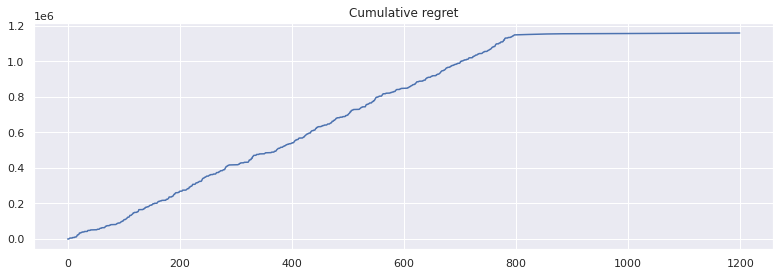

In [37]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_linear.pdf')

Text(0.5, 1.0, 'reward')

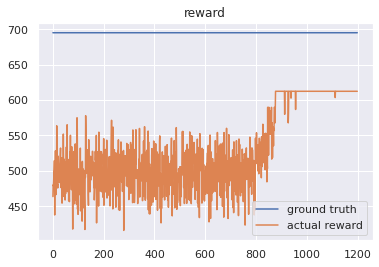

In [38]:
plt.plot([hwithoutconstraints(action2)/(np.sqrt(args.card))**2]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

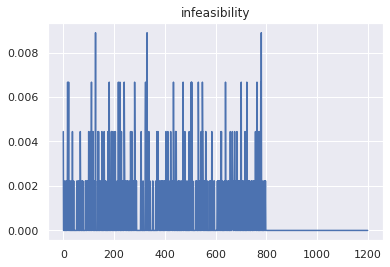

In [39]:
plt.plot(model.feasi)
plt.title('infeasibility')

Text(0.5, 1.0, 'reward')

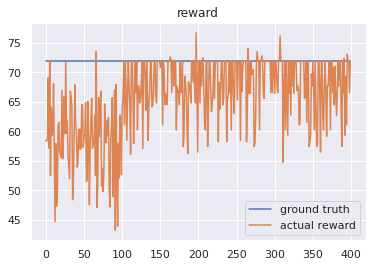

In [207]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

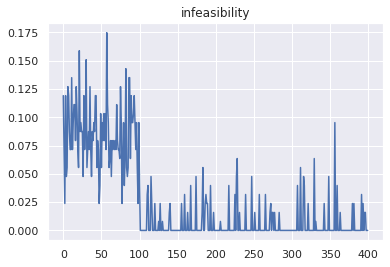

In [208]:
plt.plot(model.feasi)
plt.title('infeasibility')

In [209]:
hwithoutconstraints(action)/(np.sqrt(args.card))

71.87235975985492